## Summary:
This notebook analyze single breaker dynamics, including the energy dissipation and underwater vorticity.
## <a class="anchor" id="0">Table of content: </a> 
#### [1. Underwater vorticity](#1)
#### [2. Energy dissipation](#2)


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import matplotlib as mpl
import os
import sys
sys.path.append('/projects/DEIKE/jiarongw/jiarongw-postprocessing/jupyter_notebook/functions/')
from fio import readin
plt.style.use('/projects/DEIKE/jiarongw/jiarongw-postprocessing/media/matplotlib/stylelib/jfm.mplstyle')

In [2]:
from func import array_to_mesh, read_t

| folder                 |   ak | Nl |   N |    Re | Htheta |  smax |
|------------------------|------|----|-----|-------|--------|-------|
| stokes_ml_1            | 0.35 | 30 | 256 | 40000 |   0.51 |       |
| stokes_ml_2            | 0.35 | 30 | 256 | 40000 |  0.503 |       |
| stokes_ml_3            | 0.35 | 15 | 256 | 40000 |   0.51 |       |
| stokes_ml_4            | 0.35 | 15 | 128 | 40000 |   0.51 |       |
| stokes_ml_5            |  0.4 | 15 | 128 | 40000 |   0.51 |       |
| stokes_ml_6            |  0.4 | 15 | 256 | 40000 |   0.51 |       |
| stokes_ml_7            |  0.4 | 30 | 128 | 40000 |   0.51 |       |
| stokes_ml_8            |  0.4 | 30 | 256 | 40000 |   0.51 |       |
| stokes_ml_9            |  0.4 | 30 | 256 | 80000 |   0.51 | 0.577 |
| stokes_ml_9_slope0.577 |  0.4 | 15 | 256 | 80000 |   0.51 | 0.577 |
| stokes_ml_10_slope0.7  |  0.4 | 15 | 256 | 80000 |   0.51 |   0.7 |
| stokes_ml_11_slope0.4  |  0.4 | 15 | 256 | 80000 |   0.51 |   0.4 |


## <a class="anchor" id="1">Underwater vorticity: </a> 

In [3]:
class Case(object):
    """ This class defines methods specific to cases.
        Attributes: 
            self.NL - number of layers
            self.LEVEL - number of refinement level
            self.path - main folder directory
    """
    def __init__(self, NL=20, LEVEL=8, path='/projects/DEIKE/jiarongw/multilayer/stokes/stokes_8_20_Htheta0.51/'):
        self.NL = NL 
        self.LEVEL = LEVEL
        self.path = path 

In [ ]:
# How to speed up matplotlib
# https://stackoverflow.com/questions/8955869/why-is-plotting-with-matplotlib-so-slow
from matplotlib import animation
from visualization import contour
from IPython.display import HTML
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
import matplotlib.image as mpimg

# Single animation generation function
def plot_animation(animate_function, frame_number = 31, interval_time = 100):

    # First set up the figure, the axis, and the plot element we want to animate   
    global case
    fig = plt.figure(figsize=[4,2]); ax = plt.gca()

    # animation function.  This is called sequentially
    def animate(i):
        imgplot = animate_function(i, ax)
        return imgplot,

    # call the animator.  blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, animate, frames=frame_number, interval=interval_time, blit = True)  
    return anim


# Define the function called at every animation time to read in images
def plot_func(i, ax):
    global case
    L = 1; H=0.5; kp = 2*np.pi/L; cp = (9.8/kp)**0.5; Nh = 2**case.LEVEL; Nl = case.NL
    t = 1+i*0.01
    h_ensem, ux_ensem, uy_ensem, uz_ensem = case.read_t(t=t)
    h_ensem[0,:,:] = h_ensem[1,:,:]*h_ensem[1,:,:]/h_ensem[2,:,:]
    ax.clear()
    x_mesh, y_mesh, z_mesh, ux_mesh, uy_mesh, uz_mesh = array_to_mesh (h_ensem, ux_ensem, uy_ensem, uz_ensem, L0=L, H=H, Nh=Nh, Nl=Nl)
    ux_mesh[0,:,:] = ux_mesh[0,:,:]*0
    uy_mesh[0,:,:] = uy_mesh[0,:,:]*0
    uz_mesh[0,:,:] = uz_mesh[0,:,:]*0
    xslice = int(Nh/2)
    yslice = int(Nh/2)
    image = ax.pcolormesh(x_mesh[:,:,yslice], z_mesh[:,:,yslice], uy_mesh[:,:,yslice]/cp, shading='flat', cmap='RdBu_r', vmax=0.2, vmin=-0.2)
    ax.set_xticks([-L/2,L/2]); ax.set_yticks([-L/2,0])
    ax.set_ylim([-L/2, L/8])
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    print(i)
    return image

case = Case(NL=30, LEVEL=8, path='/projects/DEIKE/jiarongw/multilayer/revision/stokes_ml_1/')
anim = plot_animation(plot_func, frame_number = 100, interval_time = 100) # Specify frame number
HTML(anim.to_html5_video())

In [5]:
# def plot_func(t, ax):
#     global case
#     L = 1; H=0.5; kp = 2*np.pi/L; cp = (9.8/kp)**0.5; Nh = 2**case.LEVEL; Nl = case.NL
#     h_ensem, ux_ensem, uy_ensem, uz_ensem = read_t(t=t, Nh=Nh, Nl=Nl, path=case.path)
#     x_mesh, y_mesh, z_mesh, ux_mesh, uy_mesh, uz_mesh = array_to_mesh (h_ensem, ux_ensem, uy_ensem, uz_ensem, L0=L, H=H, Nh=Nh, Nl=Nl)
#     yslice = int(Nh/2)
#     image = ax.pcolormesh(x_mesh[:,:,yslice], z_mesh[:,:,yslice], uy_mesh[:,:,yslice]/cp, cmap='bwr', vmax=0.1, vmin=-0.1)
#     ax.set_xticks([-L/2,L/2]); ax.set_yticks([-L/2,0,L/10])
#     ax.set_ylim([-L/2, L/10])
# #     ax.spines.right.set_visible(False)
# #     ax.spines.top.set_visible(False)
#     ax.axis('off'); 
# #     ax.text(0.05, 0.1, '$t=%gT$' %t, transform=ax.transAxes, fontsize=8)
#     ''' Plot the surface '''
#     xarray = np.linspace(-L/2,L/2,Nh,endpoint=False) + L/Nh/2
#     ax.plot(xarray,np.sum(h_ensem[:,:,yslice],axis=0)-L/2,lw=0.5,c='k')
#     return image

In [43]:
def plot_func(t, ax):
    global case
    Nh = 2**case.LEVEL; Nl = case.NL; L = case.L; H = case.H; cp = case.cp; kp = case.kp
    [h_ensem, ux_ensem, uy_ensem, uz_ensem, omegax_ensem, omegay_ensem, omegaz_ensem] = read_t(fieldnames=['h','ux','uy','uz','omegax','omegay','omegaz'], 
                                                                                 t=t, Nh=Nh, Nl=Nl, path=case.path)
    # Additional filtering due to wrong outputs, only for some old cases
#     h_ensem[0,:,:] = h_ensem[1,:,:]*h_ensem[1,:,:]/h_ensem[2,:,:]
#     ux_ensem[0,:,:] = ux_ensem[0,:,:]*0; uy_ensem[0,:,:] = uy_ensem[0,:,:]*0; uz_ensem[0,:,:] = uz_ensem[0,:,:]*0
    
    x_mesh, y_mesh, z_mesh = array_to_mesh (h_ensem, L0=L, H=H, Nh=Nh, Nl=Nl)
    yslice = 128
    image = ax.pcolormesh(x_mesh[:,:,yslice], z_mesh[:,:,yslice], omegax_ensem[:,:,yslice], shading='flat', cmap='RdBu_r')
    ax.set_xticks([-L/2,L/2]); ax.set_yticks([-L/5,0,L/10])
    ax.set_ylim([-L/5, L/10])
#     ax.spines.right.set_visible(False)
#     ax.spines.top.set_visible(False)
#     ax.axis('off'); 
#     ax.text(0.05, 0.1, '$t=%gT$' %t, transform=ax.transAxes, fontsize=8)
    ''' Plot the surface '''
    xarray = np.linspace(-L/2,L/2,Nh,endpoint=False) + L/Nh/2
    ax.plot(xarray,np.sum(h_ensem[:,:,128],axis=0)-H,lw=0.5,c='k')
    return image, x_mesh, y_mesh, z_mesh, ux_ensem, uy_ensem, uz_ensem, omegax_ensem, omegay_ensem, omegaz_ensem

Text(0.5, 1.2, '$\\omega_x$')

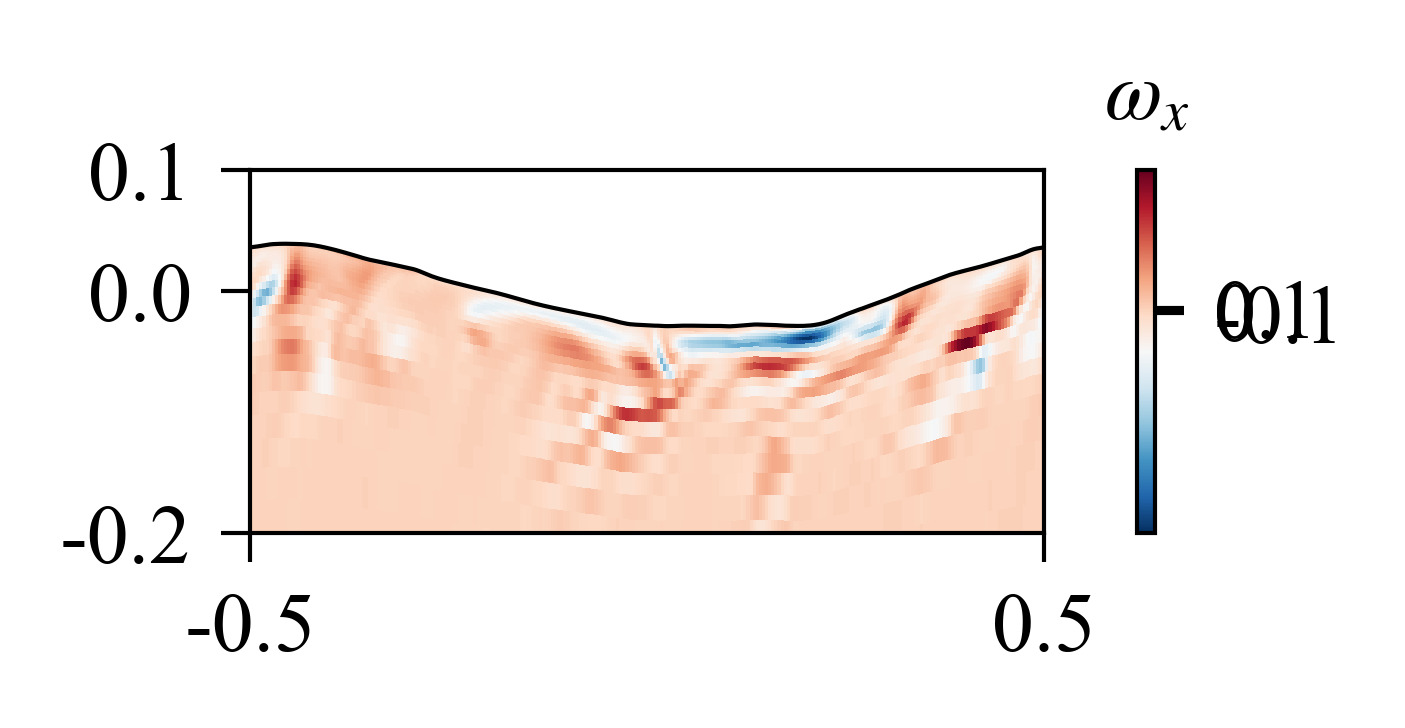

In [44]:
case = Case(NL=30, LEVEL=8, path='/projects/DEIKE/jiarongw/multilayer/revision/stokes_ml_1/vort/')
case.L = 1; case.H = 0.5; case.kp = 2*np.pi/case.L; case.cp = (9.8/case.kp)**0.5
t = 6
fig = plt.figure (figsize=[2,0.8]); ax = plt.gca()
image, x_mesh, y_mesh, z_mesh, ux_ensem, uy_ensem, uz_ensem, omegax_ensem, omegay_ensem, omegaz_ensem = plot_func(t, ax)
cbar = fig.colorbar(image, orientation="vertical", fraction=0.046, pad=0.1, ticks=[-0.1,0,0.1])
cbar.ax.set_yticklabels(['-0.1','0','0.1'])
cbar.ax.text(0.5, 1.2, r'$\omega_x$', ha='center', va='center', transform=cbar.ax.transAxes)

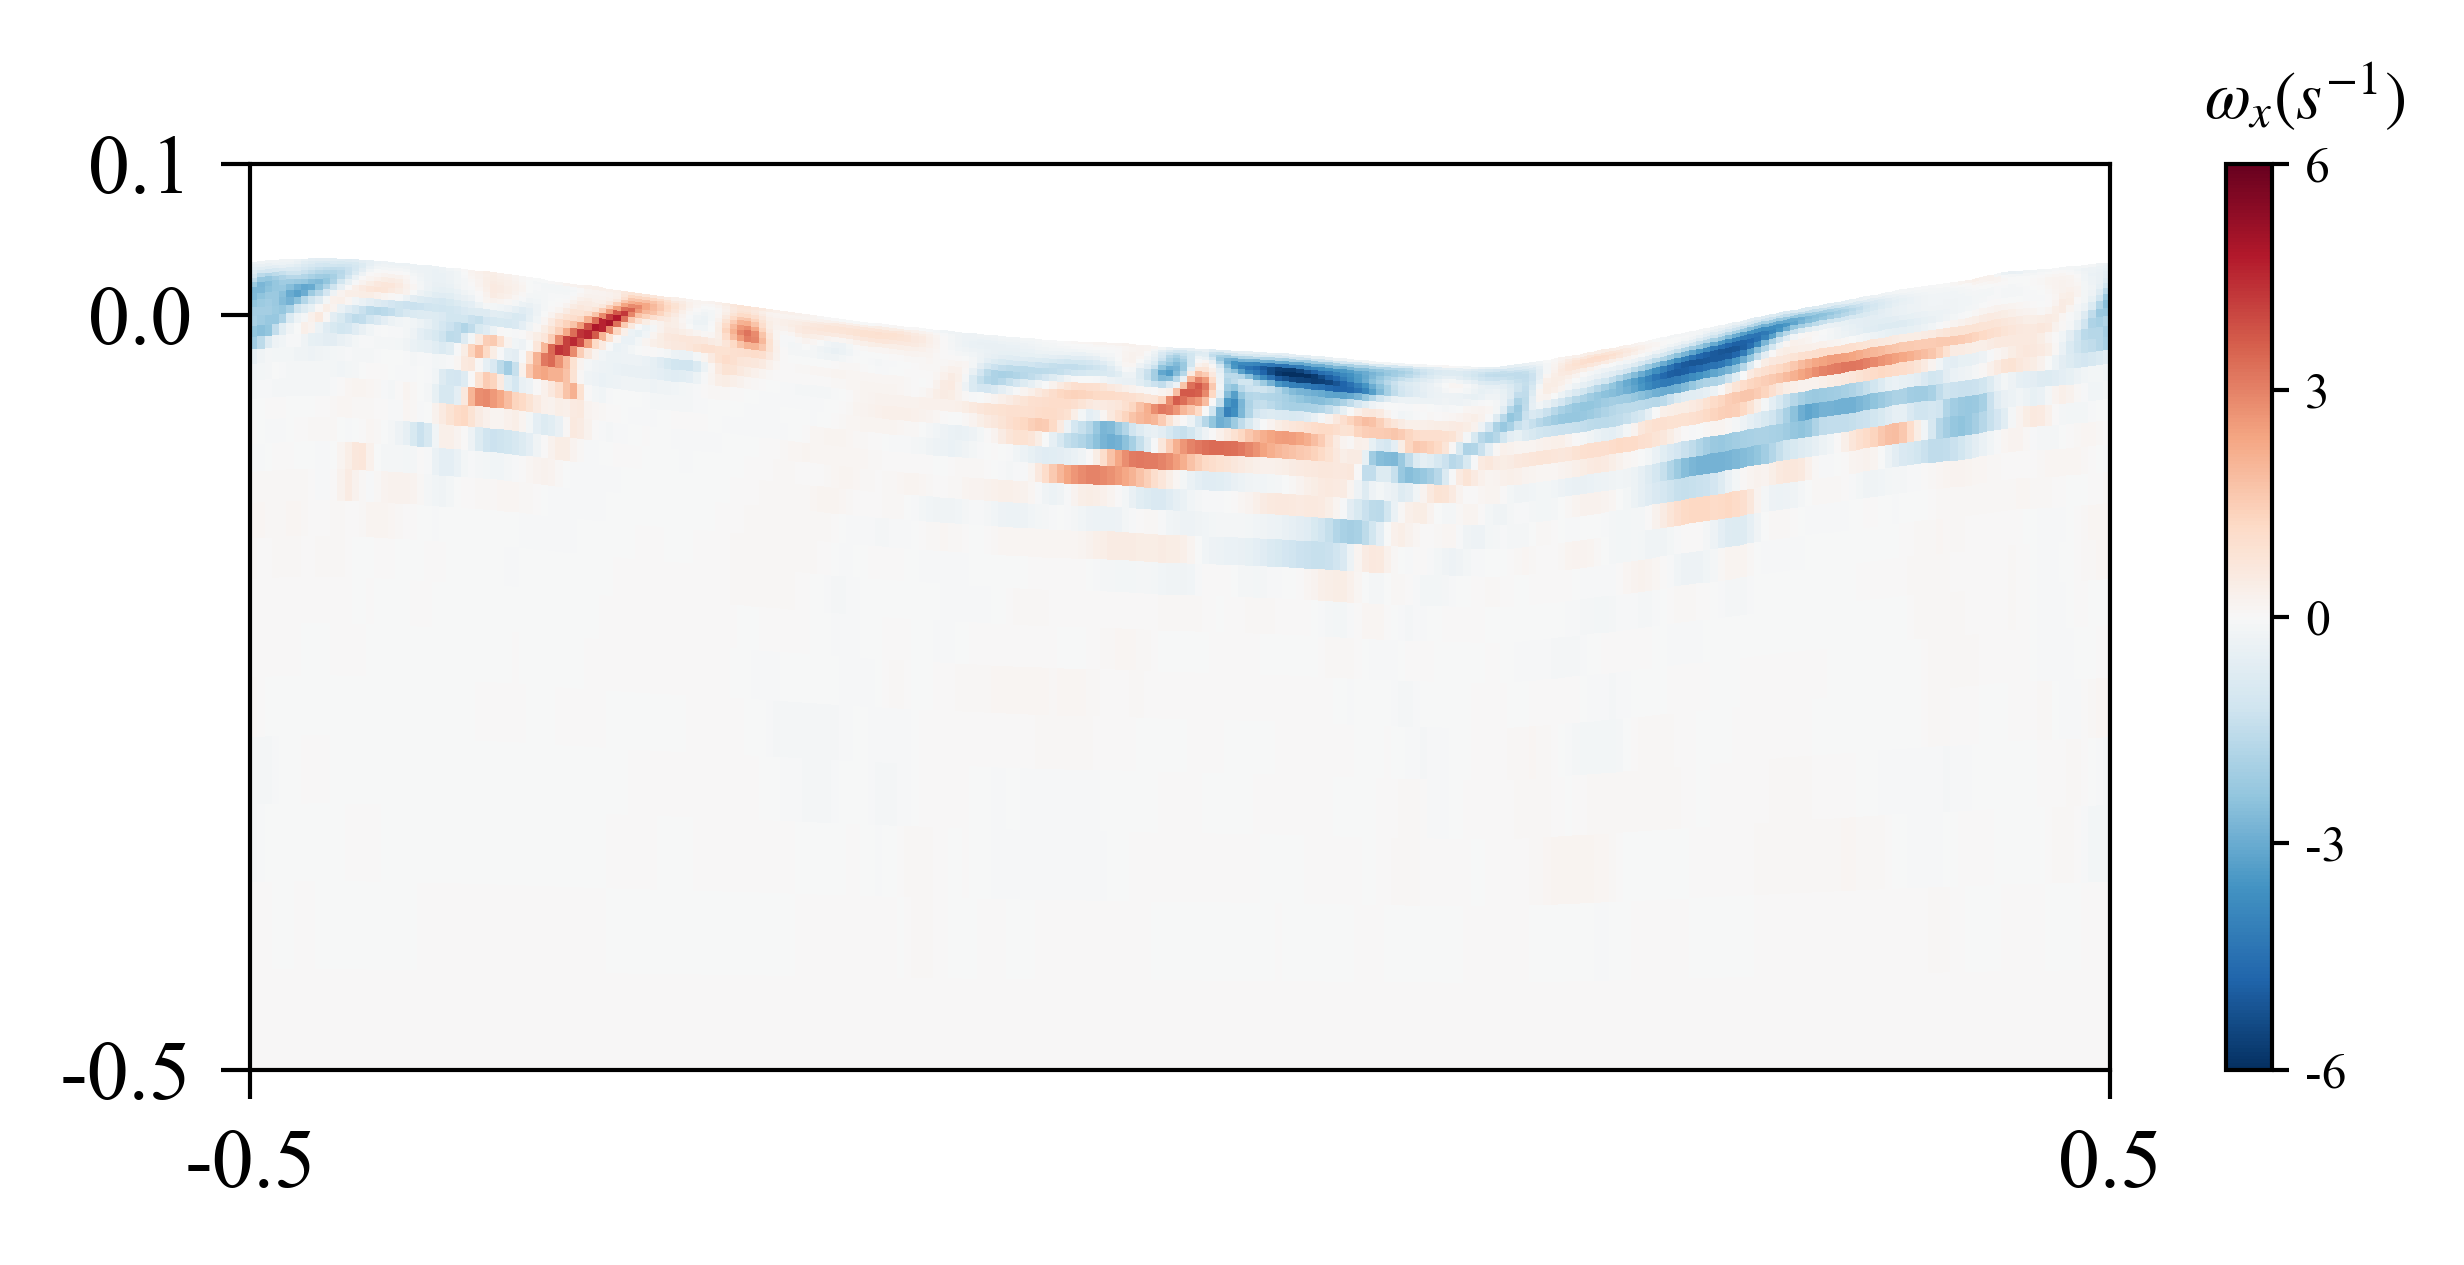

In [46]:
fig = plt.figure (figsize=[5,2]); ax = plt.gca()
yslice = 160; L = case.L

ax.set_xticks([-L/2,L/2]); ax.set_yticks([-L/2,0,L/10]); ax.set_ylim([-L/2, L/10])

image = plt.pcolormesh(x_mesh[:,:,yslice], z_mesh[:,:,yslice], omegax_ensem[:,:,yslice], shading='flat', 
                       cmap='RdBu_r', vmax=6, vmin=-6)

cbar = plt.colorbar(image, orientation='vertical')
cbar.ax.text(-0.5, 1.05, r'$\omega_x (s^{-1})$', transform=cbar.ax.transAxes, fontsize=8)
cbar.set_ticks([-6,-3,0,3,6])
cbar.ax.tick_params(labelsize=6, length=2, pad=2)

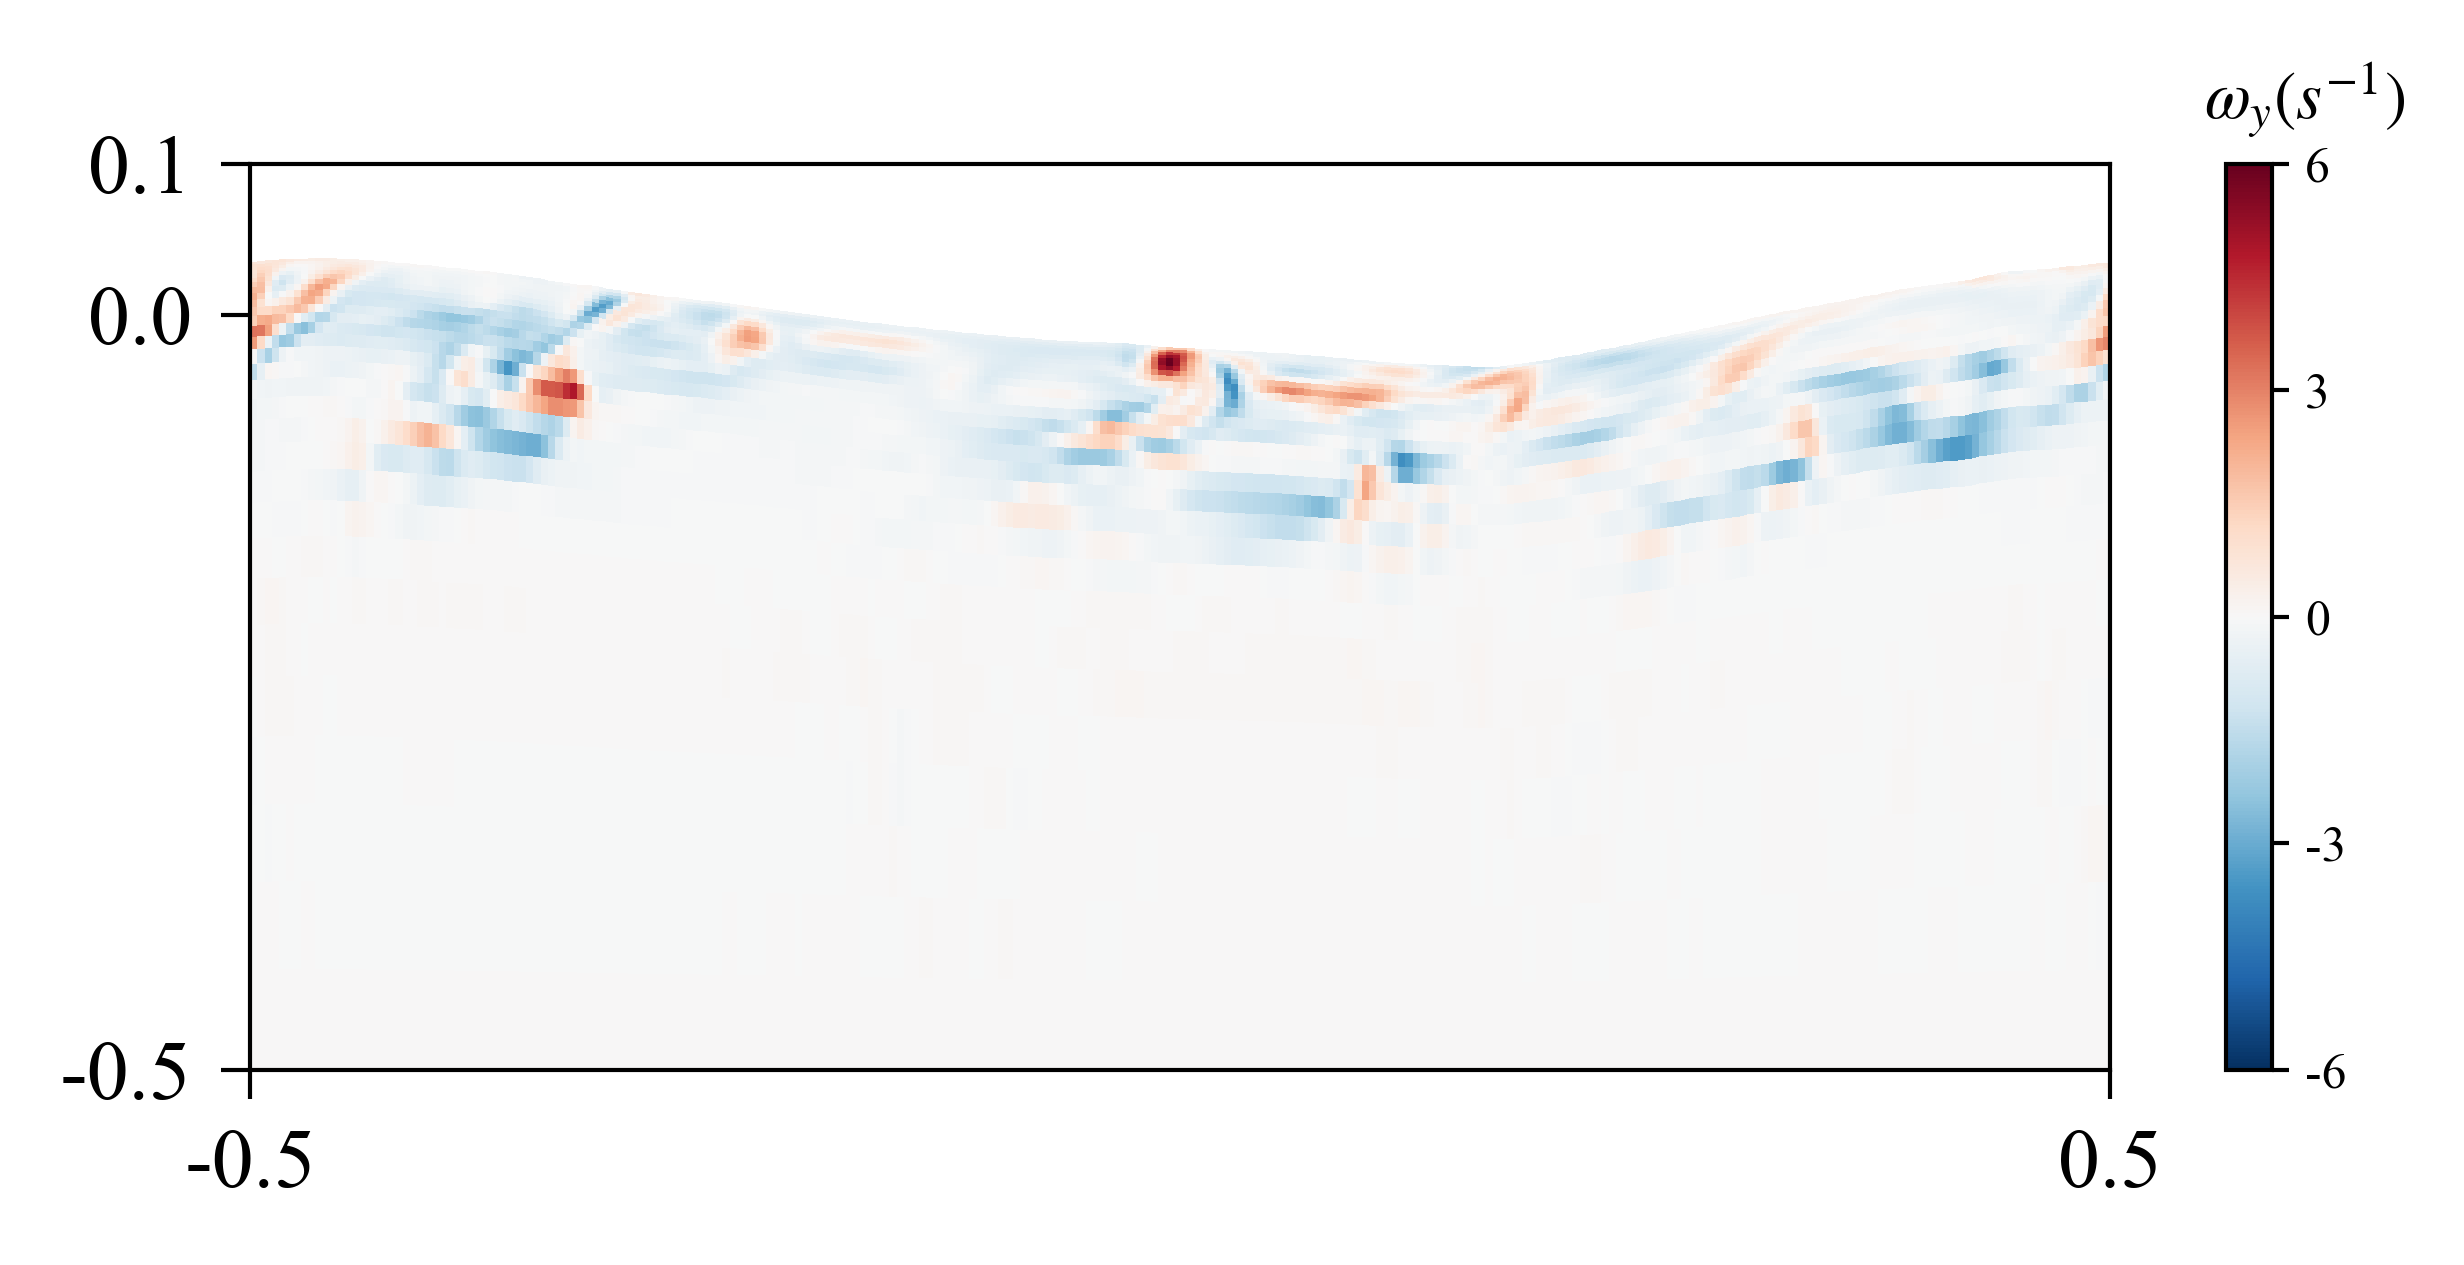

In [47]:
fig = plt.figure (figsize=[5,2]); ax = plt.gca()
yslice = 160; L = case.L

ax.set_xticks([-L/2,L/2]); ax.set_yticks([-L/2,0,L/10]); ax.set_ylim([-L/2, L/10])

image = plt.pcolormesh(x_mesh[:,:,yslice], z_mesh[:,:,yslice], omegay_ensem[:,:,yslice], shading='flat', 
                       cmap='RdBu_r', vmax=6, vmin=-6)

cbar = plt.colorbar(image, orientation='vertical')
cbar.ax.text(-0.5, 1.05, r'$\omega_y (s^{-1})$', transform=cbar.ax.transAxes, fontsize=8)
cbar.set_ticks([-6,-3,0,3,6])
cbar.ax.tick_params(labelsize=6, length=2, pad=2)

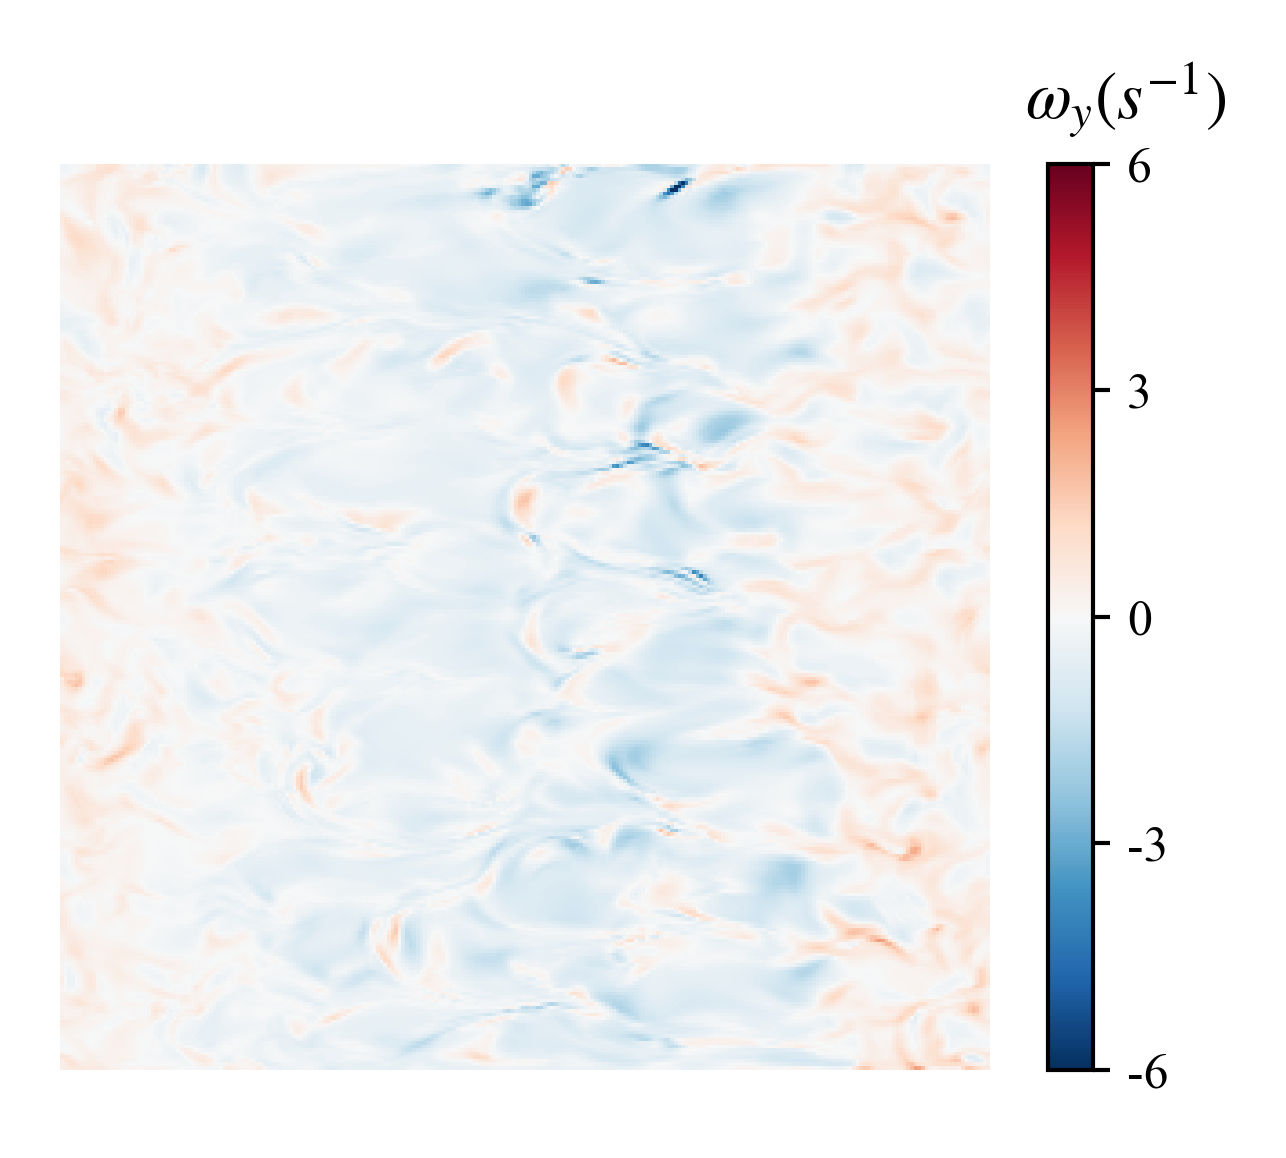

In [48]:
fig = plt.figure (figsize=[2.5,2]); ax = plt.gca()
# yslice = 128
zslice = -1
L = 1

ax.set_xticks([-L/2,L/2]); ax.set_yticks([-L/2,0,L/2])
ax.set_ylim([-L/2, L/2])
# image = plt.pcolormesh(x_mesh2[-1,:,:], y_mesh2[-1,:,:], z_mesh2[-1,:-1,:-1], shading='flat', 
#                        cmap='RdBu_r', vmax=2, vmin=-2)
image = plt.pcolormesh(x_mesh[zslice,:,:], y_mesh[zslice,:,:], omegay_ensem[zslice,:,:], shading='flat', 
                       cmap='RdBu_r', vmax=6, vmin=-6)
# image = plt.pcolormesh(x_mesh2[-1,:,:], y_mesh2[-1,:,:], omegaz_mesh2[-1,:,:], shading='flat', 
#                        cmap='RdBu_r', vmax=0.4, vmin=-0.4)

cbar = plt.colorbar(image, orientation='vertical')
# cbar.ax.text(-0.5, 1.05, r'$\eta (m)$', transform=cbar.ax.transAxes, fontsize=8)
# cbar.set_ticks([-2,-1,0,1,2])
cbar.ax.text(-0.5, 1.05, r'$\omega_y (s^{-1})$', transform=cbar.ax.transAxes, fontsize=8)
cbar.set_ticks([-6,-3,0,3,6])
# cbar.ax.text(-0.5, 1.05, r'$\omega_z (s^{-1})$', transform=cbar.ax.transAxes, fontsize=8)
# cbar.set_ticks([-0.4,-0.2,0,0.2,0.4])

plt.axis('off')
cbar.ax.tick_params(labelsize=6, length=2, pad=2)

In [6]:
def plot_func_span(t, ax):
    global case
    L = 1; kp = 2*np.pi/L; cp = (9.8/kp)**0.5; Nh = 2**case.LEVEL; Nl = case.NL
    h_ensem, ux_ensem, uy_ensem, uz_ensem = read_t(t=t, Nh=Nh, Nl=Nl, path=case.path)
    x_mesh, y_mesh, z_mesh, ux_mesh, uy_mesh, uz_mesh = array_to_mesh (h_ensem, ux_ensem, uy_ensem, uz_ensem, L0=L, H=H, Nh=Nh, Nl=Nl)
    xslice = int(Nh/2)
    image = ax.pcolormesh(y_mesh[:,xslice,:], z_mesh[:,xslice,:], uy_mesh[:,xslice,:]/cp, cmap='bwr', vmax=0.1, vmin=-0.1)
    ax.set_xticks([-L/2,L/2]); ax.set_yticks([-L/2,0,L/10])
    ax.set_ylim([-L/2, L/10])
#     ax.spines.right.set_visible(False)
#     ax.spines.top.set_visible(False)
    ax.axis('off'); 
#     ax.text(0.05, 0.1, '$t=%gT$' %t, transform=ax.transAxes, fontsize=8)
    ''' Plot the surface '''
    xarray = np.linspace(-L/2,L/2,Nh,endpoint=False) + L/Nh/2
    ax.plot(xarray,np.sum(h_ensem[:,xslice,:],axis=0)-L/2,lw=0.5,c='k')
    return image

In [24]:
def plot_birdeye(t, ax):
    global case
    L = 1; kp = 2*np.pi/L; cp = (9.8/kp)**0.5; Nh = 2**case.LEVEL; Nl = case.NL;  H=0.5
    h_ensem, ux_ensem, uy_ensem, uz_ensem = read_t(t=t, Nh=Nh, Nl=Nl, path=case.path)
    x_mesh, y_mesh, z_mesh, ux_mesh, uy_mesh, uz_mesh = array_to_mesh (h_ensem, ux_ensem, uy_ensem, uz_ensem, L0=L, H=H, Nh=Nh, Nl=Nl)
    xslice = int(Nh/2)
    image = ax.pcolormesh(x_mesh[-1,:,:], y_mesh[-1,:,:], ux_mesh[-1,:,:]/cp, cmap='bwr', vmax=0.1, vmin=-0.1)
    ax.set_xticks([-L/2,L/2]); ax.set_yticks([-L/2,0,L/10])
    ax.set_ylim([-L/2, L/2])
#     ax.spines.right.set_visible(False)
#     ax.spines.top.set_visible(False)
    ax.axis('off'); 
#     ax.text(0.05, 0.1, '$t=%gT$' %t, transform=ax.transAxes, fontsize=8)
    return image

Text(0.5, 1.2, '$u_y/c_p$')

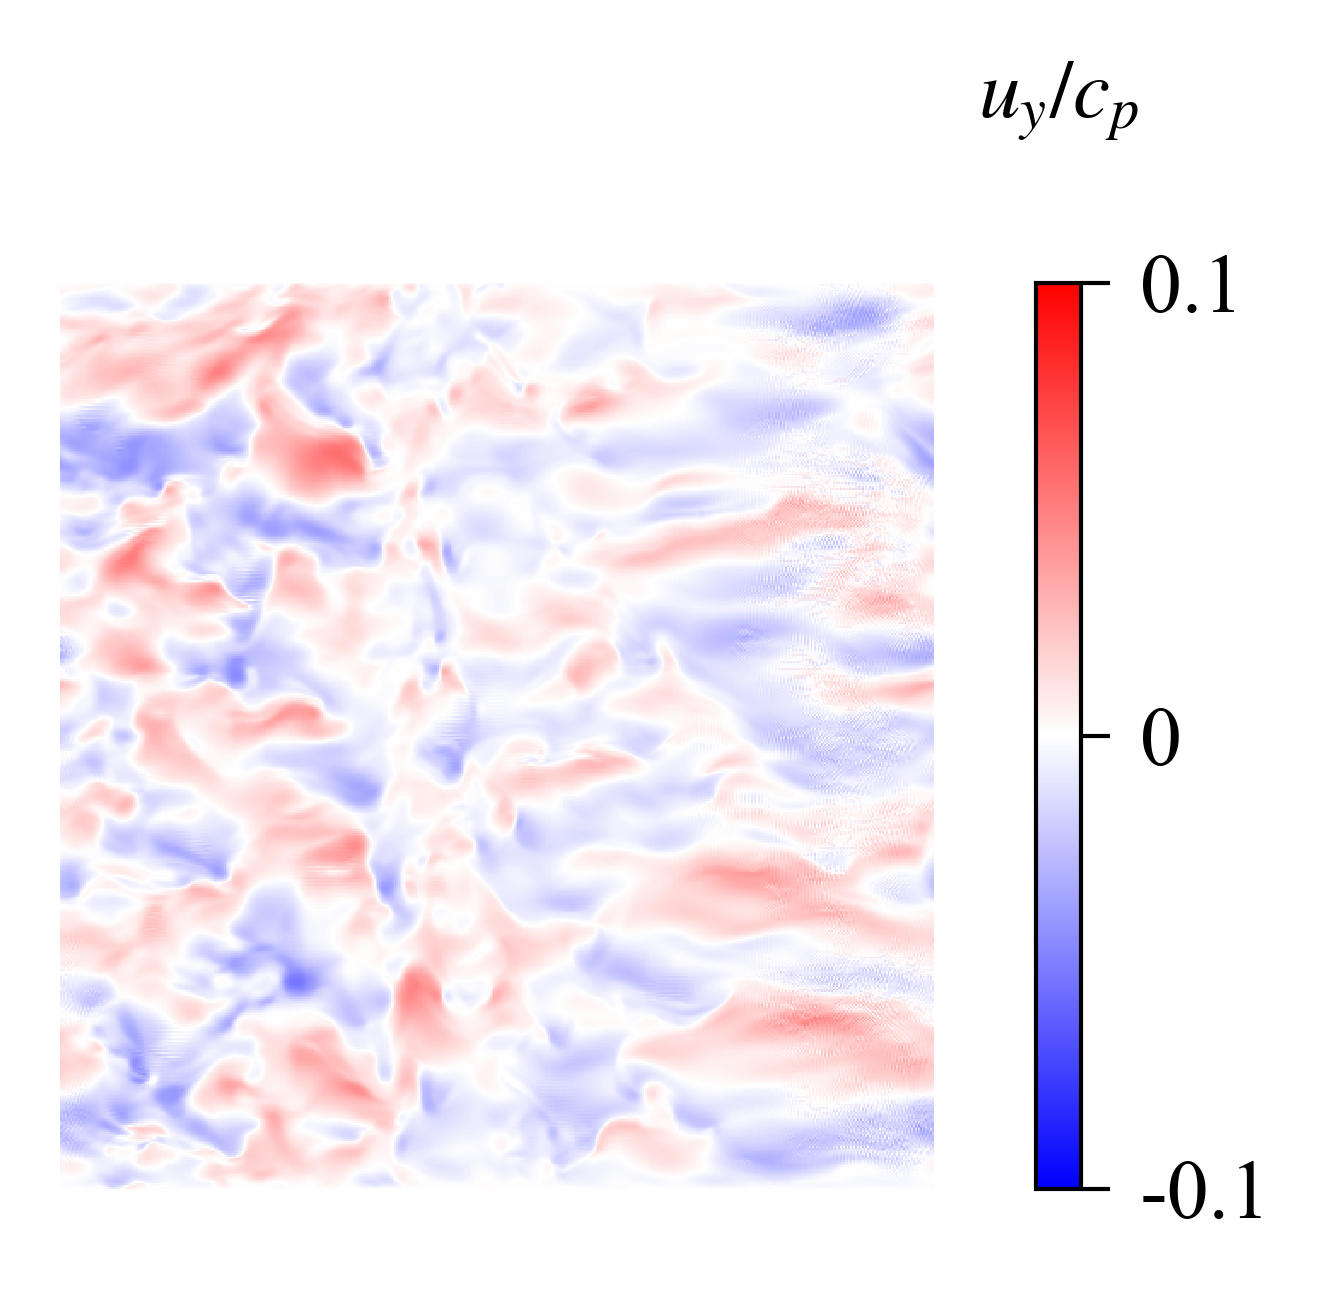

In [27]:
case = Case(NL=30, LEVEL=9, path='/projects/DEIKE/jiarongw/multilayer/revision/stokes_ml_16/')
t = 5.2
fig = plt.figure (figsize=[2.2,2]); ax = plt.gca()
image = plot_birdeye(t, ax)
cbar = fig.colorbar(image, orientation="vertical", fraction=0.046, pad=0.1, ticks=[-0.1,0,0.1])
cbar.ax.set_yticklabels(['-0.1','0','0.1'])
cbar.ax.text(0.5, 1.2, r'$u_y/c_p$', ha='center', va='center', transform=cbar.ax.transAxes)

Text(0.5, 1.2, '$u_y/c_p$')

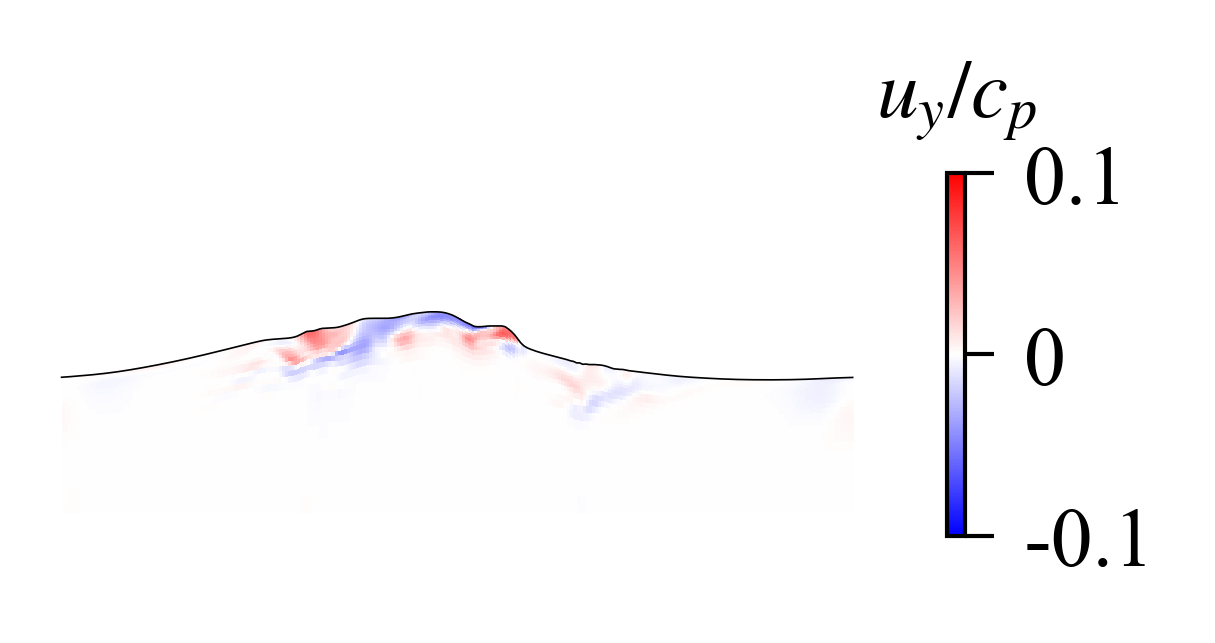

In [6]:
''' Define a case and then plot a certain time '''
def plot_func(t, ax):
    global case
    L = 1; H=0.5; kp = 2*np.pi/L; cp = (9.8/kp)**0.5; Nh = 2**case.LEVEL; Nl = case.NL
    h_ensem, ux_ensem, uy_ensem, uz_ensem = read_t(t=t, Nh=Nh, Nl=Nl, path=case.path)
    x_mesh, y_mesh, z_mesh, ux_mesh, uy_mesh, uz_mesh = array_to_mesh (h_ensem, ux_ensem, uy_ensem, uz_ensem, L0=L, H=H, Nh=Nh, Nl=Nl)
    yslice = int(Nh/2)
    image = ax.pcolormesh(x_mesh[:,:,yslice]+ L/Nh/2, z_mesh[:,:,yslice], uy_mesh[:,:,yslice]/cp, cmap='bwr', vmax=0.1, vmin=-0.1)
    ax.set_xlim([-L*0.5, L*0.5]); ax.set_ylim([-L*0.2, L*0.2])
#     ax.spines.right.set_visible(False)
#     ax.spines.top.set_visible(False)
    ax.axis('off') 
    ax.set_aspect('equal')
    ''' Plot the surface '''
    xarray = np.linspace(-L/2,L/2,Nh,endpoint=False) + L/Nh/2
    ax.plot(xarray,np.sum(h_ensem[:,:,yslice],axis=0)-L/2,lw=0.2,c='k')
    return image
case = Case(NL=30, LEVEL=8, path='/projects/DEIKE/jiarongw/multilayer/revision/stokes_ml_1/')
t = 3.6
fig = plt.figure (figsize=[2,0.8]); ax = plt.gca()
image = plot_func(t, ax)
cbar = fig.colorbar(image, orientation="vertical", fraction=0.046, pad=0.1, ticks=[-0.1,0,0.1])
cbar.ax.set_yticklabels(['-0.1','0','0.1'])
cbar.ax.text(0.5, 1.2, r'$u_y/c_p$', ha='center', va='center', transform=cbar.ax.transAxes)
# fig.savefig('figures_revision/snapshots/bar.pdf')

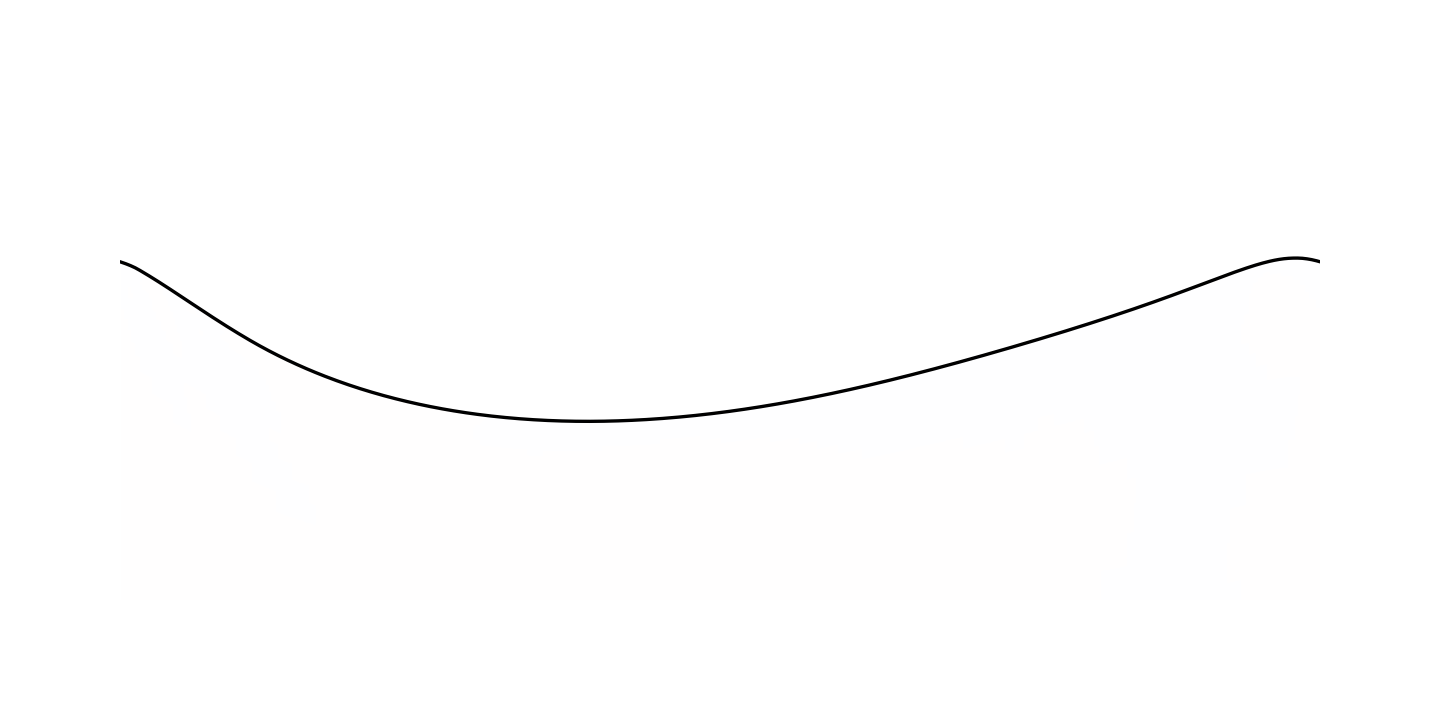

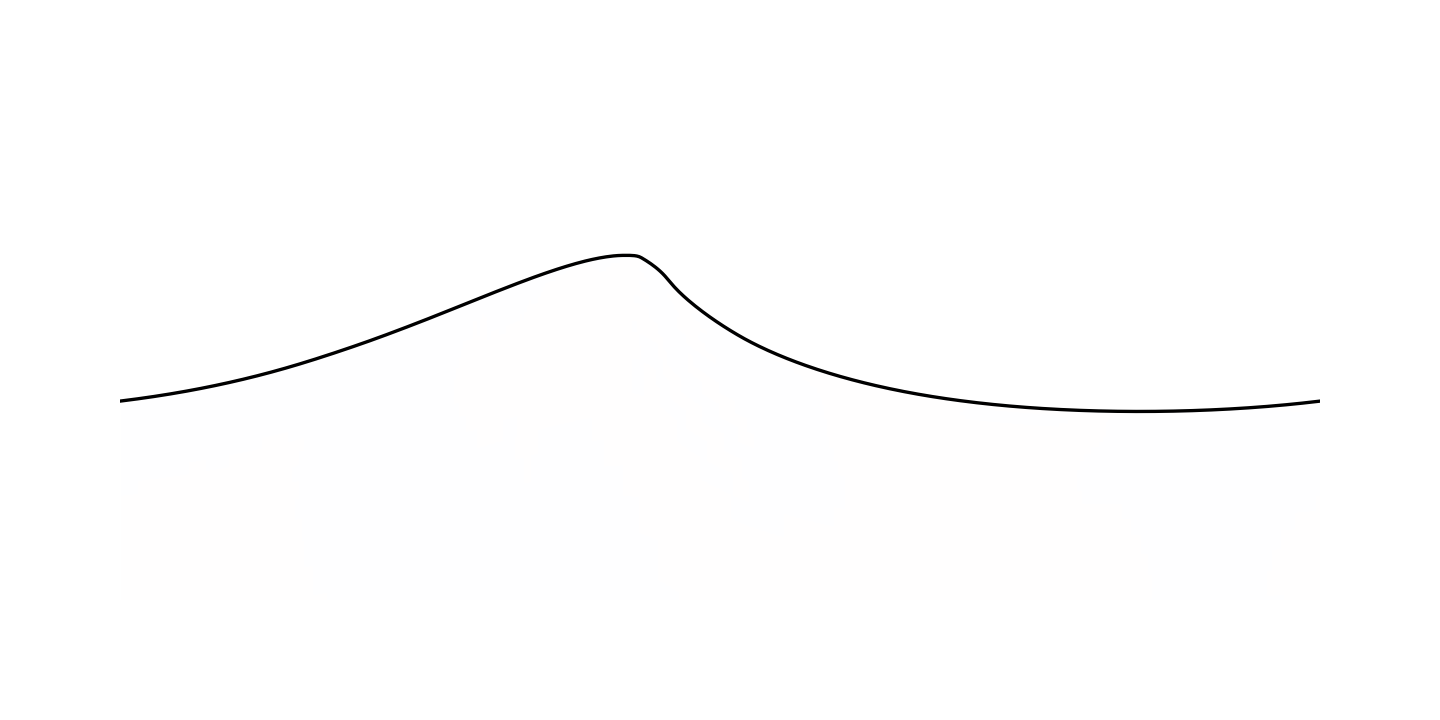

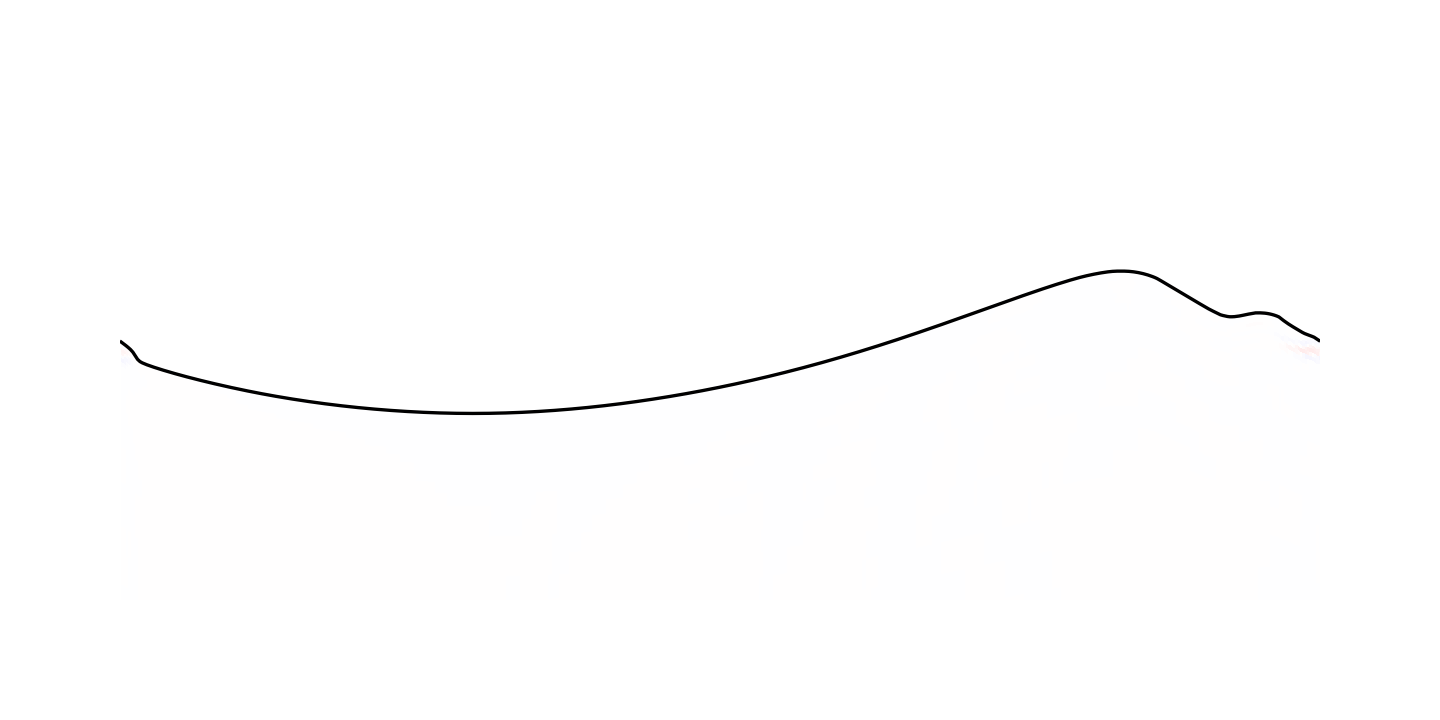

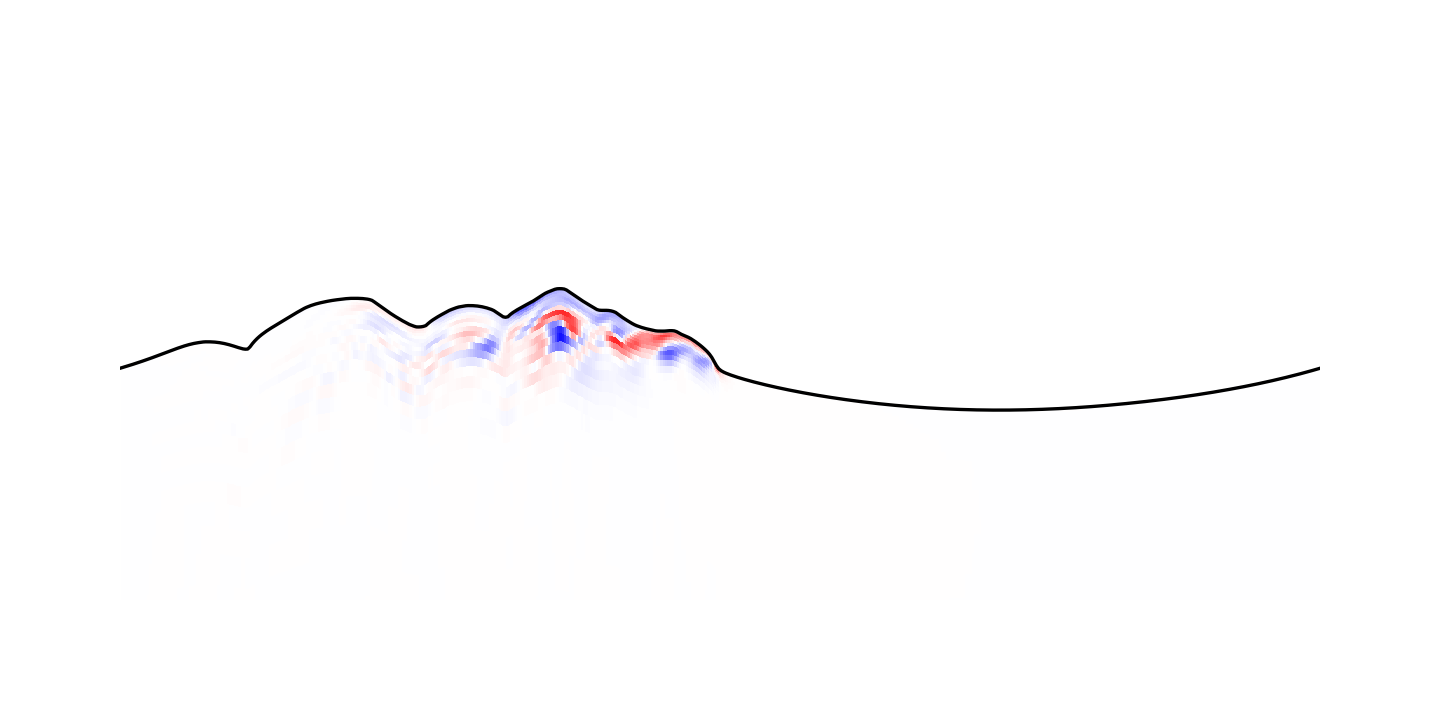

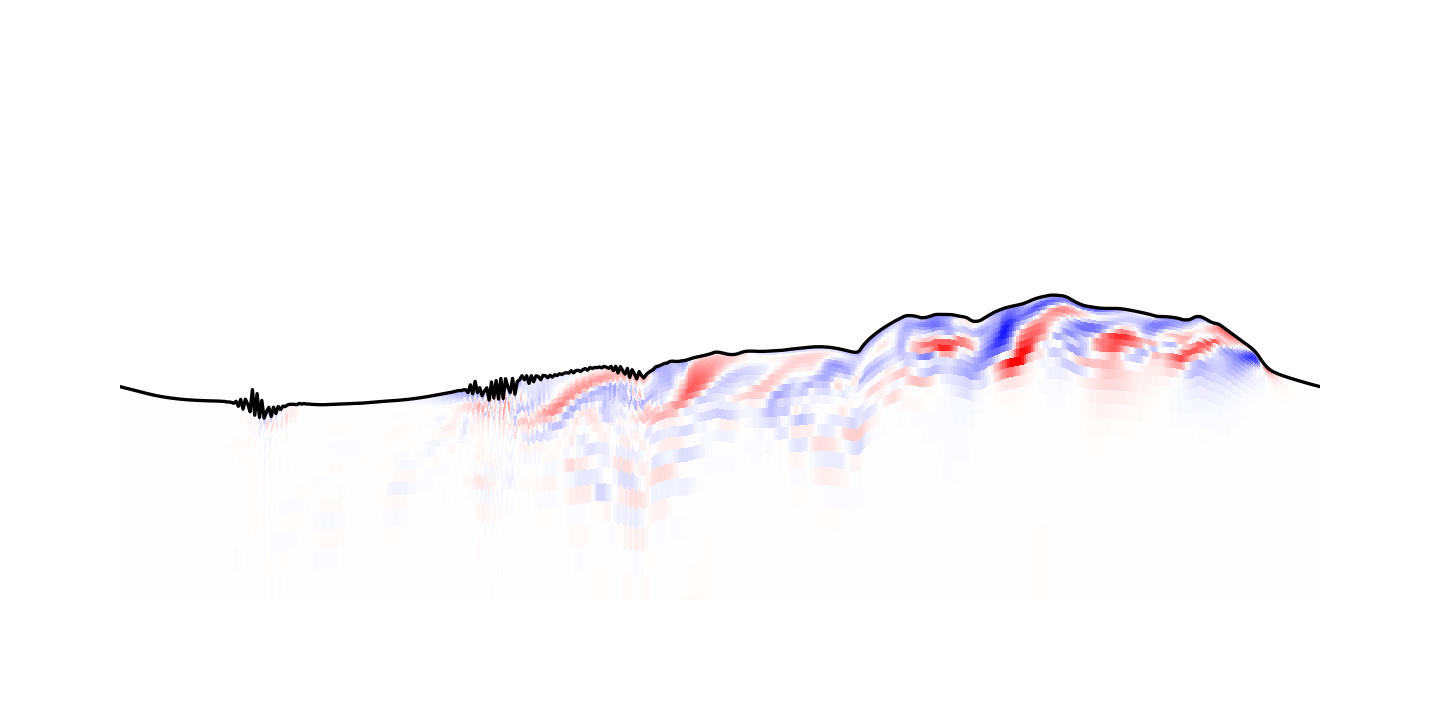

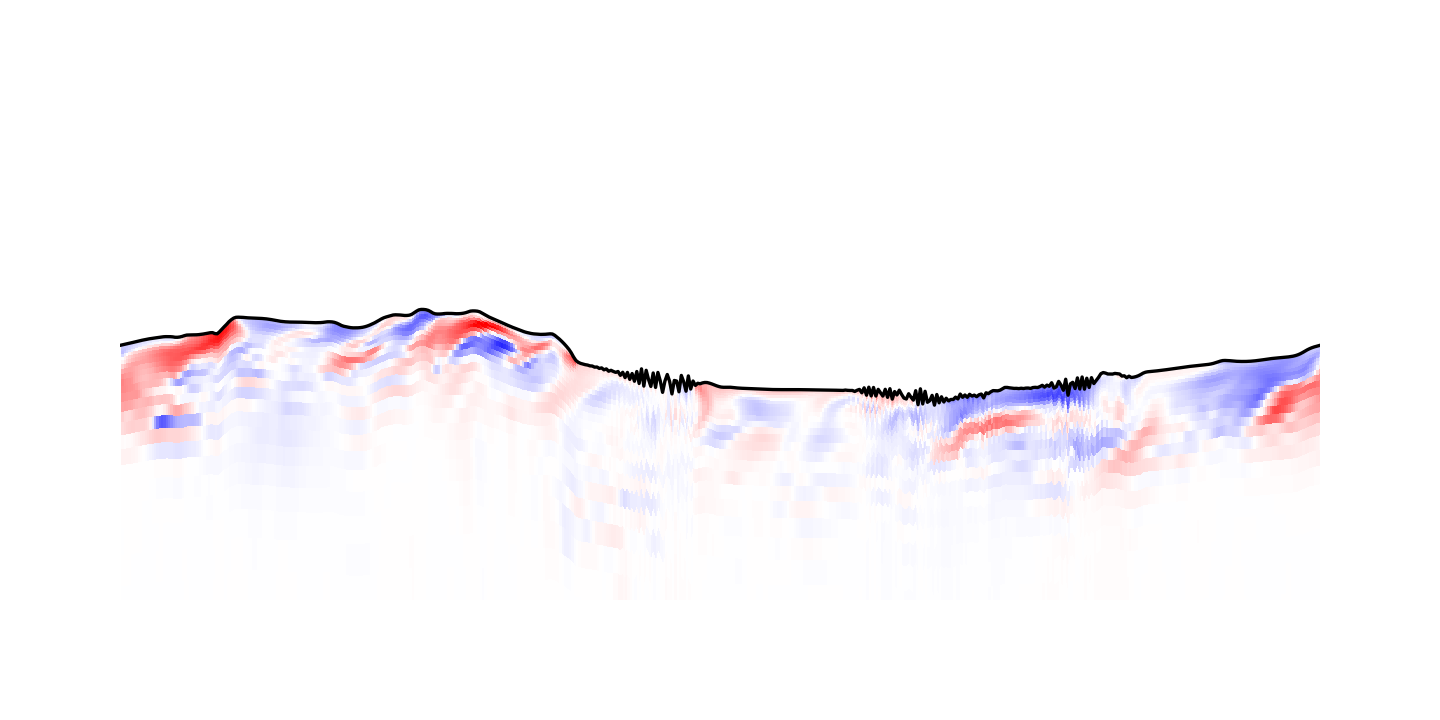

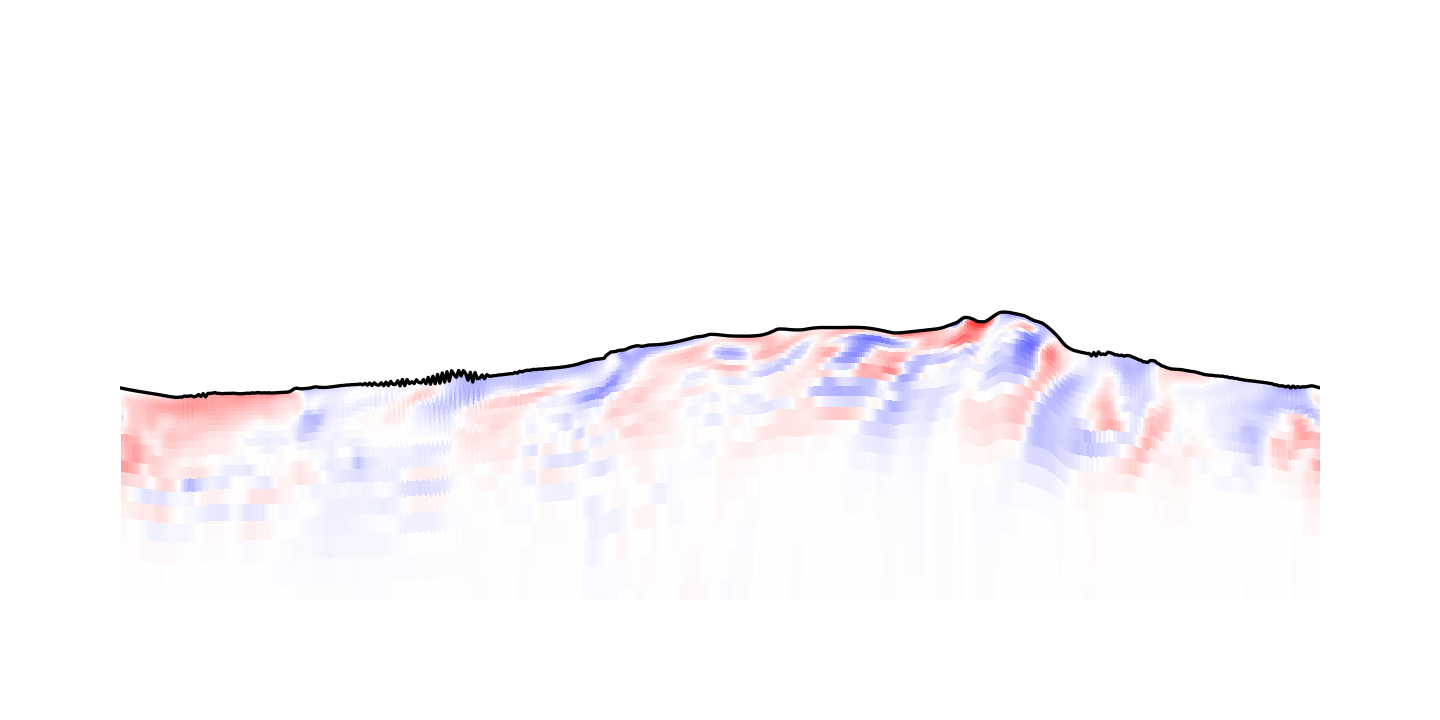

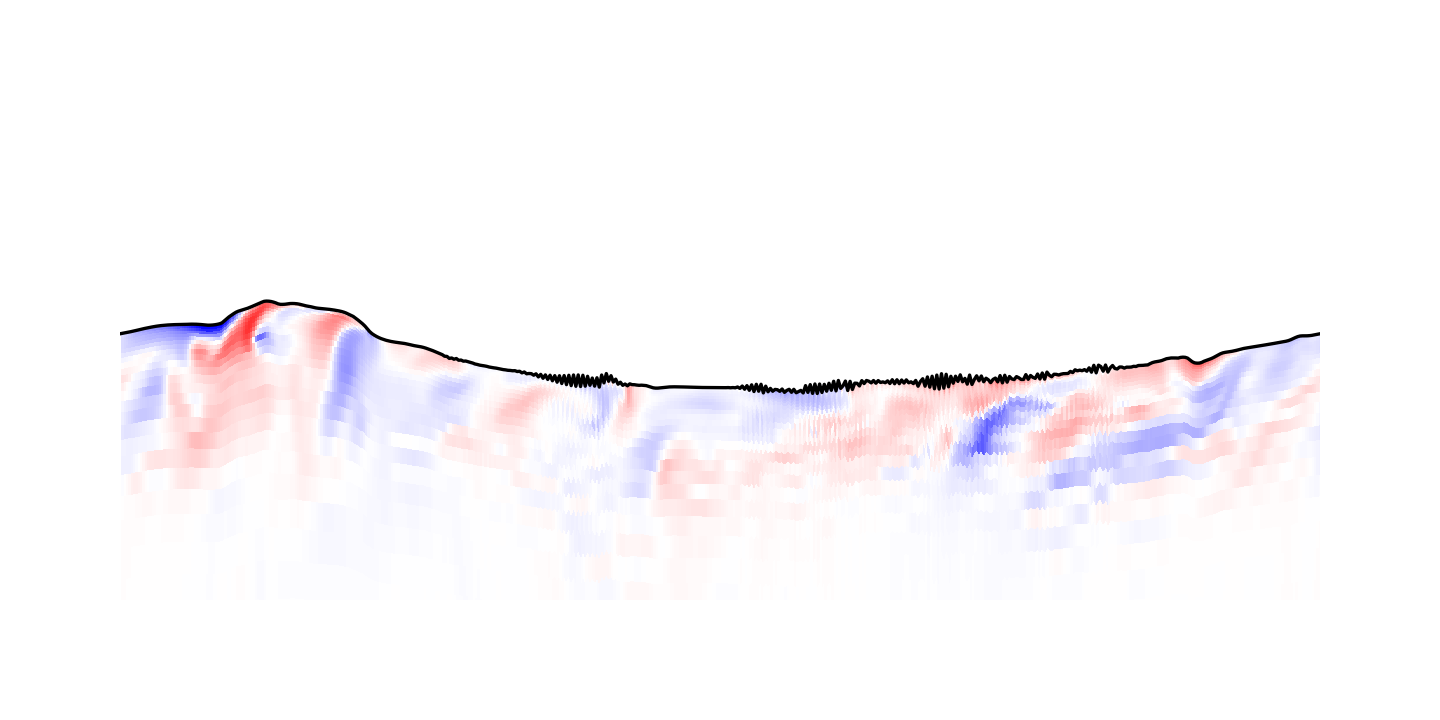

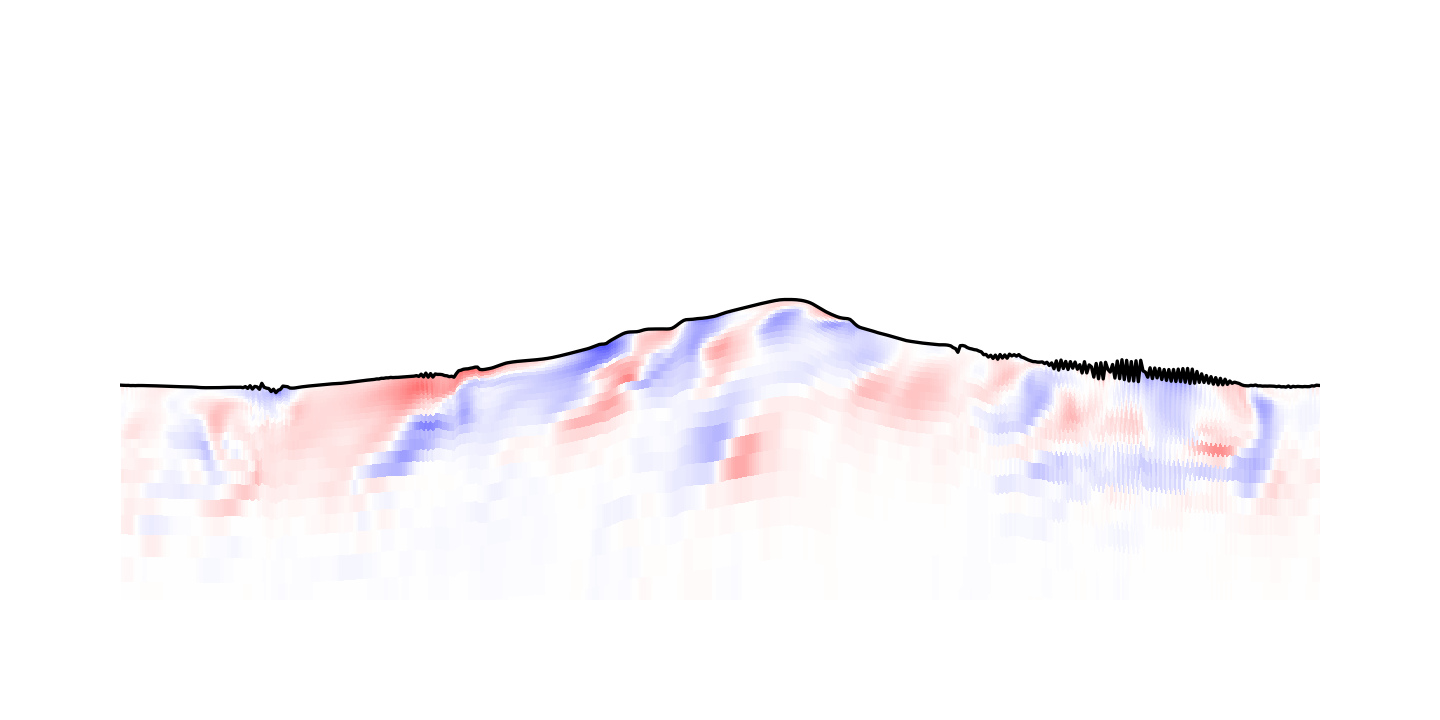

In [13]:
''' Define a case and then plot a certain time '''
case = Case(NL=30, LEVEL=9, path='/projects/DEIKE/jiarongw/multilayer/revision/stokes_ml_21/')

def plot_func(t, ax):
    global case
    L = 1; H=0.5; kp = 2*np.pi/L; cp = (9.8/kp)**0.5; Nh = 2**case.LEVEL; Nl = case.NL
    h_ensem, ux_ensem, uy_ensem, uz_ensem = read_t(t=t, Nh=Nh, Nl=Nl, path=case.path)
    x_mesh, y_mesh, z_mesh, ux_mesh, uy_mesh, uz_mesh = array_to_mesh (h_ensem, ux_ensem, uy_ensem, uz_ensem, L0=L, H=H, Nh=Nh, Nl=Nl)
    yslice = int(Nh/2)
    image = ax.pcolormesh(x_mesh[:,:,yslice]+ L/Nh/2, z_mesh[:,:,yslice], uy_mesh[:,:,yslice]/cp, cmap='bwr', vmax=0.1, vmin=-0.1)
    ax.set_xlim([-L*0.5, L*0.5]); ax.set_ylim([-L*0.2, L*0.2])
#     ax.spines.right.set_visible(False)
#     ax.spines.top.set_visible(False)
    ax.axis('off') 
    ax.set_aspect('equal')
    ''' Plot the surface '''
    xarray = np.linspace(-L/2,L/2,Nh,endpoint=False) + L/Nh/2
    ax.plot(xarray,np.sum(h_ensem[:,:,yslice],axis=0)-L/2,lw=0.2,c='k')
    return image

# fig, ax = plt.subplots(9, 1, figsize=(1,3.6), dpi=1200)
for i in range(0,9):
    fig = plt.figure(figsize=[1,0.4], dpi=1200)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    fig.add_axes(ax)
    t = 0.4*i + 0.4
    image = plot_func(t, ax)
#     fig.savefig('figures_revision/snapshots/snapshots_ak035_Htheta510_t%g.png' %t, bbox_inches=0)

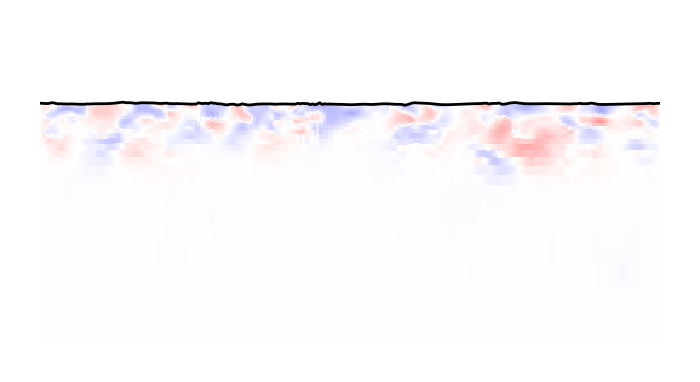

In [34]:
''' Define a case and then plot a certain time '''
case = Case(NL=30, LEVEL=8, path='/projects/DEIKE/jiarongw/multilayer/revision/stokes_ml_2/')
t = 5
fig = plt.figure (figsize=[2,1]); ax = plt.gca()
image = plot_func_span(t, ax)

#### Navier Stokes

In [3]:
import sys
sys.path.append('/projects/DEIKE/jiarongw/jiarongw-postprocessing/jupyter_notebook/project_specific/turbulence/')
sys.path
from prepare import save_object

class Case_NS(object):
    """ This class defines methods specific to cases.
        Attributes: 
            self.NL - number of layers
            self.LEVEL - number of refinement level
            self.path - main folder directory
    """
    def __init__(self, LEVEL=9, path='/projects/DEIKE/jiarongw/multilayer/revision/stokes_ns_2/'):
        self.LEVEL = LEVEL
        self.path = path 

""" Read in velocity field """
def read_fields (case, tsimu=0):
    NSLICE = 256    
    NGRID = 512
    ux_3D = {'name':'ux', 'value':[]} # axis0 in z, axis1 in x, axis2 in y  (in the code)
    uy_3D = {'name':'uy', 'value':[]}
    uz_3D = {'name':'uz', 'value':[]}
    f_3D = {'name':'f', 'value':[]}
    print('t=%gT' %tsimu)
#         phasei = np.where(np.isclose(np.array(case.phase['t']), case.field_t[i]))[0][0]
#         idx = case.phase['idx'][phasei]

    # Read in the fields either from pickle or from slice data
    for field in (ux_3D,uy_3D,uz_3D,f_3D):         
        """NOTICE: to accomodate different pickle versions"""
        picklename = case.path + 'field/' + 'pickle_tiger/' + field['name']+'_t%g' % tsimu +'.pkl'
#             picklename = working_dir + 'field/' + 'pickle_desktop/' + field['name']+'_t%g' % t +'.pkl'
        exists = os.path.exists(picklename)
        # If the pickle is there read in the pickles
        if exists:
            field['value'] = load_object(picklename)
            print('pickle restored!')
        # If no pickle read in from the slice files and pickle dump
        if not exists:
            for sn in range (0, NSLICE-1):
                filename = case.path + 'field/'+field['name']+'_t%g_slice%g' % (tsimu,sn)
                snapshot = np.loadtxt(filename, dtype = np.str, delimiter='\t')
                snapshot.reshape([NGRID,NGRID+1])
                field['value'].append(snapshot[:,0:NGRID].astype(np.float))
            field['value'] = np.array(field['value'])
            save_object(field['value'], picklename)
            
    return ux_3D, uy_3D, uz_3D, f_3D

#             # Shift the values along x axis
#             field['value'] = np.roll(field['value'], -idx, axis=1)

#         case.ux_2D.append(np.average(ux_3D['value'], axis=0))
#         case.uy_2D.append(np.average(uy_3D['value'], axis=0))
#         case.f_2D.append(np.average(f_3D['value'], axis=0))


In [4]:
case_ns = Case_NS(LEVEL=9, path='/projects/DEIKE/jiarongw/multilayer/revision/stokes_ns_2/')
case_ns.L = 1; case_ns.kp = 2*np.pi/case_ns.L; 
case_ns.cp = (9.8/case_ns.kp)**0.5; case_ns.h = 1/2
# for i in range(0,30):
#     t = 1 + 0.1*i
#     ux_3D, uy_3D, uz_3D, f_3D = read_fields (case_ns, tsimu=t)

In [77]:
""" A simplified version of the turbulence interface function 
    Only keeping the x,z,pos,nx,ny,nz columns """
from scipy.interpolate import griddata
import gc
from scipy.special import gamma
from scipy.signal import hilbert
from scipy.signal import butter, filtfilt

class Interface2D():
    """Class for every interface related 2D output. Unstructured grid input.
            
    Attributes:
        xarray: equal distanced x grid 
        zarray: equal distanced y grid 
        <field>data: row data of <field>
        <field>: interpolated data of <field>, including eta/p/grad/dudy/uxw...    
    """
     
    def __init__(self, L0, N, path, t, PRUNING=True, pruningz=1+0.4/4., pre='field/eta_loc_t', filename=None):
        """Example of docstring on the __init__ method.

        The __init__ method may be documented in either the class level
        docstring, or as a docstring on the __init__ method itself.

        Either form is acceptable, but the two should not be mixed. Choose one
        convention to document the __init__ method and be consistent with it.

        Note:
            Do not include the `self` parameter in the ``Args`` section.

        Args:
            L0, N: The desired output grid number
            working_dir: The case's directory
            t: Time of this eta file.
            PRUNING: If eta is output by multiple processes and have multiple headers
                    (only applicable to MPI processed file).  
            pruningz: the height above which the points are discarded
            pre: the prefix of the desirable data file.
            filename: directly give filename instead of creat based on time
        """
        self.L0 = L0; self.N = N; self.t = t
        self.xarray = np.linspace(-self.L0/2.,self.L0/2.,self.N,endpoint=False)+self.L0/2**self.N/2 # Centered grid for interpolation
        self.zarray = np.linspace(-self.L0/2.,self.L0/2.,self.N,endpoint=False)+self.L0/2**self.N/2 # Centered grid for interpolation
        if filename == None:
            filename = path + pre + '%g' %self.t
            snapshot = pd.read_table(filename, delimiter = ',')
        else:           
            snapshot = pd.read_table(filename, delimiter = ',')
        snapshot = pd.read_table(filename, delimiter = ',')
        # Field entries
        # x,pos,epsilon,p,p_p1,p_p2,dudy1,dudy2,dvdx1,dvdx2,dudx1,dudx2,dvdy1,dvdy2,uxa,uya,uxw,uyw
        # Updated: x, pos, epilon,p,dudy,dvdx,dudx,dvdy,uxa,uya,uxw,uyw
        if PRUNING:
            snapshot = snapshot[snapshot.x != 'x']
            snapshot = snapshot.astype('float')
            print('Pruning points above %g!' %pruningz)
            snapshot = snapshot[snapshot.pos < pruningz] # Exclude data over slope 0.4
            """ Maybe I should keep this one """
#             snapshot = snapshot[np.isinf(snapshot.epsilon) == 0] # Gradient showing inf
            
        snapshot = snapshot.sort_values(by = ['x'])      
        
        self.xdata = np.array(snapshot.x, dtype=float)
        self.zdata = np.array(snapshot.z, dtype=float)
        self.etadata = np.array(snapshot.pos, dtype=float)

        del (snapshot); gc.collect()  # Only necessary for 2D for memory issue              
        
        # Interpolate over x and z, 'nearest' is used to ensure that none of the interpolated point is 'nan'
        self.xtile, self.ztile = np.meshgrid(self.xarray,self.zarray)
        self.eta = griddata((self.xdata.ravel(), self.zdata.ravel()), self.etadata.ravel(), (self.xtile, self.ztile), method='nearest')
        del(self.etadata)
        
#         # Get the phase index
#         # axis 0 is y, axis 1 is x
#         # TODO: MAKE THIS 2D COMPATIBLE
#         eta_1D = np.average(self.eta, axis=0)
#         eta_1D_filtered = eta_1D-np.average(eta_1D)
#         # CAUTION: It seems like doing filtering will make the phase inaccurate
# #         eta_1D_filtered = self.__butter_lowpass_filter(eta_1D-np.average(eta_1D))
#         analytic_signal = hilbert(eta_1D_filtered)
#         self.phase = np.angle(analytic_signal)
#         self.idx = abs(self.phase).argmin() # 0 corresponds to crest, -pi/pi corresponds to trough
# #         from scipy.signal import argrelextrema
# #         maxm1 = argrelextrema(self.phase, np.greater)
# #         self.idx = maxm1[0][3]

In [105]:
interface = Interface2D(L0 = case_ns.L, N = 2**case_ns.LEVEL, path = case_ns.path, pre='eta/eta_t',
                        t=2, PRUNING=True, pruningz=0.4/case_ns.kp)


Pruning points above 0.063662!


In [ ]:
ux_3D, uy_3D, uz_3D, f_3D = read_fields (case_ns, tsimu=3)

fig = plt.figure (figsize=[2,1]); ax = plt.gca()
ax.imshow(np.rot90(uy_3D['value'][128,:,:]*f_3D['value'][128,:,:]/case_ns.cp), extent=[-case_ns.L/2, case_ns.L/2, -case_ns.L/2, case_ns.L/2],
          cmap='coolwarm', vmax=0.5, vmin=-0.5)
# xarray = np.linspace(-case_ns.L/2,case_ns.L/2,2**case_ns.LEVEL,endpoint=False) + case_ns.L/case_ns.LEVEL**2/2
# ax.plot(xarray, interface.eta[128,:], lw=0.5, c='k')

ax.set_ylim([-case_ns.L/2, case_ns.L/10])
ax.axis('off')
ax.text(0.05, 0.1, '$t=%gT$' %t, transform=ax.transAxes, fontsize=8)



In [26]:
facet = pd.read_csv(case_ns.path + 'facet.csv', delimiter = ',', names=['x1', 'x2', 'y1', 'y2', 'z1', 'z2'])
facet.replace([np.inf, -np.inf], np.nan, inplace=True)
facet = facet.dropna()
facet = facet.astype('float') 
facet = facet[facet['y1']>-0.5]
facet = facet.sort_values(by = ['x1']) 
facet_clean = facet.reset_index(drop=True)
facet_clean = facet_clean.astype('float') 

In [ ]:
from scipy import interpolate
f = interpolate.interp1d(facet_clean.x2, facet_clean.y2, kind='cubic', fill_value='extrapolate')
xarray = np.linspace(-case_ns.L/2,case_ns.L/2,2**(case_ns.LEVEL-1),endpoint=False) + case_ns.L/2**case_ns.LEVEL

(-0.5, 0.1)

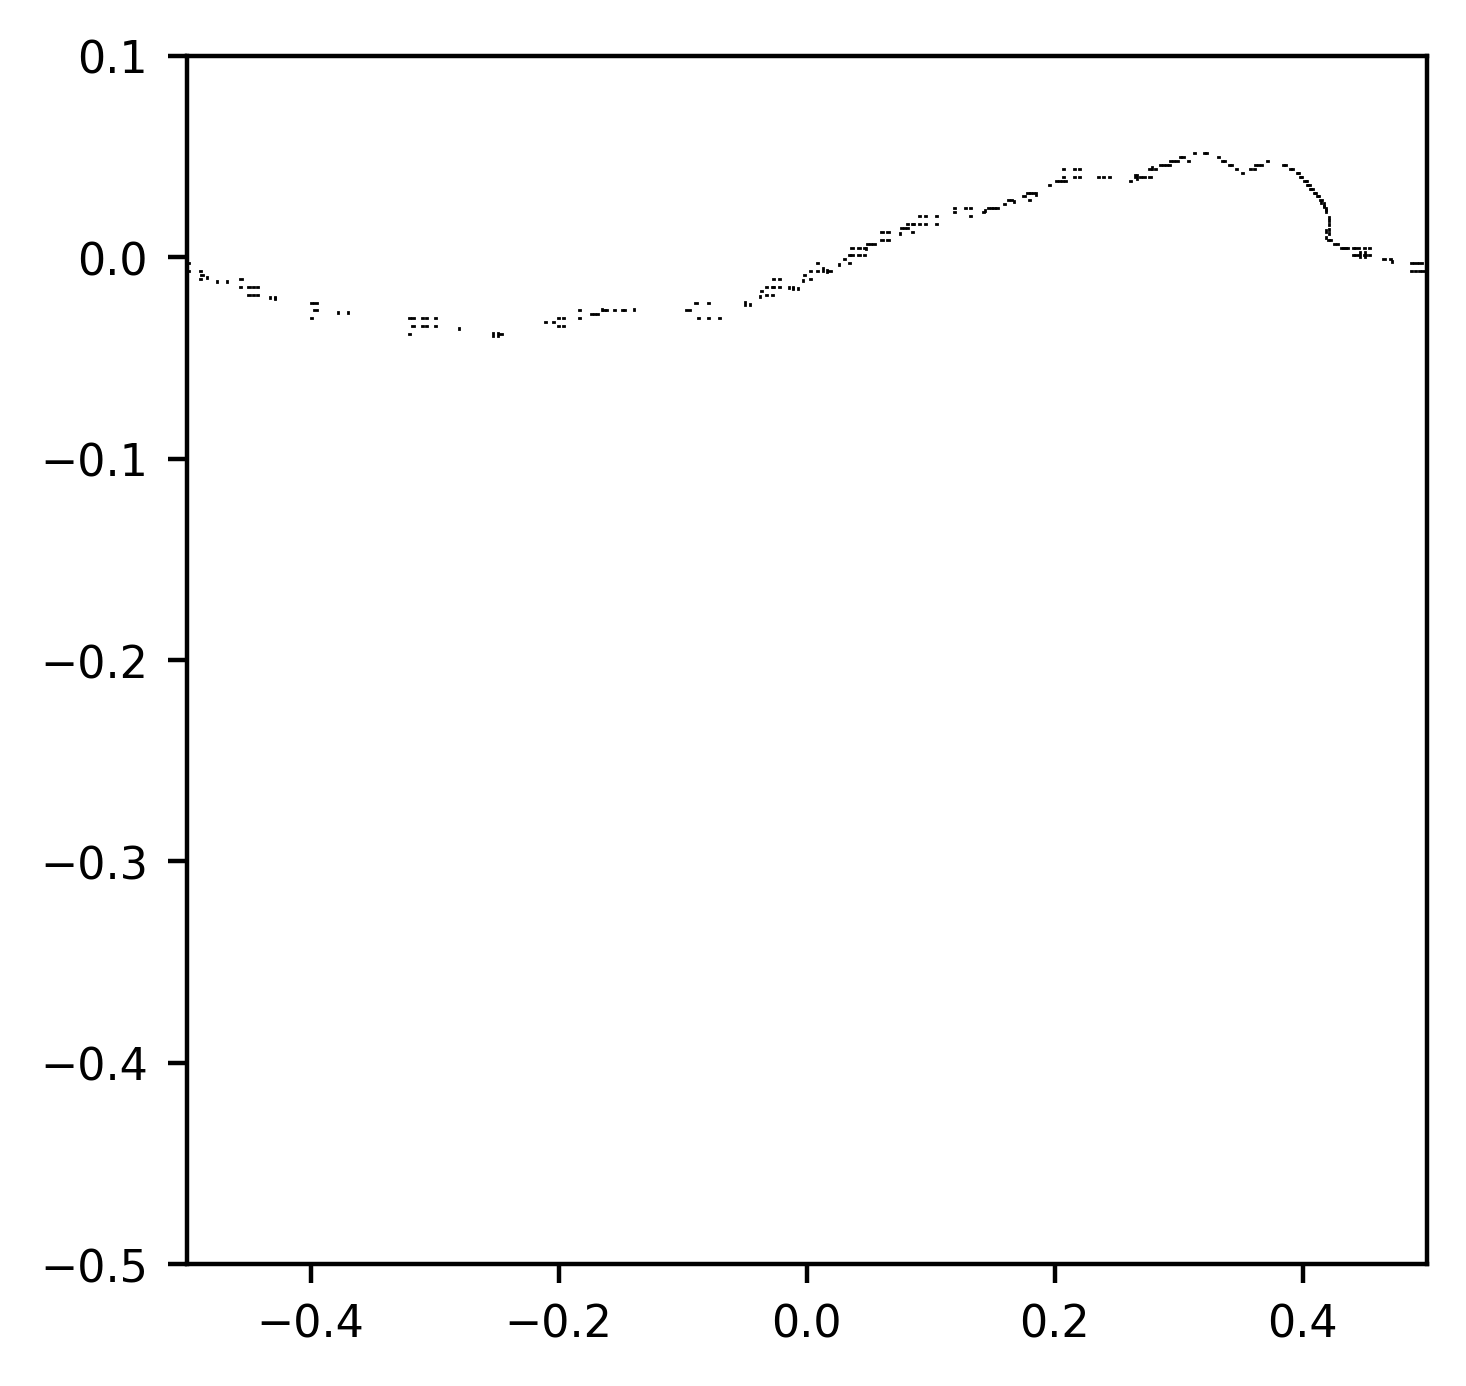

In [33]:
for i in range(0,len(facet_clean)-1):
    xarray = np.linspace(facet_clean.x1[i], facet_clean.x2[i], 10)
    yarray = np.linspace(facet_clean.y1[i], facet_clean.y2[i], 10)
#     print(facet.x1[i])
    plt.plot(xarray, yarray, lw=0.5, c='k')
#     plt.plot(facet_clean.x1[i], facet_clean.y1[i], '.', markersize=0.5)
    
# plt.plot(xarray, f(xarray), lw=0.5)
plt.xlim([-case_ns.L/2, case_ns.L/2])
plt.ylim([-case_ns.L/2, case_ns.L/10])

## <a class = "anchor" id = "2"> Energy dissipation: </a>

/projects/DEIKE/jiarongw/jiarongw-postprocessing/jupyter_notebook/functions/fio.py:51: FutureWarning: read_table is deprecated, use read_csv instead.
  data = pd.read_table(filename, delimiter = table_delimiter, names = table_headers, error_bad_lines=False)
/projects/DEIKE/jiarongw/jiarongw-postprocessing/jupyter_notebook/functions/fio.py:49: FutureWarning: read_table is deprecated, use read_csv instead.
  data = pd.read_table(filename, delimiter = table_delimiter, skiprows= lambda x: logic(x), error_bad_lines=False)


(0, 5.8)

findfont: Font family ['Open Sans'] not found. Falling back to DejaVu Sans.


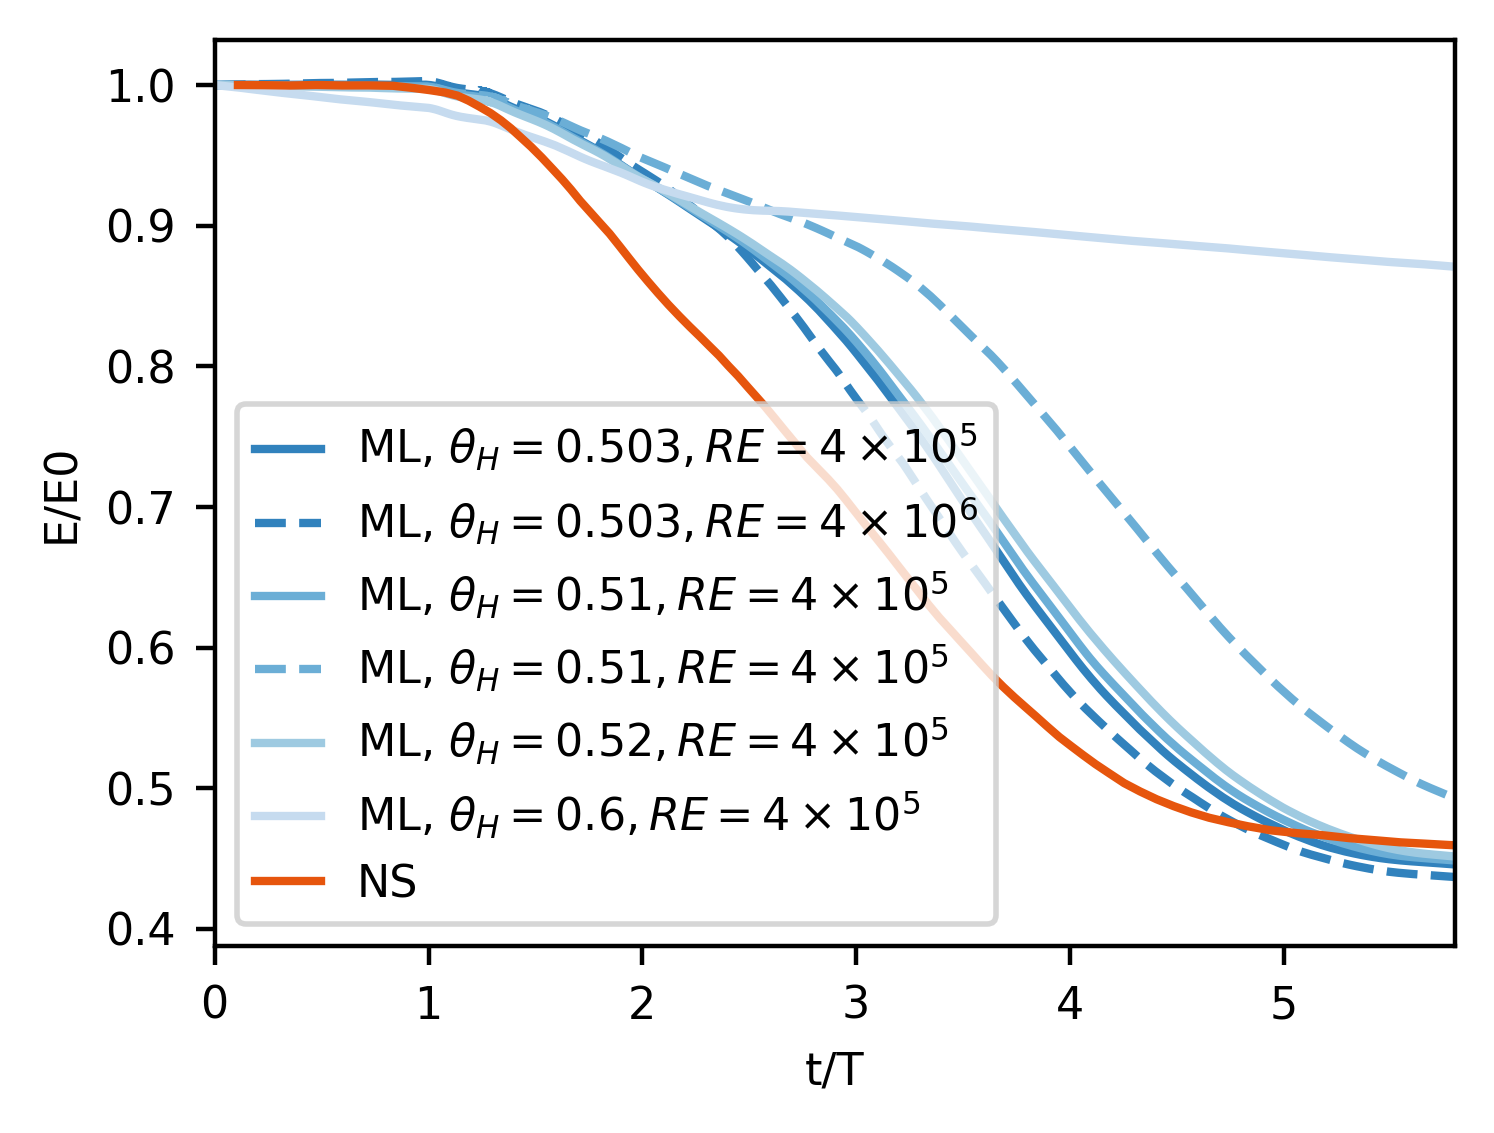

In [9]:
# Stokes energy. Time is scaled by T0

def plot_normalized(ax,energy,tag=' ',line='-',cl='C0'):
    ax.set_prop_cycle(None)
#     ax.plot(energy.t, energy.ke*2/(energy.total[0]), label='2*ke '+tag, linestyle=line)
#     ax.plot(energy.t, energy.gpe*2/(energy.total[0]), '--', label='2*gpe '+tag, linestyle=line)
    ax.plot(energy.t, energy.total/energy.total[0], label=tag, linestyle=line, color=cl)
    ax.set_ylabel("E/E0")

def plot(ax,energy,tag=' ',line='-'):
    ax.set_prop_cycle(None)
#     ax.plot(energy.t, energy.ke, label='ke '+tag, linestyle=line)
#     ax.plot(energy.t, energy.gpe, label='gpe '+tag, linestyle=line)
    ax.plot(energy.t, energy.total/2, label='total/2 '+tag, linestyle=line)
    ax.set_ylabel("E")
    
from scipy.signal import argrelextrema
def fit(ax,energy,localmax=1):
    global T
    t = np.array(energy.t); total = np.array(energy.total)/2
    if localmax:
        localmax_index = argrelextrema(total, np.greater)[0]
        localmax_time = t[localmax_index]
        localmax = total[localmax_index]
        ax.plot(localmax_time,localmax,'.')
        a, b = np.polyfit(localmax_time, np.log(localmax), 1)  
    else:
        a, b = np.polyfit(t, np.log(total), 1)
    ax.plot(t, np.exp(b)*np.exp(a*t), linestyle='-.', label = 'a = %g' %(a/T))
    return (a/T)   

def read(name, skip = None):
    energy,exists = readin(path+name, table_delimiter = ' ', 
                       table_headers = ['t', 'ke', 'gpe'], skipn = skip)
    if exists:
        total = energy.ke + energy.gpe 
    energy.insert(len(energy.columns), "total", total, True)
    return energy
def read_ns(name, skip = 100):
    energy,exists = readin(path+name, table_delimiter = ' ', 
                       table_headers = ['t', 'ke', 'gpe', 'dissipation'], skipn = skip)
    if exists:
        total = energy.ke + energy.gpe 
    energy.insert(len(energy.columns), "total", total, True)
    return energy


fig = plt.figure(figsize=[4,3]); ax = fig.gca()
path = '/home/jiarong/research/projects/multilayer/stokes_ml_RE40000_nl60_N256_coeff0_ak0.35/'
path = '/projects/DEIKE/jiarongw/multilayer/stokes/stokes_8_30_Htheta0.503/'
energy1 = read('budget.dat')
plot_normalized(ax,energy1,r'ML, $\theta_H=%g, RE=4\times10^5$' %0.503, cl=plt.cm.get_cmap('tab20c')(0))
path = '/projects/DEIKE/jiarongw/multilayer/stokes/stokes_8_30_Htheta0.503_RE400000/'
energy1 = read('budget.dat')
plot_normalized(ax,energy1,r'ML, $\theta_H=%g, RE=4\times10^6$' %0.503, '--', cl=plt.cm.get_cmap('tab20c')(0))
path = '/projects/DEIKE/jiarongw/multilayer/stokes/stokes_8_30_Htheta0.51/'
energy1 = read('budget.dat')
plot_normalized(ax,energy1,r'ML, $\theta_H=%g, RE=4\times10^5$' %0.51, cl=plt.cm.get_cmap('tab20c')(1))
path = '/projects/DEIKE/jiarongw/multilayer/stokes/stokes_8_20_Htheta0.51/'
energy1 = read('budget.dat')
plot_normalized(ax,energy1,r'ML, $\theta_H=%g, RE=4\times10^5$' %0.51, '--', cl=plt.cm.get_cmap('tab20c')(1))


path = '/projects/DEIKE/jiarongw/multilayer/stokes/stokes_8_30_Htheta0.52/'
energy1 = read('budget.dat')
plot_normalized(ax,energy1,r'ML, $\theta_H=%g, RE=4\times10^5$' %0.52, cl=plt.cm.get_cmap('tab20c')(2))
path = '/projects/DEIKE/jiarongw/multilayer/stokes/stokes_8_30_Htheta0.6/'
energy1 = read('budget.dat')
plot_normalized(ax,energy1,r'ML, $\theta_H=%g, RE=4\times10^5$' %0.6, cl=plt.cm.get_cmap('tab20c')(3))


# nu = 4*10**(-5); k = 2*np.pi/1; g = 9.8; T = 2*np.pi/(g*k)**0.5
# a_theory = -4*nu*k**2
# a_fit = fit(ax,energy1,0)
# Since time was scaled
# print("a_theory = %g" %a_theory)
# print("a_fit = %g" %a_fit)
# print("T = %g" %T)

# Comparison with other resolution
# path = '/home/jiarong/research/projects/multilayer/stokes_ml_RE40000_nl60_N256_coeff0_ak0.35/'
# energy2 = read('budget.dat')
# plot(ax,energy2,'uniform 60 layers', '--')

# Comparison with ns
path = '/home/jiarong/research/projects/multilayer/stokes_ns_movie/'
path = '/tigress/jiarongw/multilayer/stokes_ns_movie/'
energy2 = read_ns('budgetWater.dat')
# energy2 = energy2.mul([1,9.8,9.8,1,9.8])
plot_normalized(ax,energy2,'NS',cl=plt.cm.get_cmap('tab20c')(4))

plt.legend(loc = 'lower left', handlelength=1.5)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.xlabel("t/T"); 
plt.xlim([0,5.8])
# plt.ylim([0.002,0.009])

/tmp/ipykernel_166625/4271835792.py:33: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy,exists = readin(path+name, table_delimiter = ' ',
/tmp/ipykernel_166625/4271835792.py:33: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy,exists = readin(path+name, table_delimiter = ' ',
/tmp/ipykernel_166625/4271835792.py:33: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy,exists = readin(path+name, table_delimiter = ' ',
/tmp/ipykernel_166625/4271835792.py:41: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy,exists = readin(path+name, table_delimiter = ' ',


(0.0, 6.0)

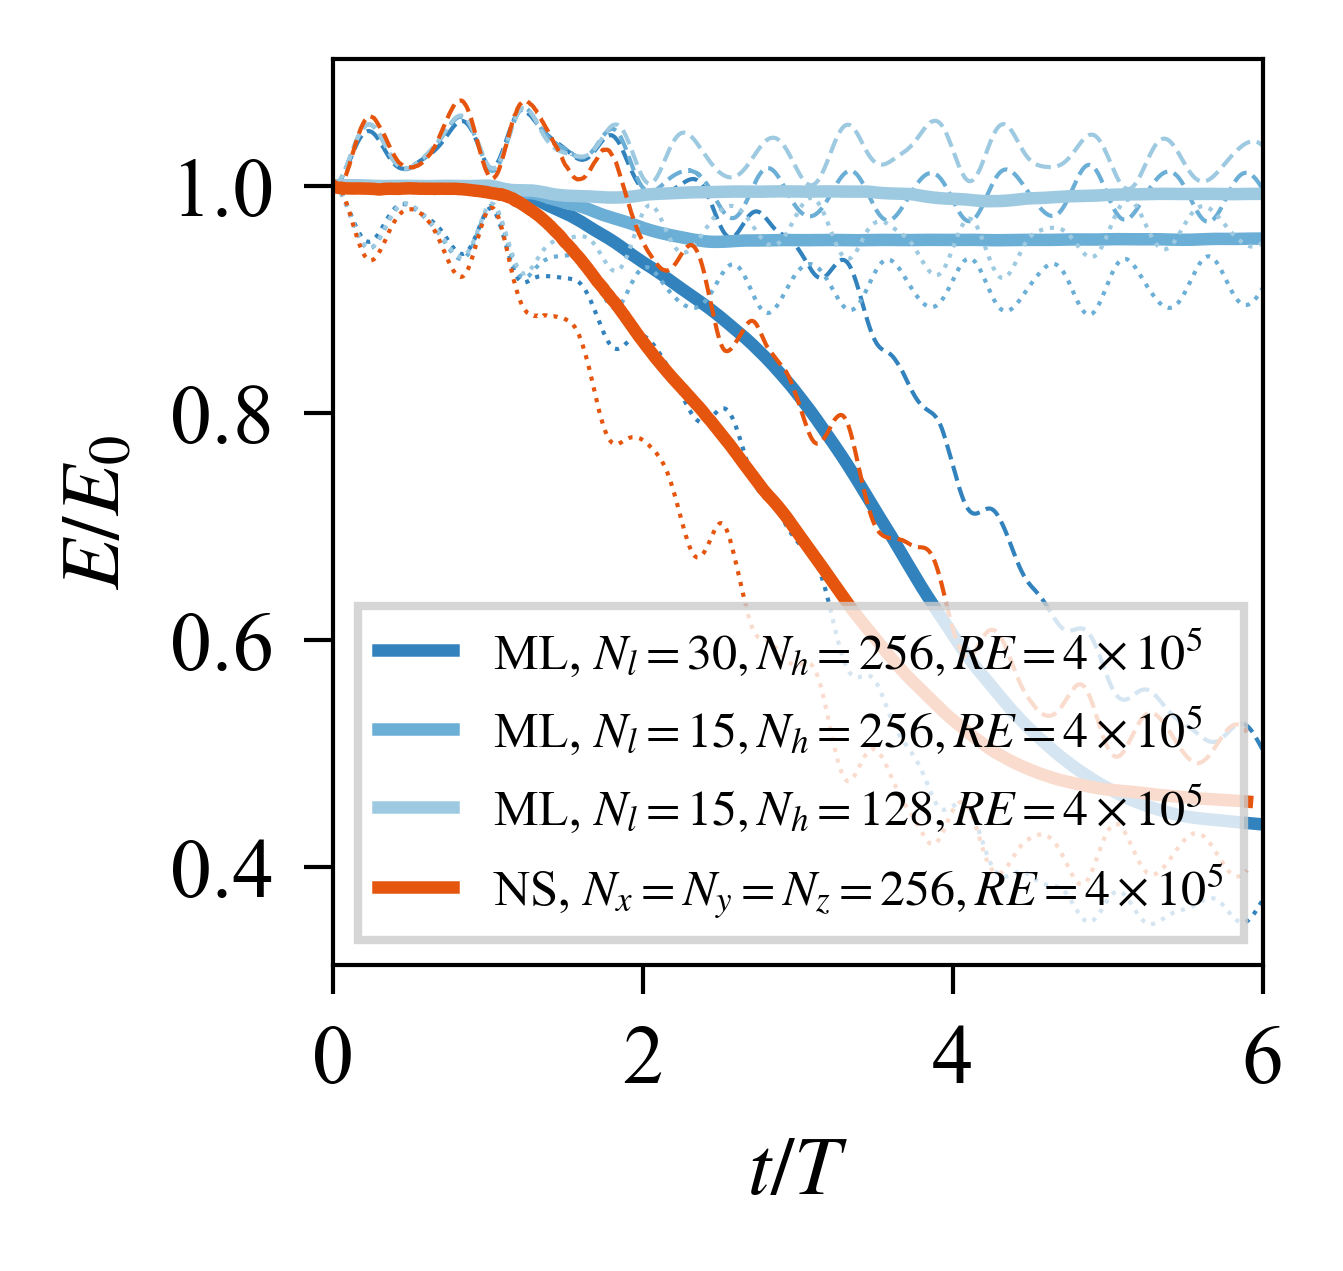

In [44]:
# Stokes energy. Time is scaled by T0

def plot_normalized(ax,energy,tag=' ',line='-',cl='C0'):
    ax.set_prop_cycle(None)
    ax.plot(energy.t, energy.ke/(energy.ke[0]), linestyle='--', color=cl, lw=0.5)
    ax.plot(energy.t, energy.gpe/(energy.gpe[0]), linestyle=':', color=cl, lw=0.5)
    ax.plot(energy.t, energy.total/energy.total[0], label=tag, linestyle=line, color=cl)
    ax.set_ylabel(r"$E/E_0$")

def plot(ax,energy,tag=' ',line='-'):
    ax.set_prop_cycle(None)
#     ax.plot(energy.t, energy.ke, label='ke '+tag, linestyle=line)
#     ax.plot(energy.t, energy.gpe, label='gpe '+tag, linestyle=line)
    ax.plot(energy.t, energy.total/2, label='total/2 '+tag, linestyle=line)
    ax.set_ylabel("E")
    
from scipy.signal import argrelextrema
def fit(ax,energy,localmax=1):
    global T
    t = np.array(energy.t); total = np.array(energy.total)/2
    if localmax:
        localmax_index = argrelextrema(total, np.greater)[0]
        localmax_time = t[localmax_index]
        localmax = total[localmax_index]
        ax.plot(localmax_time,localmax,'.')
        a, b = np.polyfit(localmax_time, np.log(localmax), 1)  
    else:
        a, b = np.polyfit(t, np.log(total), 1)
    ax.plot(t, np.exp(b)*np.exp(a*t), linestyle='-.', label = 'a = %g' %(a/T))
    return (a/T)   

def read(name, skip = None):
    energy,exists = readin(path+name, table_delimiter = ' ', 
                       table_headers = ['t', 'ke', 'gpe'], skipn = skip)
    if exists:
        total = energy.ke + energy.gpe 
    energy.insert(len(energy.columns), "total", total, True)
    return energy

def read_ns(name, skip = 10):
    energy,exists = readin(path+name, table_delimiter = ' ', 
                       table_headers = ['t', 'ke', 'gpe', 'dissipation'], skipn = skip)
    if exists:
        total = energy.ke + energy.gpe 
    energy.insert(len(energy.columns), "total", total, True)
    return energy


fig = plt.figure(figsize=[2,2]); ax = fig.gca()

path = '/projects/DEIKE/jiarongw/multilayer/revision/stokes_ml_1/'
energy1 = read('budget.dat')
plot_normalized(ax,energy1,r'ML, $N_l=%g, N_h=%g, RE=4\times10^5$' %(30, 256), cl=plt.cm.get_cmap('tab20c')(0))

# path = '/projects/DEIKE/jiarongw/multilayer/revision/stokes_ml_2/'
# energy1 = read('budget.dat')
# plot_normalized(ax,energy1,r'ML, $N_l=%g, N_h=%g, RE=4\times10^5$' %(30, 256), cl=plt.cm.get_cmap('tab20c')(0))

path = '/projects/DEIKE/jiarongw/multilayer/revision/stokes_ml_3/'
energy1 = read('budget.dat')
plot_normalized(ax,energy1,r'ML, $N_l=%g, N_h=%g, RE=4\times10^5$' %(15, 256), cl=plt.cm.get_cmap('tab20c')(1))

path = '/projects/DEIKE/jiarongw/multilayer/revision/stokes_ml_4/'
energy1 = read('budget.dat')
plot_normalized(ax,energy1,r'ML, $N_l=%g, N_h=%g, RE=4\times10^5$' %(15, 128), cl=plt.cm.get_cmap('tab20c')(2))

# Comparison with ns
path = '/home/jiarong/research/projects/multilayer/stokes_ns_movie/'
path = '/tigress/jiarongw/multilayer/stokes_ns_movie/'
energy2 = read_ns('budgetWater.dat')
# energy2 = energy2.mul([1,9.8,9.8,1,9.8])
plot_normalized(ax,energy2,r'NS, $N_x=N_y=N_z=256, RE=4\times10^5$',cl=plt.cm.get_cmap('tab20c')(4))

plt.legend(loc = 'lower left', handlelength=1.5, fontsize=6, fancybox=False)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.xlabel(r"$t/T$"); 
plt.xlim([0,6])
# plt.ylim([0.002,0.009])

/tmp/ipykernel_267569/3699840906.py:33: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy,exists = readin(path+name, table_delimiter = ' ',
/tmp/ipykernel_267569/3699840906.py:33: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy,exists = readin(path+name, table_delimiter = ' ',
/tmp/ipykernel_267569/3699840906.py:33: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy,exists = readin(path+name, table_delimiter = ' ',
/tmp/ipykernel_267569/3699840906.py:33: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy,exists = readin(path+name, table_delimiter = ' ',


2.5066282746310007


/tmp/ipykernel_267569/3699840906.py:41: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy,exists = readin(path+name, table_delimiter = ' ',
/tmp/ipykernel_267569/3699840906.py:93: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad_inche" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('figures_revision/energy_single_res.pdf', bbox_inches='tight', pad_inche=0.)


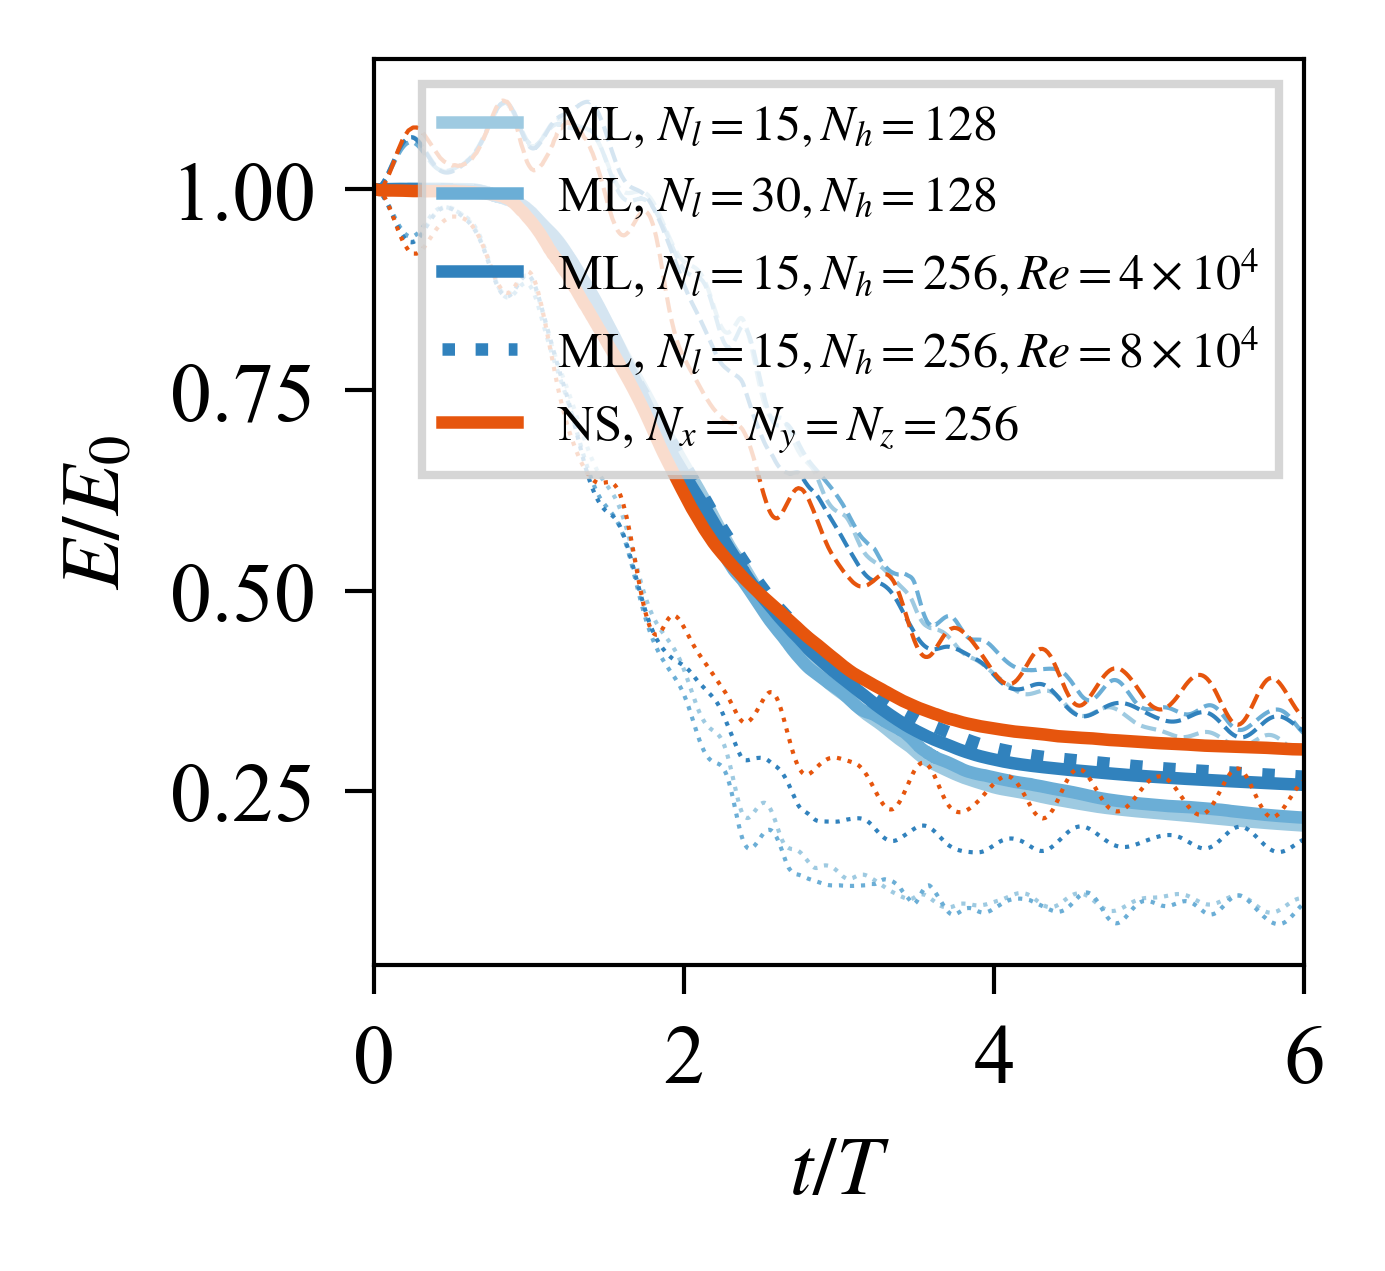

In [49]:
# Stokes energy. Time is scaled by T0

def plot_normalized(ax,energy,tag=' ',line='-',cl='C0'):
    ax.set_prop_cycle(None)
    ax.plot(energy.t, energy.ke/(energy.ke[0]), linestyle='--', color=cl, lw=0.5)
    ax.plot(energy.t, energy.gpe/(energy.gpe[0]), linestyle=':', color=cl, lw=0.5)
    ax.plot(energy.t, energy.total/energy.total[0], label=tag, linestyle=line, color=cl)
    ax.set_ylabel(r"$E/E_0$")

def plot(ax,energy,tag=' ',line='-'):
    ax.set_prop_cycle(None)
#     ax.plot(energy.t, energy.ke, label='ke '+tag, linestyle=line)
#     ax.plot(energy.t, energy.gpe, label='gpe '+tag, linestyle=line)
    ax.plot(energy.t, energy.total/2, label='total/2 '+tag, linestyle=line)
    ax.set_ylabel("E")
    
from scipy.signal import argrelextrema
def fit(ax,energy,localmax=1):
    global T
    t = np.array(energy.t); total = np.array(energy.total)/2
    if localmax:
        localmax_index = argrelextrema(total, np.greater)[0]
        localmax_time = t[localmax_index]
        localmax = total[localmax_index]
        ax.plot(localmax_time,localmax,'.')
        a, b = np.polyfit(localmax_time, np.log(localmax), 1)  
    else:
        a, b = np.polyfit(t, np.log(total), 1)
    ax.plot(t, np.exp(b)*np.exp(a*t), linestyle='-.', label = 'a = %g' %(a/T))
    return (a/T)   

def read(name, skip = None):
    energy,exists = readin(path+name, table_delimiter = ' ', 
                       table_headers = ['t', 'ke', 'gpe'], skipn = skip)
    if exists:
        total = energy.ke + energy.gpe 
    energy.insert(len(energy.columns), "total", total, True)
    return energy

def read_ns(name, skip = 10):
    energy,exists = readin(path+name, table_delimiter = ' ', 
                       table_headers = ['t', 'ke', 'gpe', 'dissipation'], skipn = skip)
    if exists:
        total = energy.ke + energy.gpe 
    energy.insert(len(energy.columns), "total", total, True)
    return energy


fig = plt.figure(figsize=[2,2]); ax = fig.gca()

# path = '/projects/DEIKE/jiarongw/multilayer/revision/stokes_ml_8/'
# energy1 = read('budget.dat')
# plot_normalized(ax,energy1,r'ML, $N_l=%g, N_h=%g$' %(30, 256), cl=plt.cm.get_cmap('tab20c')(0))

path = '/projects/DEIKE/jiarongw/multilayer/revision/stokes_ml_5/'
energy1 = read('budget.dat')
plot_normalized(ax,energy1,r'ML, $N_l=%g, N_h=%g$' %(15, 128), cl=plt.cm.get_cmap('tab20c')(2))

path = '/projects/DEIKE/jiarongw/multilayer/revision/stokes_ml_7/'
energy1 = read('budget.dat')
plot_normalized(ax,energy1,r'ML, $N_l=%g, N_h=%g$' %(30, 128), cl=plt.cm.get_cmap('tab20c')(1))

path = '/projects/DEIKE/jiarongw/multilayer/revision/stokes_ml_6/'
energy1 = read('budget.dat')
plot_normalized(ax,energy1,r'ML, $N_l=%g, N_h=%g, Re=4\times10^4$' %(15, 256), cl=plt.cm.get_cmap('tab20c')(0))

path = '/projects/DEIKE/jiarongw/multilayer/revision/stokes_ml_9/'
energy1 = read('budget.dat')
plt.plot(energy1.t, energy1.total/energy1.total[0], label=r'ML, $N_l=%g, N_h=%g, Re=8\times10^4$' %(15, 256), linestyle=':', c=plt.cm.get_cmap('tab20c')(0))



# Comparison with ns (the time normalization is a bit different)
k_ = 2*np.pi; g_ = 1
T0 = (k_/(g_*k_)**0.5); print(T0)
path = '/projects/DEIKE/jiarongw/multilayer/revision/stokes_ns_3/'
energy2 = read_ns('budgetWater_all.dat')
energy2.t = energy2.t/T0
# energy2 = energy2.mul([1,9.8,9.8,1,9.8])
plot_normalized(ax,energy2,r'NS, $N_x=N_y=N_z=256$',cl=plt.cm.get_cmap('tab20c')(4))

# The higher resolution case is very similar to the lower one so not plotted here
# path = '/projects/DEIKE/jiarongw/multilayer/revision/stokes_ns_4/'
# energy2 = read_ns('budgetWater.dat')
# energy2.t = energy2.t/T0
# # energy2 = energy2.mul([1,9.8,9.8,1,9.8])
# plot_normalized(ax,energy2,r'NS, $N_x=N_y=N_z=512$',cl=plt.cm.get_cmap('tab20c')(5))

plt.legend(loc = 'upper right', handlelength=1.5, fontsize=6, fancybox=False)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.xlabel(r"$t/T$"); 
plt.xlim([0,6])
fig.savefig('figures_revision/energy_single_res.pdf', bbox_inches='tight', pad_inche=0.)

/tmp/ipykernel_298742/726070156.py:33: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy,exists = readin(path+name, table_delimiter = ' ',
/tmp/ipykernel_298742/726070156.py:41: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy,exists = readin(path+name, table_delimiter = ' ',


([<matplotlib.axis.YTick at 0x7f9c97362f80>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

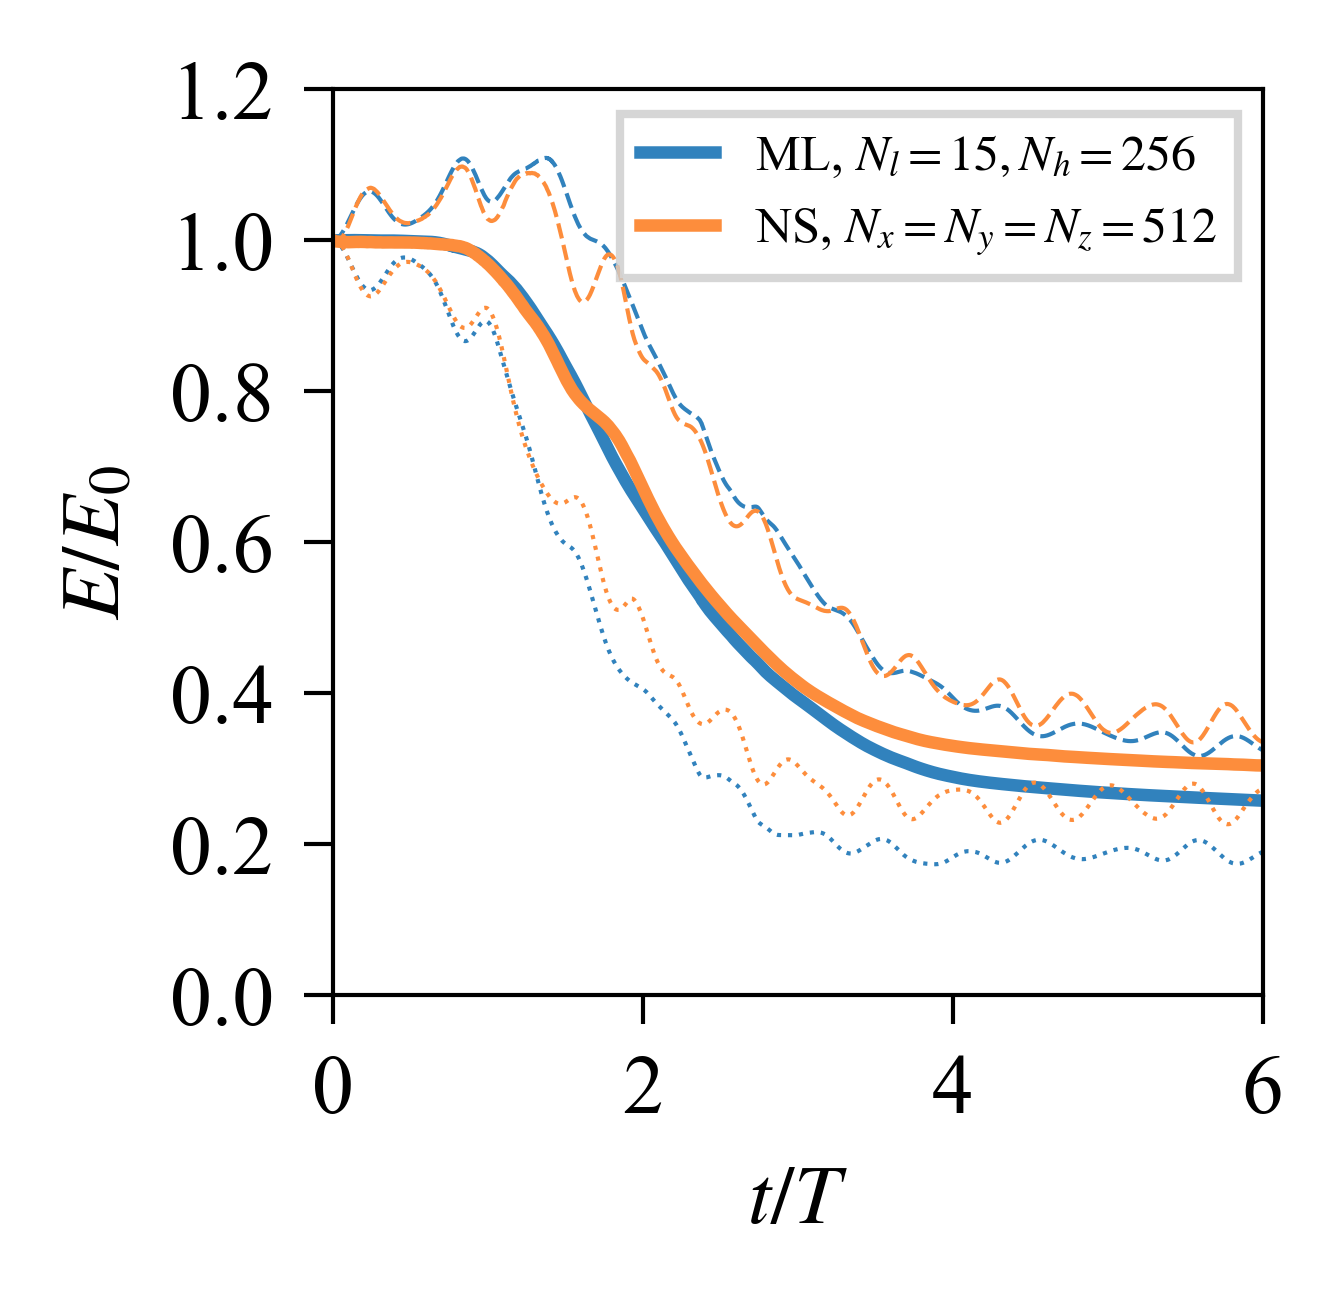

In [4]:
# Stokes energy. Time is scaled by T0

def plot_normalized(ax,energy,tag=' ',line='-',cl='C0'):
    ax.set_prop_cycle(None)
    ax.plot(energy.t, energy.ke/(energy.ke[0]), linestyle='--', color=cl, lw=0.5)
    ax.plot(energy.t, energy.gpe/(energy.gpe[0]), linestyle=':', color=cl, lw=0.5)
    ax.plot(energy.t, energy.total/energy.total[0], label=tag, linestyle=line, color=cl)
    ax.set_ylabel(r"$E/E_0$")

def plot(ax,energy,tag=' ',line='-'):
    ax.set_prop_cycle(None)
#     ax.plot(energy.t, energy.ke, label='ke '+tag, linestyle=line)
#     ax.plot(energy.t, energy.gpe, label='gpe '+tag, linestyle=line)
    ax.plot(energy.t, energy.total/2, label='total/2 '+tag, linestyle=line)
    ax.set_ylabel("E")
    
from scipy.signal import argrelextrema
def fit(ax,energy,localmax=1):
    global T
    t = np.array(energy.t); total = np.array(energy.total)/2
    if localmax:
        localmax_index = argrelextrema(total, np.greater)[0]
        localmax_time = t[localmax_index]
        localmax = total[localmax_index]
        ax.plot(localmax_time,localmax,'.')
        a, b = np.polyfit(localmax_time, np.log(localmax), 1)  
    else:
        a, b = np.polyfit(t, np.log(total), 1)
    ax.plot(t, np.exp(b)*np.exp(a*t), linestyle='-.', label = 'a = %g' %(a/T))
    return (a/T)   

def read(name, skip = None):
    energy,exists = readin(path+name, table_delimiter = ' ', 
                       table_headers = ['t', 'ke', 'gpe'], skipn = skip)
    if exists:
        total = energy.ke + energy.gpe 
    energy.insert(len(energy.columns), "total", total, True)
    return energy

def read_ns(name, skip = 10):
    energy,exists = readin(path+name, table_delimiter = ' ', 
                       table_headers = ['t', 'ke', 'gpe', 'dissipation'], skipn = skip)
    if exists:
        total = energy.ke + energy.gpe 
    energy.insert(len(energy.columns), "total", total, True)
    return energy


fig = plt.figure(figsize=[2,2]); ax = fig.gca()

path = '/projects/DEIKE/jiarongw/multilayer/revision/stokes_ml_6/'
energy1 = read('budget.dat')
plot_normalized(ax,energy1,r'ML, $N_l=%g, N_h=%g$' %(15, 256), cl=plt.cm.get_cmap('tab20c')(0))

# Comparison with ns (the time normalization is a bit different)
# k_ = 2*np.pi; g_ = 1
# T0 = (k_/(g_*k_)**0.5); print(T0)
# path = '/projects/DEIKE/jiarongw/multilayer/revision/stokes_ns_3/'
# energy2 = read_ns('budgetWater_all.dat')
# energy2.t = energy2.t/T0
# # energy2 = energy2.mul([1,9.8,9.8,1,9.8])
# plot_normalized(ax,energy2,r'NS, $N_x=N_y=N_z=512$',cl=plt.cm.get_cmap('tab20c')(4))

# The higher resolution case is very similar to the lower one so not plotted here
path = '/projects/DEIKE/jiarongw/multilayer/revision/stokes_ns_4/'
energy2 = read_ns('budgetWater.dat')
energy2.t = energy2.t/T0
# energy2 = energy2.mul([1,9.8,9.8,1,9.8])
plot_normalized(ax,energy2,r'NS, $N_x=N_y=N_z=512$',cl=plt.cm.get_cmap('tab20c')(5))

plt.legend(loc = 'upper right', handlelength=1.5, fontsize=6, fancybox=False)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.xlabel(r"$t/T$"); 
plt.xlim([0,6]); plt.ylim([0,1.2]); plt.yticks([0,0.2,0.4,0.6,0.8,1.0,1.2])
# fig.savefig('figures_revision/energy_single_res_forpaper.pdf', bbox_inches='tight', pad_inche=0.)

2.5066282746310007


/tmp/ipykernel_298742/726070156.py:33: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy,exists = readin(path+name, table_delimiter = ' ',
/tmp/ipykernel_298742/726070156.py:33: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy,exists = readin(path+name, table_delimiter = ' ',
/tmp/ipykernel_298742/726070156.py:41: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy,exists = readin(path+name, table_delimiter = ' ',
/tmp/ipykernel_298742/726070156.py:41: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy,exists = readin(path+name, table_delimiter = ' ',
/tmp/ipykernel_298742/279397347.py:51: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad_inche" which is no longer supported as of 3.3 and will become an

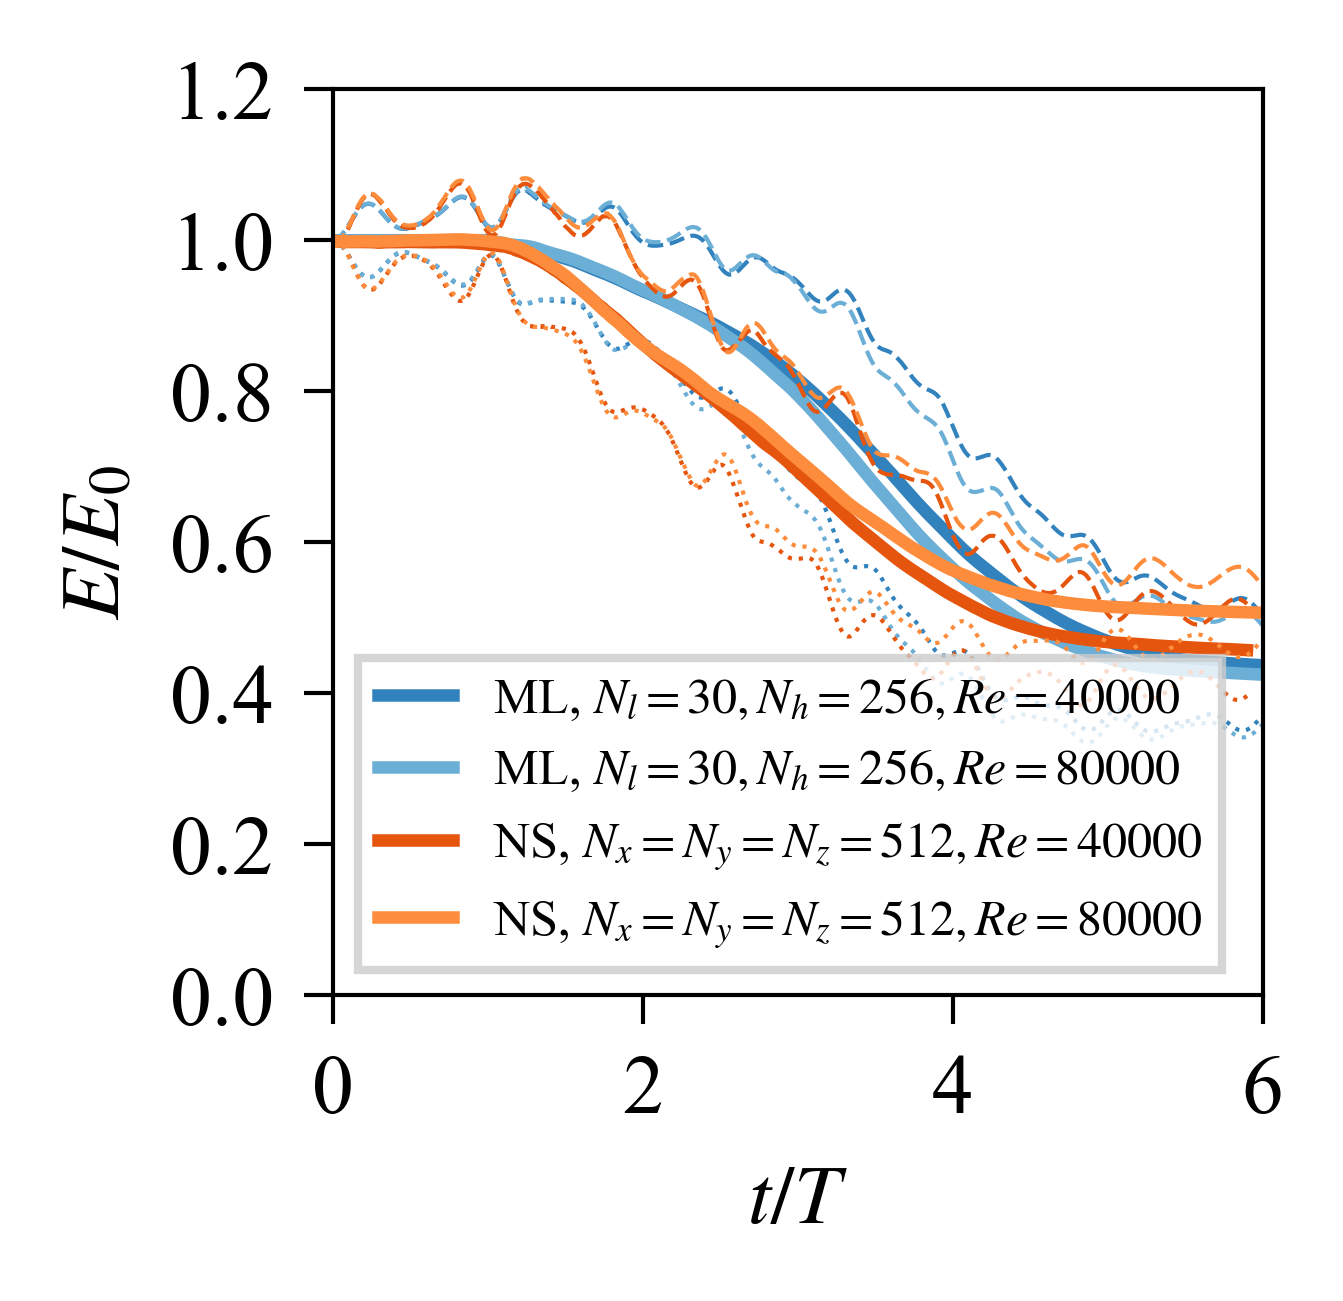

In [49]:
""" ak=0.35 """
# Stokes energy. Time is scaled by T0
fig = plt.figure(figsize=[2,2.]); ax = fig.gca()

k_ = 2*np.pi; g_ = 1; lambda_ = 1
T0 = (2*np.pi/(g_*k_)**0.5); print(T0)
c0 = (g_/k_)**0.5

path = '/projects/DEIKE/jiarongw/multilayer/revision/stokes_ml_1/'
energy1 = read('budget.dat')
energy1.t = energy1.t
plot_normalized(ax, energy1, r'ML, $N_l=%g, N_h=%g, Re=%.0f$' %(30, 256, lambda_*(lambda_*g_)**0.5*40000), cl=plt.cm.get_cmap('tab20c')(0))

path = '/projects/DEIKE/jiarongw/multilayer/revision/stokes_ml_20/'
energy1 = read('budget.dat')
energy1.t = energy1.t
plot_normalized(ax, energy1, r'ML, $N_l=%g, N_h=%g, Re=%.0f$' %(30, 256, lambda_*(lambda_*g_)**0.5*80000), cl=plt.cm.get_cmap('tab20c')(1))

# Comparison with ns (the time normalization is a bit different)

# path = '/projects/DEIKE/jiarongw/multilayer/revision/stokes_ns_2/'
# energy2 = read_ns('budgetWater.dat')
# energy2.t = energy2.t/T0
# # energy2 = energy2.mul([1,9.8,9.8,1,9.8])
# plot_normalized(ax,energy2,r'NS, $N_x=N_y=N_z=512, Bo=1000$',cl=plt.cm.get_cmap('tab20c')(4))

path = '/home/jiarong/research/projects/multilayer/stokes_ns_movie/'
path = '/tigress/jiarongw/multilayer/stokes_ns_movie/'
energy2 = read_ns('budgetWater.dat')
# energy2 = energy2.mul([1,9.8,9.8,1,9.8])
plot_normalized(ax, energy2, r'NS, $N_x=N_y=N_z=512, Re=%.0f$' %(lambda_*(lambda_*g_)**0.5*40000), cl=plt.cm.get_cmap('tab20c')(4))

path = '/projects/DEIKE/jiarongw/multilayer/revision/stokes_ns_8/'
energy2 = read_ns('budgetWater.dat')
energy2.t = energy2.t/T0
plot_normalized(ax, energy2, r'NS, $N_x=N_y=N_z=512, Re=%.0f$' %(lambda_*(lambda_*g_)**0.5*80000), cl=plt.cm.get_cmap('tab20c')(5))


# The higher resolution case is very similar to the lower one so not plotted here
# path = '/projects/DEIKE/jiarongw/multilayer/revision/stokes_ns_4/'
# energy2 = read_ns('budgetWater.dat')
# energy2.t = energy2.t/T0
# # energy2 = energy2.mul([1,9.8,9.8,1,9.8])
# plot_normalized(ax,energy2,r'NS, $N_x=N_y=N_z=512$',cl=plt.cm.get_cmap('tab20c')(5))

plt.legend(loc = 'lower left', handlelength=1.5, fontsize=6, fancybox=False)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.xlabel(r"$t/T$"); 
plt.xlim([0,6]); 
plt.ylim([0.0,1.2]); plt.yticks([0,0.2,0.4,0.6,0.8,1.0,1.2])
fig.savefig('figures_revision/energy_single_res_forpaper_035.pdf', bbox_inches='tight', pad_inche=0.)

In [45]:
k_ = 2*np.pi/40; g_ = 9.8
T0 = (2*np.pi/(g_*k_)**0.5); print(T0)
c0 = (g_/k_)**0.5
c0/k_*40000

5.0641538597300455


2011375.7678018655

In [48]:
(9.8*40**3)**0.5*40000

31678383.79715733

/tmp/ipykernel_164996/929952701.py:33: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy,exists = readin(path+name, table_delimiter = ' ',
/tmp/ipykernel_164996/929952701.py:33: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy,exists = readin(path+name, table_delimiter = ' ',
/tmp/ipykernel_164996/929952701.py:33: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy,exists = readin(path+name, table_delimiter = ' ',
/tmp/ipykernel_164996/929952701.py:69: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad_inche" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('figures_revision/energy_single_smax_035.pdf', bbox_inches='tight', pad_inche=0.)


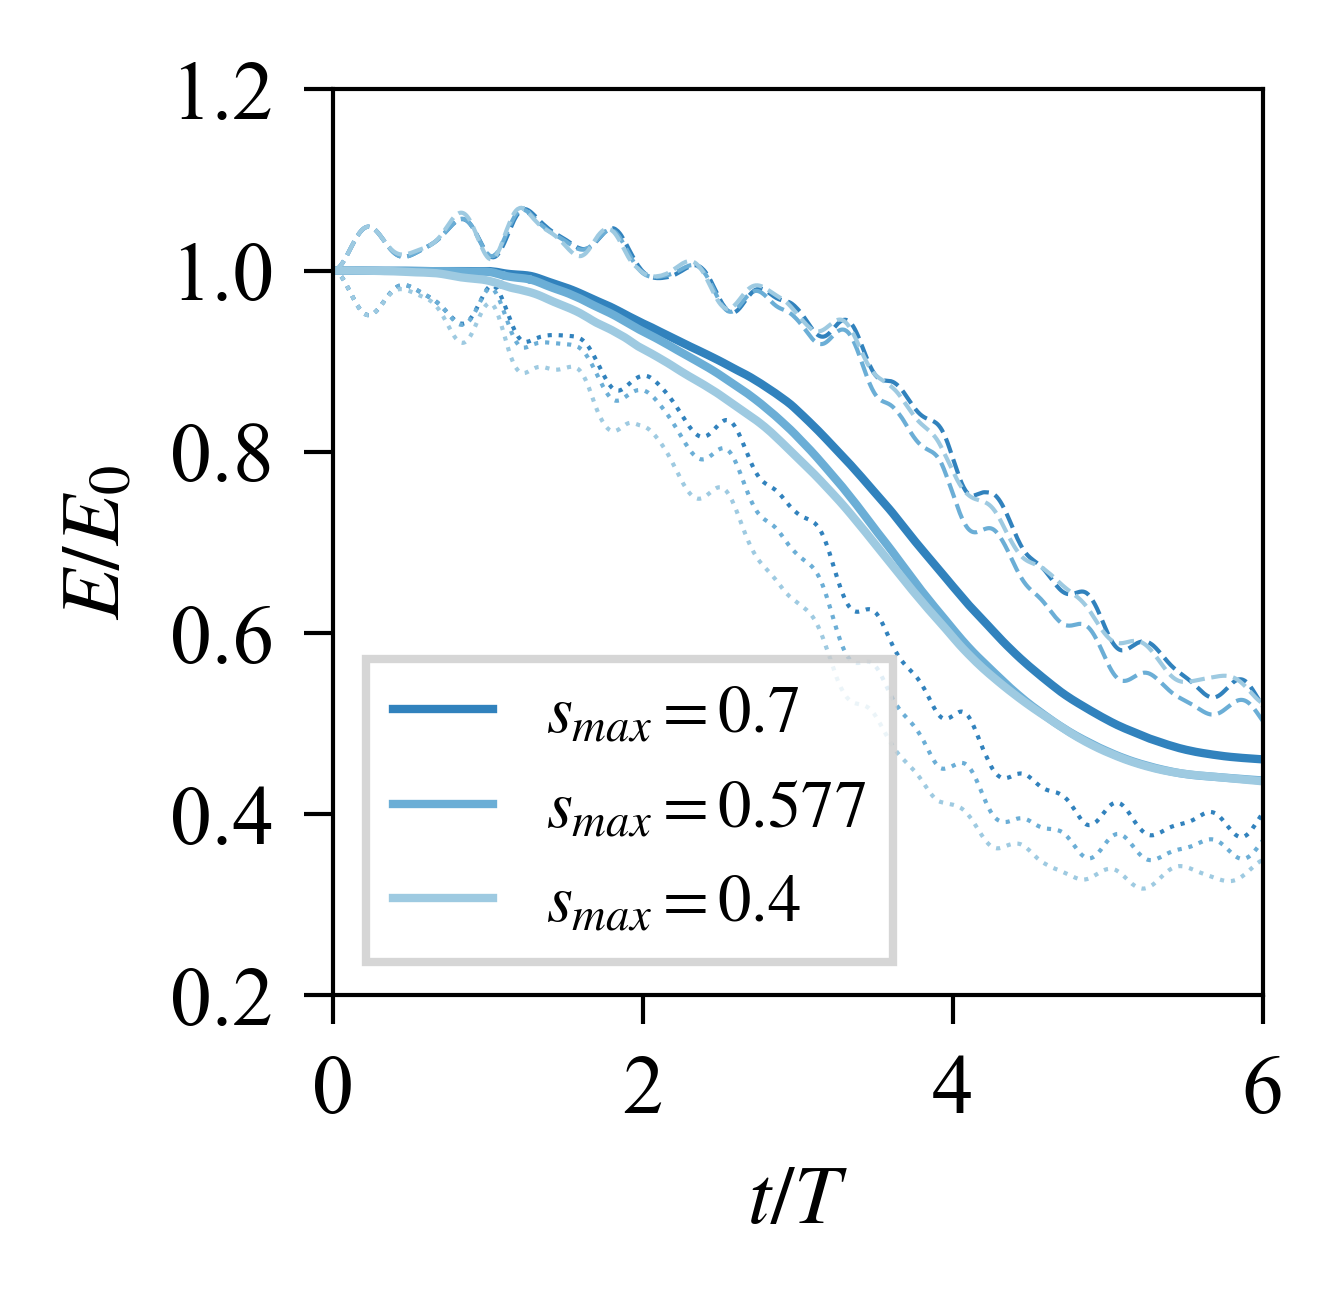

In [38]:
# Stokes energy. Time is scaled by T0

def plot_normalized(ax,energy,tag=' ',line='-',cl='C0'):
    ax.set_prop_cycle(None)
    ax.plot(energy.t, energy.ke/(energy.ke[0]), linestyle='--', color=cl, lw=0.5)
    ax.plot(energy.t, energy.gpe/(energy.gpe[0]), linestyle=':', color=cl, lw=0.5)
    ax.plot(energy.t, energy.total/energy.total[0], label=tag, linestyle=line, color=cl, lw=1)
    ax.set_ylabel(r"$E/E_0$")

def plot(ax,energy,tag=' ',line='-'):
    ax.set_prop_cycle(None)
#     ax.plot(energy.t, energy.ke, label='ke '+tag, linestyle=line)
#     ax.plot(energy.t, energy.gpe, label='gpe '+tag, linestyle=line)
    ax.plot(energy.t, energy.total/2, label='total/2 '+tag, linestyle=line)
    ax.set_ylabel("E")
    
from scipy.signal import argrelextrema
def fit(ax,energy,localmax=1):
    global T
    t = np.array(energy.t); total = np.array(energy.total)/2
    if localmax:
        localmax_index = argrelextrema(total, np.greater)[0]
        localmax_time = t[localmax_index]
        localmax = total[localmax_index]
        ax.plot(localmax_time,localmax,'.')
        a, b = np.polyfit(localmax_time, np.log(localmax), 1)  
    else:
        a, b = np.polyfit(t, np.log(total), 1)
    ax.plot(t, np.exp(b)*np.exp(a*t), linestyle='-.', label = 'a = %g' %(a/T))
    return (a/T)   

def read(name, skip = None):
    energy,exists = readin(path+name, table_delimiter = ' ', 
                       table_headers = ['t', 'ke', 'gpe'], skipn = skip)
    if exists:
        total = energy.ke + energy.gpe 
    energy.insert(len(energy.columns), "total", total, True)
    return energy

def read_ns(name, skip = 10):
    energy,exists = readin(path+name, table_delimiter = ' ', 
                       table_headers = ['t', 'ke', 'gpe', 'dissipation'], skipn = skip)
    if exists:
        total = energy.ke + energy.gpe 
    energy.insert(len(energy.columns), "total", total, True)
    return energy


fig = plt.figure(figsize=[2,2]); ax = fig.gca()

path = '/projects/DEIKE/jiarongw/multilayer/revision/stokes_ml_19/'
energy1 = read('budget.dat')
plot_normalized(ax,energy1,r'$s_{max}=0.7$', cl=plt.cm.get_cmap('tab20c')(0))

path = '/projects/DEIKE/jiarongw/multilayer/revision/stokes_ml_1/'
energy1 = read('budget.dat')
plot_normalized(ax,energy1,r'$s_{max}=0.577$', cl=plt.cm.get_cmap('tab20c')(1))

path = '/projects/DEIKE/jiarongw/multilayer/revision/stokes_ml_18/'
energy1 = read('budget.dat')
plot_normalized(ax,energy1,r'$s_{max}=0.4$', cl=plt.cm.get_cmap('tab20c')(2))


plt.legend(loc = 'lower left', handlelength=1.5, fontsize=8, fancybox=False)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.xlabel(r"$t/T$"); 
plt.xlim([0,6])
plt.ylim([0.2,1.2])
fig.savefig('figures_revision/energy_single_smax_035.pdf', bbox_inches='tight', pad_inche=0.)

/tmp/ipykernel_267569/1586991142.py:33: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy,exists = readin(path+name, table_delimiter = ' ',
/tmp/ipykernel_267569/1586991142.py:33: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy,exists = readin(path+name, table_delimiter = ' ',
/tmp/ipykernel_267569/1586991142.py:33: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy,exists = readin(path+name, table_delimiter = ' ',
/tmp/ipykernel_267569/1586991142.py:33: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy,exists = readin(path+name, table_delimiter = ' ',
/tmp/ipykernel_267569/1586991142.py:41: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy,exists = readin(path

2.5066282746310007


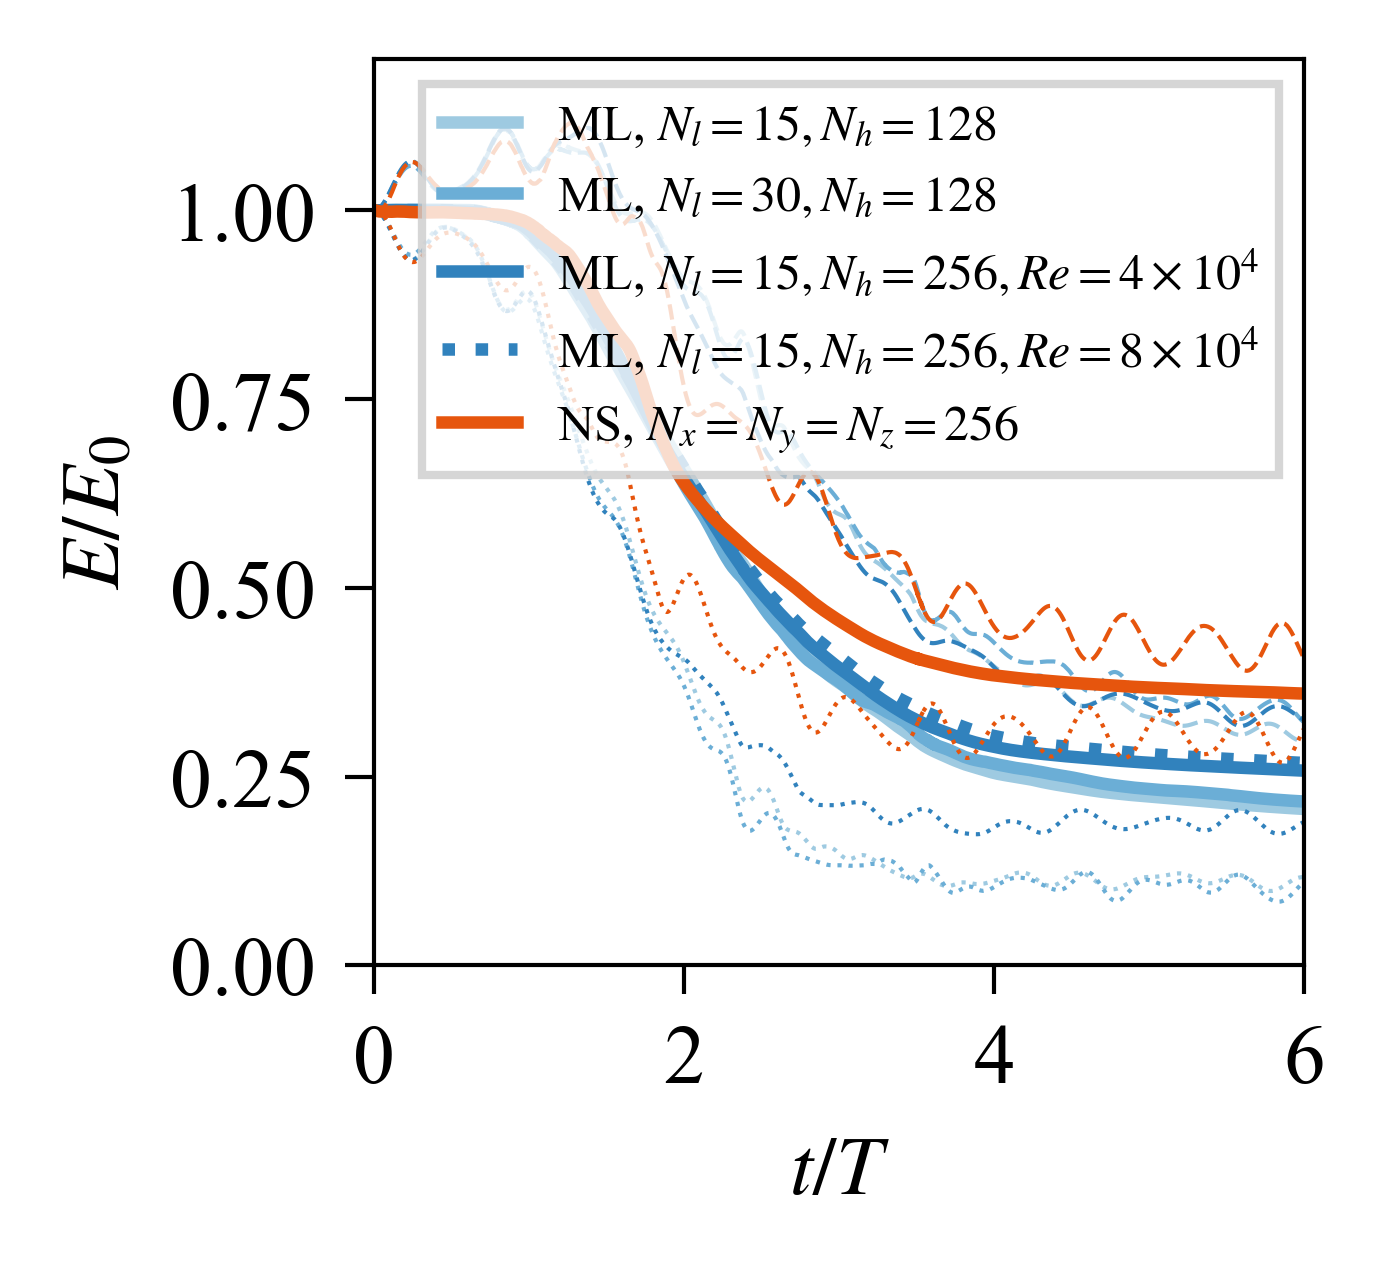

In [7]:
# Stokes energy. Time is scaled by T0

def plot_normalized(ax,energy,tag=' ',line='-',cl='C0'):
    ax.set_prop_cycle(None)
    ax.plot(energy.t, energy.ke/(energy.ke[0]), linestyle='--', color=cl, lw=0.5)
    ax.plot(energy.t, energy.gpe/(energy.gpe[0]), linestyle=':', color=cl, lw=0.5)
    ax.plot(energy.t, energy.total/energy.total[0], label=tag, linestyle=line, color=cl)
    ax.set_ylabel(r"$E/E_0$")

def plot(ax,energy,tag=' ',line='-'):
    ax.set_prop_cycle(None)
#     ax.plot(energy.t, energy.ke, label='ke '+tag, linestyle=line)
#     ax.plot(energy.t, energy.gpe, label='gpe '+tag, linestyle=line)
    ax.plot(energy.t, energy.total/2, label='total/2 '+tag, linestyle=line)
    ax.set_ylabel("E")
    
from scipy.signal import argrelextrema
def fit(ax,energy,localmax=1):
    global T
    t = np.array(energy.t); total = np.array(energy.total)/2
    if localmax:
        localmax_index = argrelextrema(total, np.greater)[0]
        localmax_time = t[localmax_index]
        localmax = total[localmax_index]
        ax.plot(localmax_time,localmax,'.')
        a, b = np.polyfit(localmax_time, np.log(localmax), 1)  
    else:
        a, b = np.polyfit(t, np.log(total), 1)
    ax.plot(t, np.exp(b)*np.exp(a*t), linestyle='-.', label = 'a = %g' %(a/T))
    return (a/T)   

def read(name, skip = None):
    energy,exists = readin(path+name, table_delimiter = ' ', 
                       table_headers = ['t', 'ke', 'gpe'], skipn = skip)
    if exists:
        total = energy.ke + energy.gpe 
    energy.insert(len(energy.columns), "total", total, True)
    return energy

def read_ns(name, skip = 10):
    energy,exists = readin(path+name, table_delimiter = ' ', 
                       table_headers = ['t', 'ke', 'gpe', 'dissipation'], skipn = skip)
    if exists:
        total = energy.ke + energy.gpe 
    energy.insert(len(energy.columns), "total", total, True)
    return energy


fig = plt.figure(figsize=[2,2]); ax = fig.gca()

# path = '/projects/DEIKE/jiarongw/multilayer/revision/stokes_ml_8/'
# energy1 = read('budget.dat')
# plot_normalized(ax,energy1,r'ML, $N_l=%g, N_h=%g$' %(30, 256), cl=plt.cm.get_cmap('tab20c')(0))

path = '/projects/DEIKE/jiarongw/multilayer/revision/stokes_ml_5/'
energy1 = read('budget.dat')
plot_normalized(ax,energy1,r'ML, $N_l=%g, N_h=%g$' %(15, 128), cl=plt.cm.get_cmap('tab20c')(2))

path = '/projects/DEIKE/jiarongw/multilayer/revision/stokes_ml_7/'
energy1 = read('budget.dat')
plot_normalized(ax,energy1,r'ML, $N_l=%g, N_h=%g$' %(30, 128), cl=plt.cm.get_cmap('tab20c')(1))

path = '/projects/DEIKE/jiarongw/multilayer/revision/stokes_ml_6/'
energy1 = read('budget.dat')
plot_normalized(ax,energy1,r'ML, $N_l=%g, N_h=%g, Re=4\times10^4$' %(15, 256), cl=plt.cm.get_cmap('tab20c')(0))

path = '/projects/DEIKE/jiarongw/multilayer/revision/stokes_ml_9/'
energy1 = read('budget.dat')
plt.plot(energy1.t, energy1.total/energy1.total[0], label=r'ML, $N_l=%g, N_h=%g, Re=8\times10^4$' %(15, 256), linestyle=':', c=plt.cm.get_cmap('tab20c')(0))



# Comparison with ns (the time normalization is a bit different)
k_ = 2*np.pi; g_ = 1
T0 = (k_/(g_*k_)**0.5); print(T0)
path = '/projects/DEIKE/jiarongw/multilayer/revision/stokes_ns_5/'
energy2 = read_ns('budgetWater.dat')
energy2.t = energy2.t/T0
# energy2 = energy2.mul([1,9.8,9.8,1,9.8])
plot_normalized(ax,energy2,r'NS, $N_x=N_y=N_z=256$',cl=plt.cm.get_cmap('tab20c')(4))

# path = '/projects/DEIKE/jiarongw/multilayer/revision/stokes_ns_3/'
# energy2 = read_ns('budgetWater_all.dat')
# energy2.t = energy2.t/T0
# # energy2 = energy2.mul([1,9.8,9.8,1,9.8])
# plot_normalized(ax,energy2,r'NS, $N_x=N_y=N_z=256$',cl=plt.cm.get_cmap('tab20c')(4))

# The higher resolution case is very similar to the lower one so not plotted here
# path = '/projects/DEIKE/jiarongw/multilayer/revision/stokes_ns_4/'
# energy2 = read_ns('budgetWater.dat')
# energy2.t = energy2.t/T0
# # energy2 = energy2.mul([1,9.8,9.8,1,9.8])
# plot_normalized(ax,energy2,r'NS, $N_x=N_y=N_z=512$',cl=plt.cm.get_cmap('tab20c')(5))

plt.legend(loc = 'upper right', handlelength=1.5, fontsize=6, fancybox=False)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.xlabel(r"$t/T$"); 
plt.xlim([0,6])
plt.ylim([0,1.2])
fig.savefig('figures_revision/energy_single_res.pdf', bbox_inches='tight', pad_inche=0.)
# plt.ylim([0.002,0.009])

/tmp/ipykernel_155529/1373515263.py:33: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy,exists = readin(path+name, table_delimiter = ' ',
/tmp/ipykernel_155529/1373515263.py:33: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy,exists = readin(path+name, table_delimiter = ' ',
/tmp/ipykernel_155529/1373515263.py:33: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy,exists = readin(path+name, table_delimiter = ' ',
/tmp/ipykernel_155529/1373515263.py:69: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad_inche" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('figures_revision/energy_single_smax.pdf', bbox_inches='tight', pad_inche=0.)


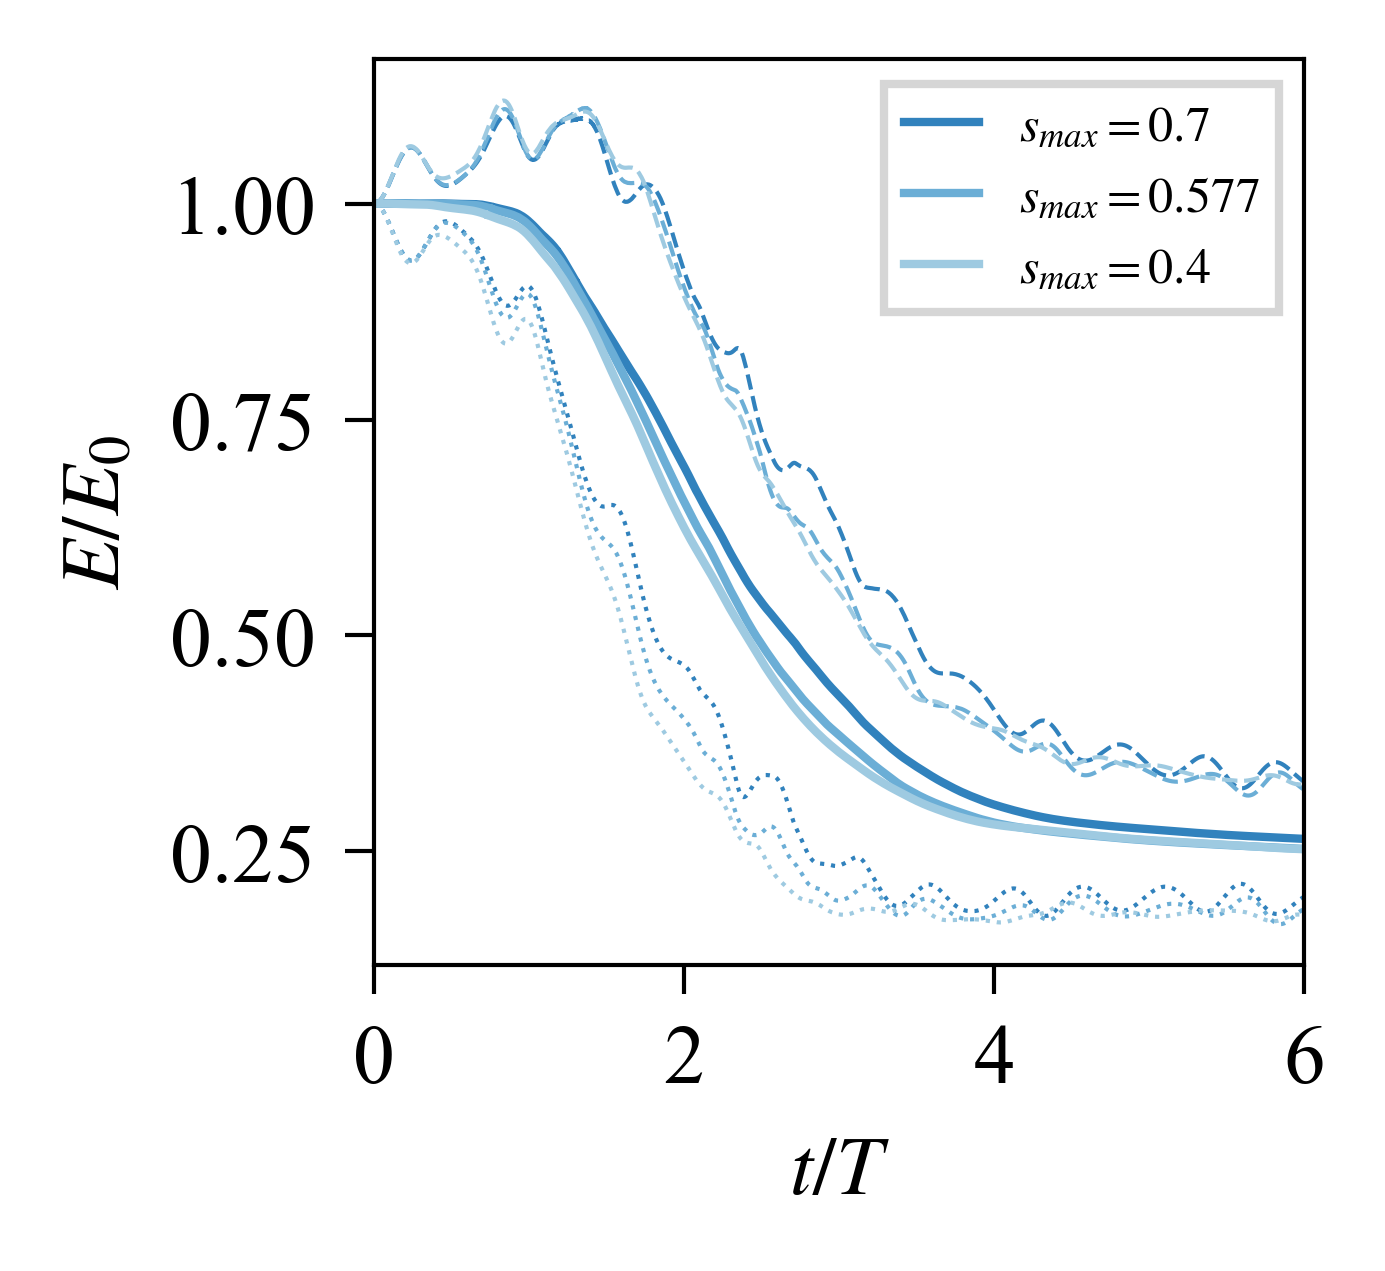

In [12]:
# Stokes energy. Time is scaled by T0

def plot_normalized(ax,energy,tag=' ',line='-',cl='C0'):
    ax.set_prop_cycle(None)
    ax.plot(energy.t, energy.ke/(energy.ke[0]), linestyle='--', color=cl, lw=0.5)
    ax.plot(energy.t, energy.gpe/(energy.gpe[0]), linestyle=':', color=cl, lw=0.5)
    ax.plot(energy.t, energy.total/energy.total[0], label=tag, linestyle=line, color=cl, lw=1)
    ax.set_ylabel(r"$E/E_0$")

def plot(ax,energy,tag=' ',line='-'):
    ax.set_prop_cycle(None)
#     ax.plot(energy.t, energy.ke, label='ke '+tag, linestyle=line)
#     ax.plot(energy.t, energy.gpe, label='gpe '+tag, linestyle=line)
    ax.plot(energy.t, energy.total/2, label='total/2 '+tag, linestyle=line)
    ax.set_ylabel("E")
    
from scipy.signal import argrelextrema
def fit(ax,energy,localmax=1):
    global T
    t = np.array(energy.t); total = np.array(energy.total)/2
    if localmax:
        localmax_index = argrelextrema(total, np.greater)[0]
        localmax_time = t[localmax_index]
        localmax = total[localmax_index]
        ax.plot(localmax_time,localmax,'.')
        a, b = np.polyfit(localmax_time, np.log(localmax), 1)  
    else:
        a, b = np.polyfit(t, np.log(total), 1)
    ax.plot(t, np.exp(b)*np.exp(a*t), linestyle='-.', label = 'a = %g' %(a/T))
    return (a/T)   

def read(name, skip = None):
    energy,exists = readin(path+name, table_delimiter = ' ', 
                       table_headers = ['t', 'ke', 'gpe'], skipn = skip)
    if exists:
        total = energy.ke + energy.gpe 
    energy.insert(len(energy.columns), "total", total, True)
    return energy

def read_ns(name, skip = 10):
    energy,exists = readin(path+name, table_delimiter = ' ', 
                       table_headers = ['t', 'ke', 'gpe', 'dissipation'], skipn = skip)
    if exists:
        total = energy.ke + energy.gpe 
    energy.insert(len(energy.columns), "total", total, True)
    return energy


fig = plt.figure(figsize=[2,2]); ax = fig.gca()

path = '/projects/DEIKE/jiarongw/multilayer/revision/stokes_ml_10_slope0.7/'
energy1 = read('budget.dat')
plot_normalized(ax,energy1,r'$s_{max}=0.7$', cl=plt.cm.get_cmap('tab20c')(0))

path = '/projects/DEIKE/jiarongw/multilayer/revision/stokes_ml_9_slope0.577/'
energy1 = read('budget.dat')
plot_normalized(ax,energy1,r'$s_{max}=0.577$', cl=plt.cm.get_cmap('tab20c')(1))

path = '/projects/DEIKE/jiarongw/multilayer/revision/stokes_ml_11_slope0.4/'
energy1 = read('budget.dat')
plot_normalized(ax,energy1,r'$s_{max}=0.4$', cl=plt.cm.get_cmap('tab20c')(2))


plt.legend(loc = 'upper right', handlelength=1.5, fontsize=6, fancybox=False)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.xlabel(r"$t/T$"); 
plt.xlim([0,6])
# plt.ylim([0.002,0.009])
fig.savefig('figures_revision/energy_single_smax.pdf', bbox_inches='tight', pad_inche=0.)

In [5]:
# Computation of breaking coefficient b
kp = 2*np.pi/1; g = 1; cp = (g/kp)**0.5; T = 2*np.pi/(g*kp)**0.5
epsilon_l = 0.4*10**(-4)/(3*T) # After divided by rho
b = epsilon_l*g/cp**5
print("b = %g" %b)
S = 0.35 # or 0.1 if std eta
b_ = 0.4*(S-0.08)**(5/2)
print("b_ = %g" %b_)
print("T = %g" %T)
print("cp = %g" %cp)

b = 0.000526379
b_ = 0.015152
T = 2.50663
cp = 0.398942


In [6]:
# Computational power
clock_ns = 4*40*8
clock_ml = 2*32*(1/6)
clock_ml

10.666666666666666

Text(0.5, 1.0, '256*256 30 layers')

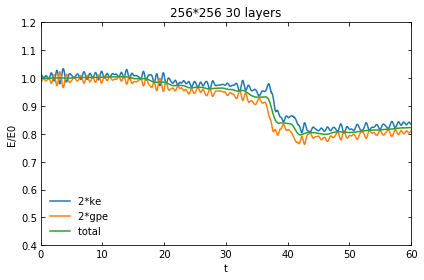

In [19]:
# 1D focusing case. Time is not scaled anymore
fig = plt.figure(); ax = fig.gca()
N = 256; nl = 30
path = '/home/jiarong/research/projects/multilayer/field_focusing_1D_P0010_RE40000_%g_%g/' %(N,nl)
energy1 = read('energy_after_remap.dat')
plot_normalized(ax,energy1)
plt.ylim([0.4,1.2]); 
plt.xlim([0, 60])
plt.legend(loc = 'lower left')
plt.xlabel('t')
plt.title('%g*%g %g layers' %(N,N,nl))

0.2656422


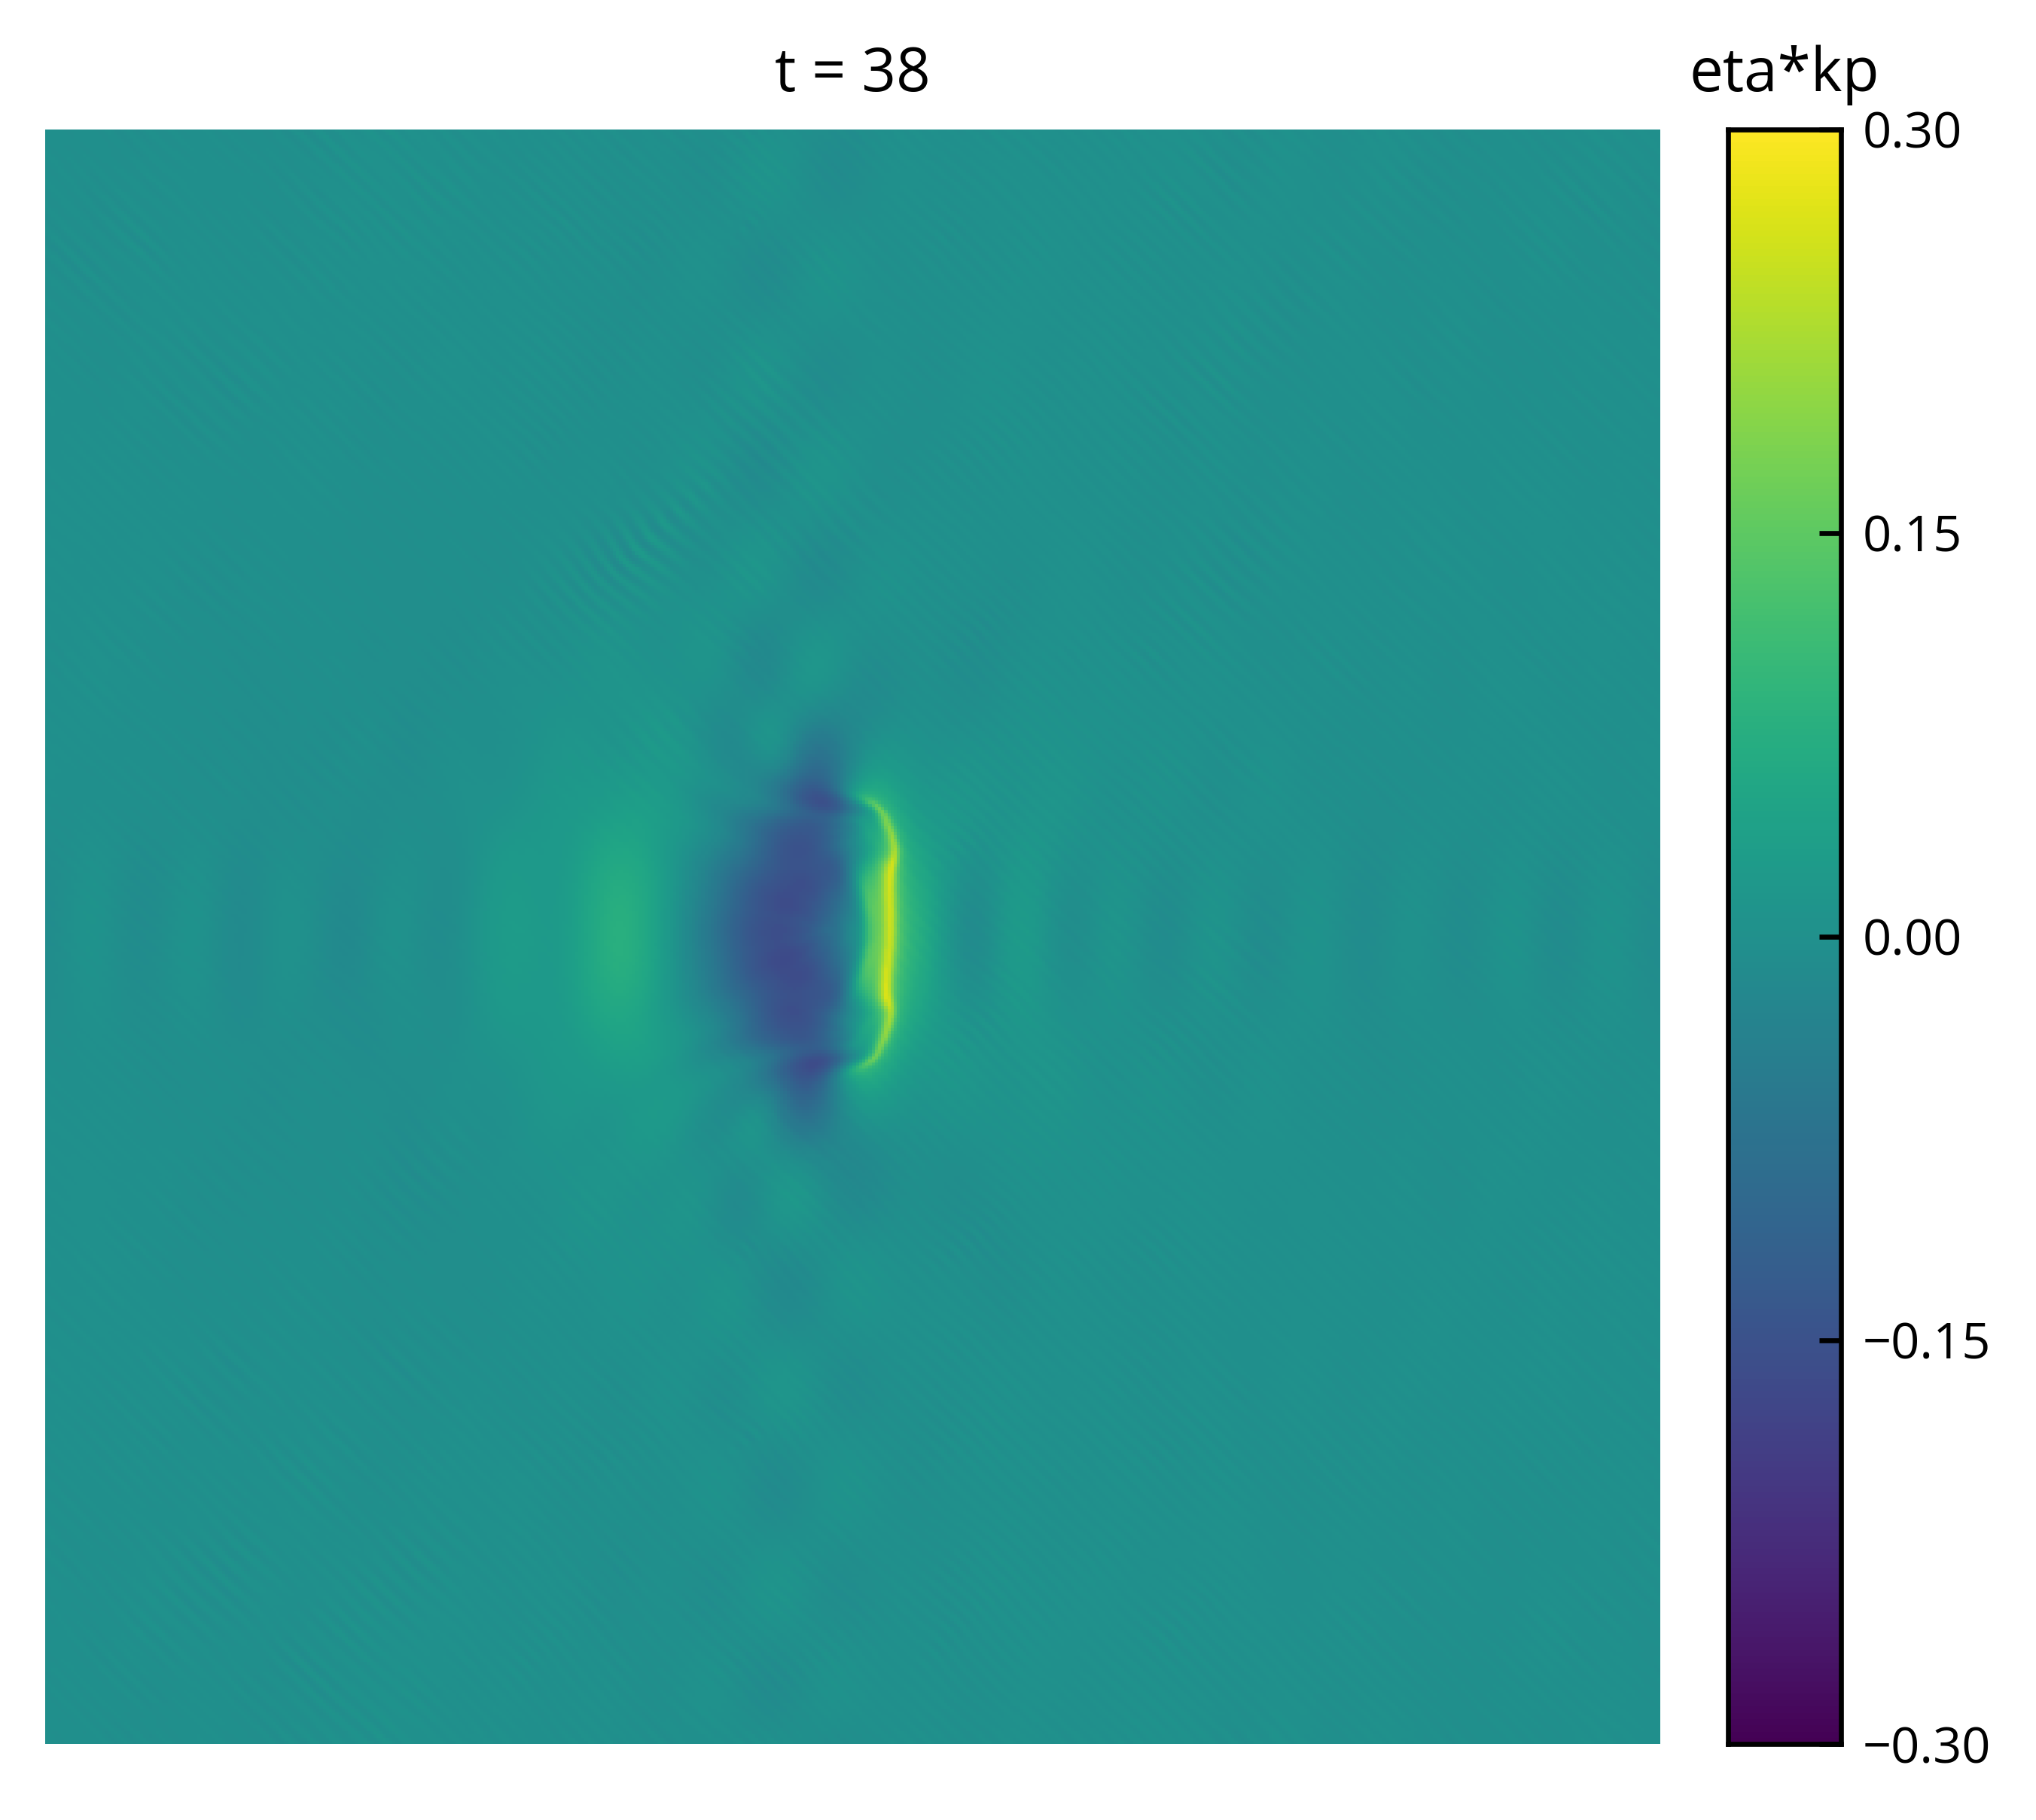

In [57]:
# Short crest focusing case. Wave height.
N = 512; nl = 30; t = 38
pfile = '/home/jiarong/research/projects/multilayer/' + \
        'field_focusing_2D_P0001_RE40000_%g_%g/' %(N,nl) \
        +'surface/eta_matrix_%g' %t
eta = np.fromfile(pfile, dtype=np.float32)
eta = eta.reshape(N+1,N+1)
kp = 2*np.pi/10
eta = eta[1:,1:]*kp # Normalized by peak velocity
image = np.rot90(eta)
figure, grid = contour_generator()
pcontour = grid[0].imshow(image, extent=[-25,25,-25,25], vmax=0.3, vmin=-0.3, cmap='viridis')
grid[0].set_title('t = %g' %t)
grid[0].axis('off')
grid[0].cax.colorbar(pcontour)
grid[0].cax.set_title('eta*kp')
# grid[0].set_xlabel('x'); grid[0].set_ylabel('y')
print(np.max(eta))

Text(0.5, 1.0, 'deta/dx')

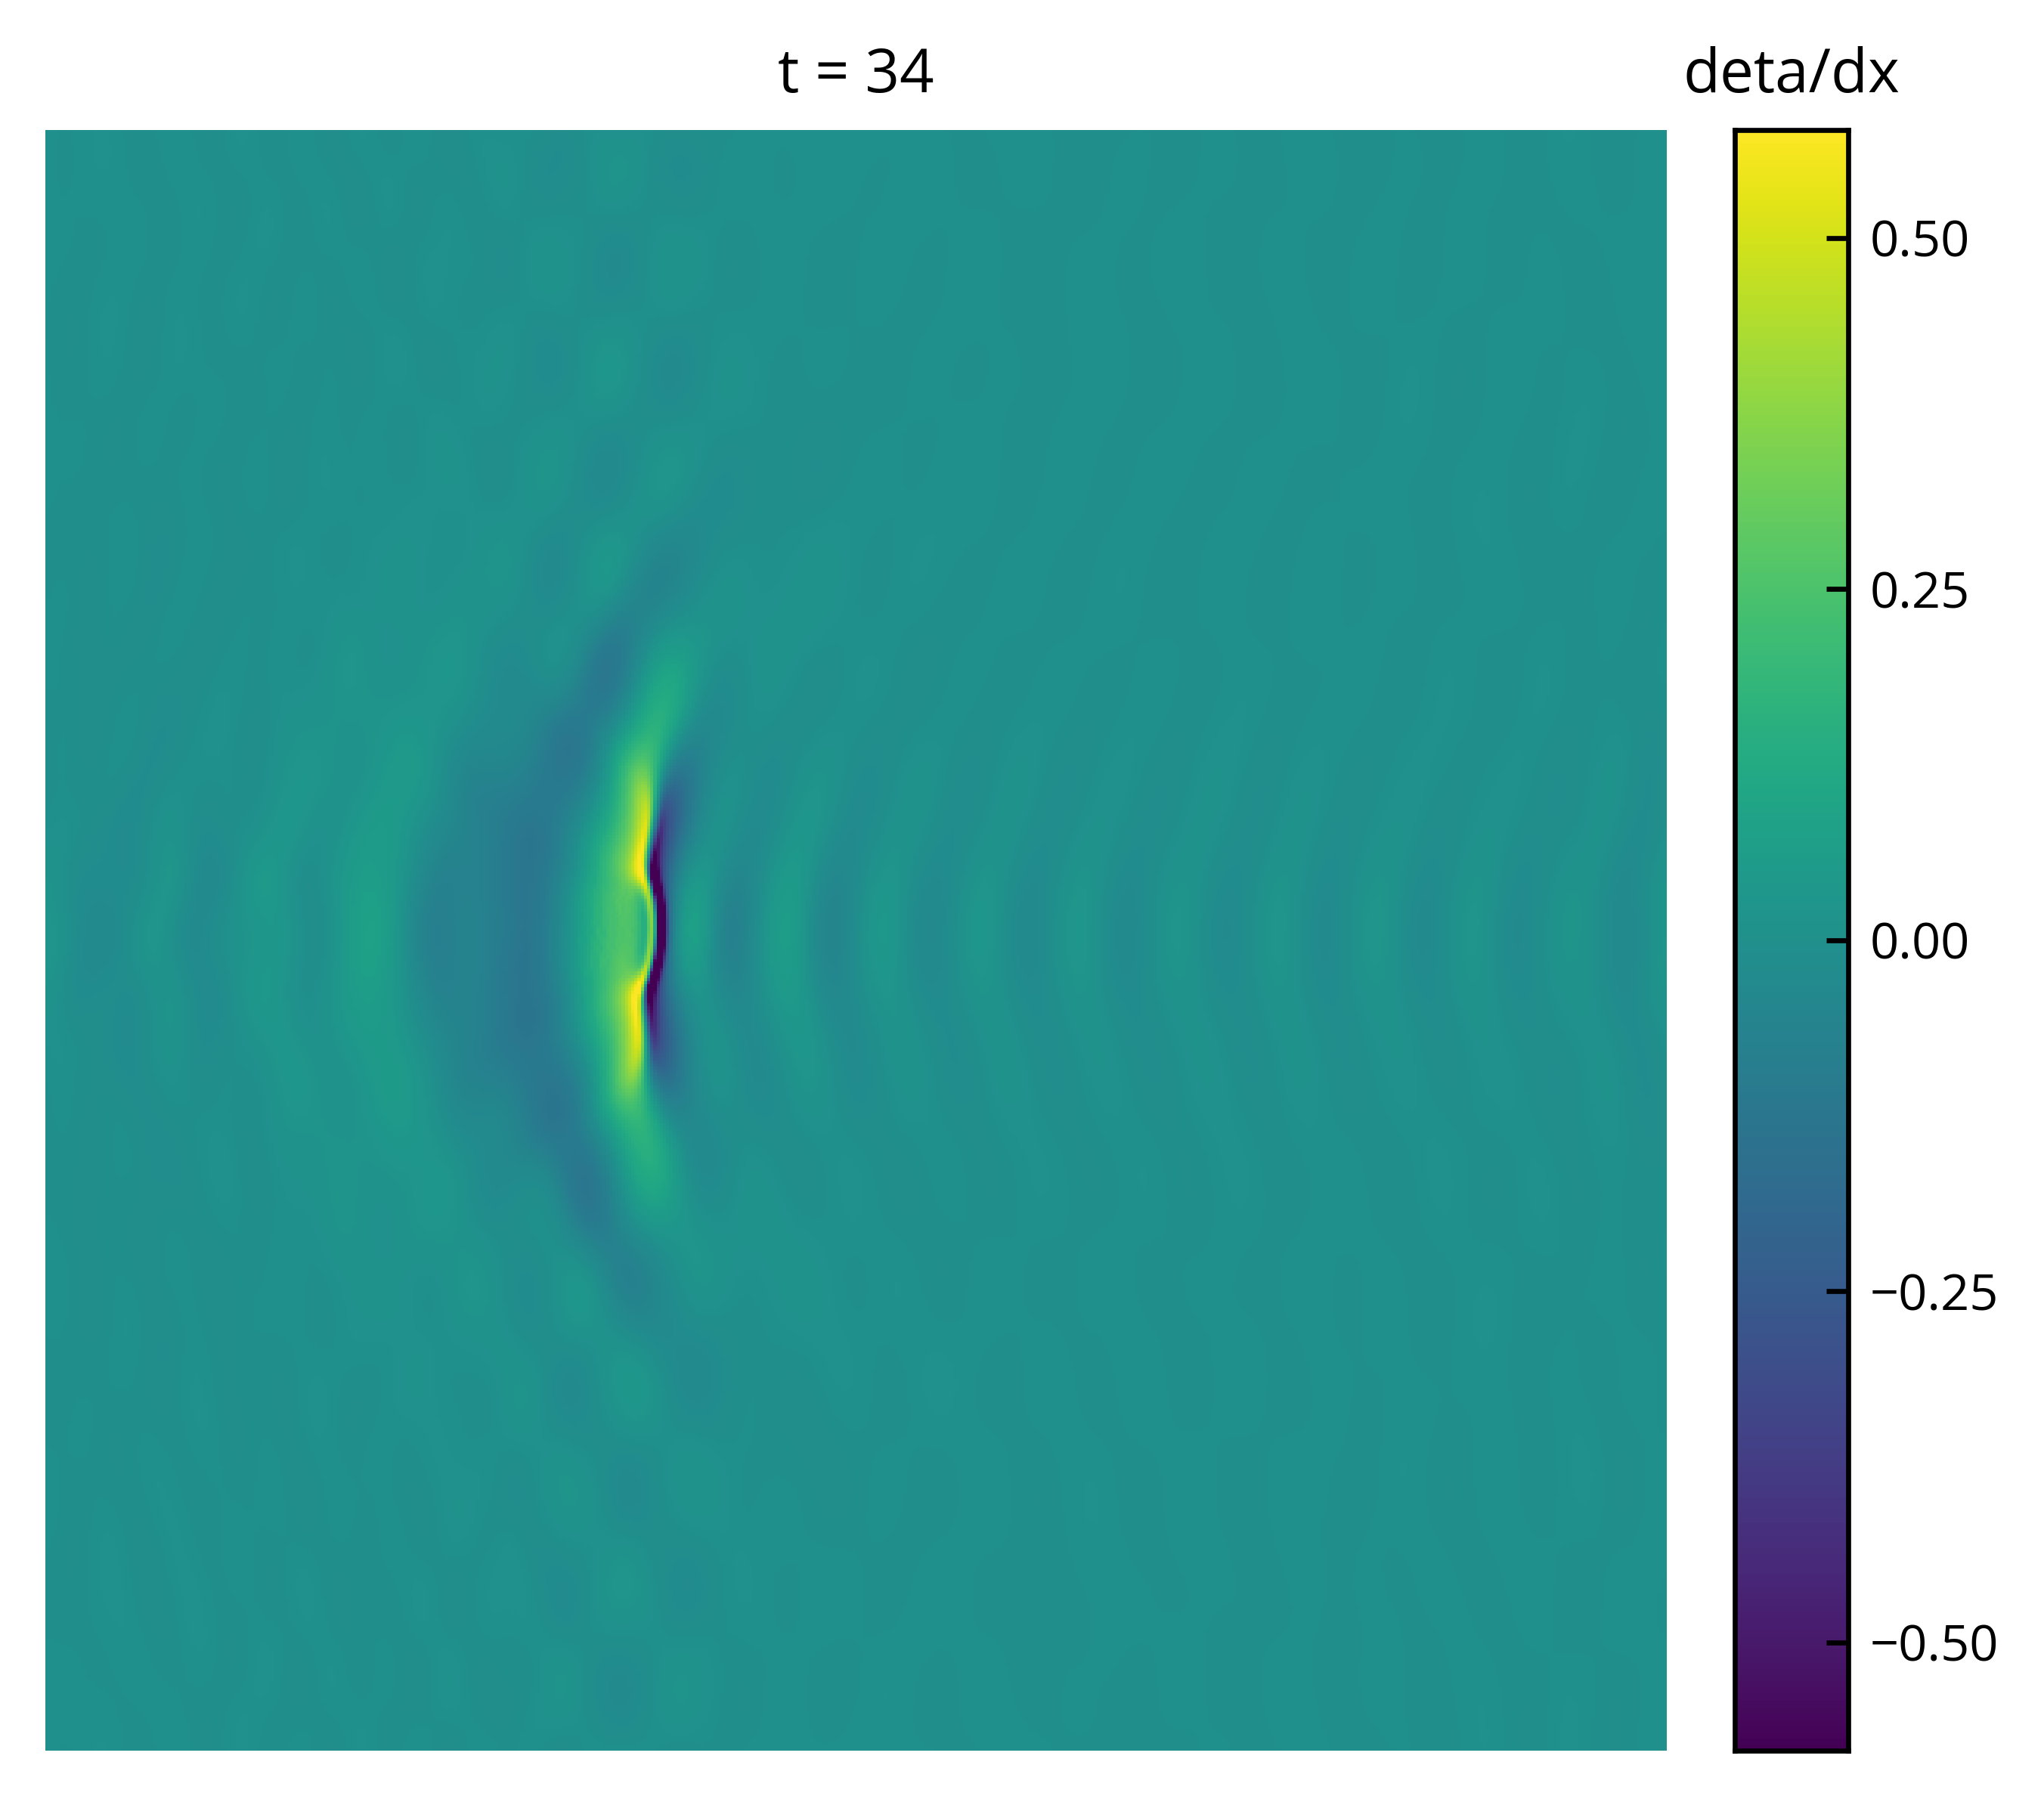

In [71]:
# Short crest focusing case. Slope.
N = 512; nl = 30; t = 34
pfile = '/home/jiarong/research/projects/multilayer/' + \
        'field_focusing_2D_P0001_RE40000_%g_%g_newpatch/' %(N,nl) \
        +'surface/eta_matrix_%g' %t
eta = np.fromfile(pfile, dtype=np.float32)
eta = eta.reshape(N+1,N+1)
kp = 2*np.pi/10
eta = eta[1:,1:]
L = 50
eta_gradx = np.gradient(eta, axis=0)/(L/N)
eta_gradx = np.rot90(eta_gradx)
figure, grid = contour_generator()
pcontour = grid[0].imshow(eta_gradx, extent=[-L/2,L/2,-L/2,L/2], vmax=0.577, vmin=-0.577, cmap='viridis')
grid[0].set_title('t = %g' %t)
grid[0].axis('off')
grid[0].cax.colorbar(pcontour)
grid[0].cax.set_title('deta/dx')
# grid[0].set_xlabel('x'); grid[0].set_ylabel('y')

Text(0.5, 1.0, '$d\\eta/dx$')

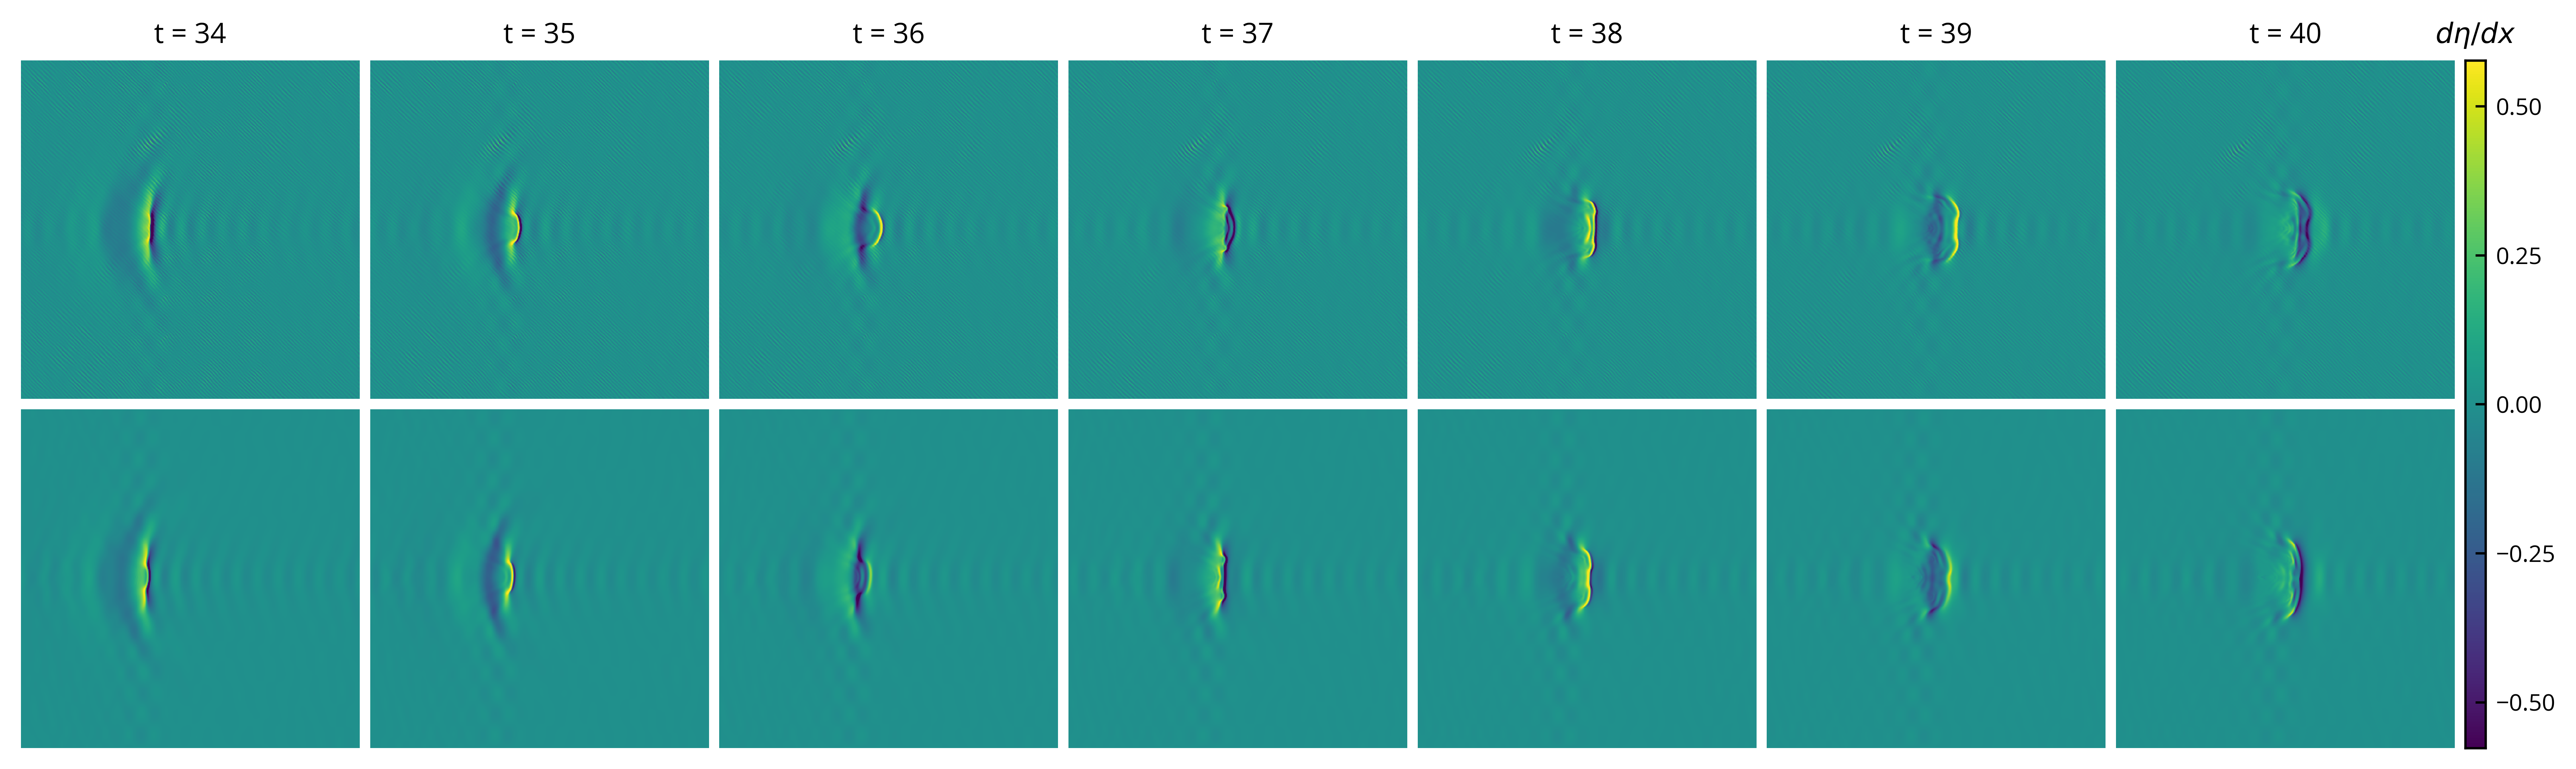

In [83]:
N = 512; nl = 30
fig = plt.figure(figsize=(12,6))
from mpl_toolkits.axes_grid1 import ImageGrid
grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(2,7),
                 axes_pad=0.05,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="3%",
                 cbar_pad=0.05,
                 )
""" Old version """
for i,t in enumerate(np.arange(34,41)):
    pfile = '/home/jiarong/research/projects/multilayer/' + \
            'field_focusing_2D_P0001_RE40000_%g_%g/' %(N,nl) \
            +'surface/eta_matrix_%g' %t
    eta = np.fromfile(pfile, dtype=np.float32)
    eta = eta.reshape(N+1,N+1)
    kp = 2*np.pi/10
    eta = eta[1:,1:]
    L = 50
    eta_gradx = np.gradient(eta, axis=0)/(L/N)
    eta_gradx = np.rot90(eta_gradx)
    pcontour = grid[i].imshow(eta_gradx, extent=[-L/2,L/2,-L/2,L/2], vmax=0.577, vmin=-0.577, cmap='viridis')
    grid[i].set_title('t = %g' %t)
    grid[i].axis('off')
    
""" New patch """
for i,t in enumerate(np.arange(34,41)):
    pfile = '/home/jiarong/research/projects/multilayer/' + \
            'field_focusing_2D_P0001_RE40000_%g_%g_newpatch/' %(N,nl) \
            +'surface/eta_matrix_%g' %t
    eta = np.fromfile(pfile, dtype=np.float32)
    eta = eta.reshape(N+1,N+1)
    kp = 2*np.pi/10
    eta = eta[1:,1:]
    L = 50
    eta_gradx = np.gradient(eta, axis=0)/(L/N)
    eta_gradx = np.rot90(eta_gradx)
    pcontour = grid[i+7].imshow(eta_gradx, extent=[-L/2,L/2,-L/2,L/2], vmax=0.577, vmin=-0.577, cmap='viridis')
    grid[i+7].axis('off')
grid[13].cax.colorbar(pcontour)
grid[13].cax.set_title(r'$d\eta/dx$')

No handles with labels found to put in legend.


Text(0, 0.5, '$E/E_0$')

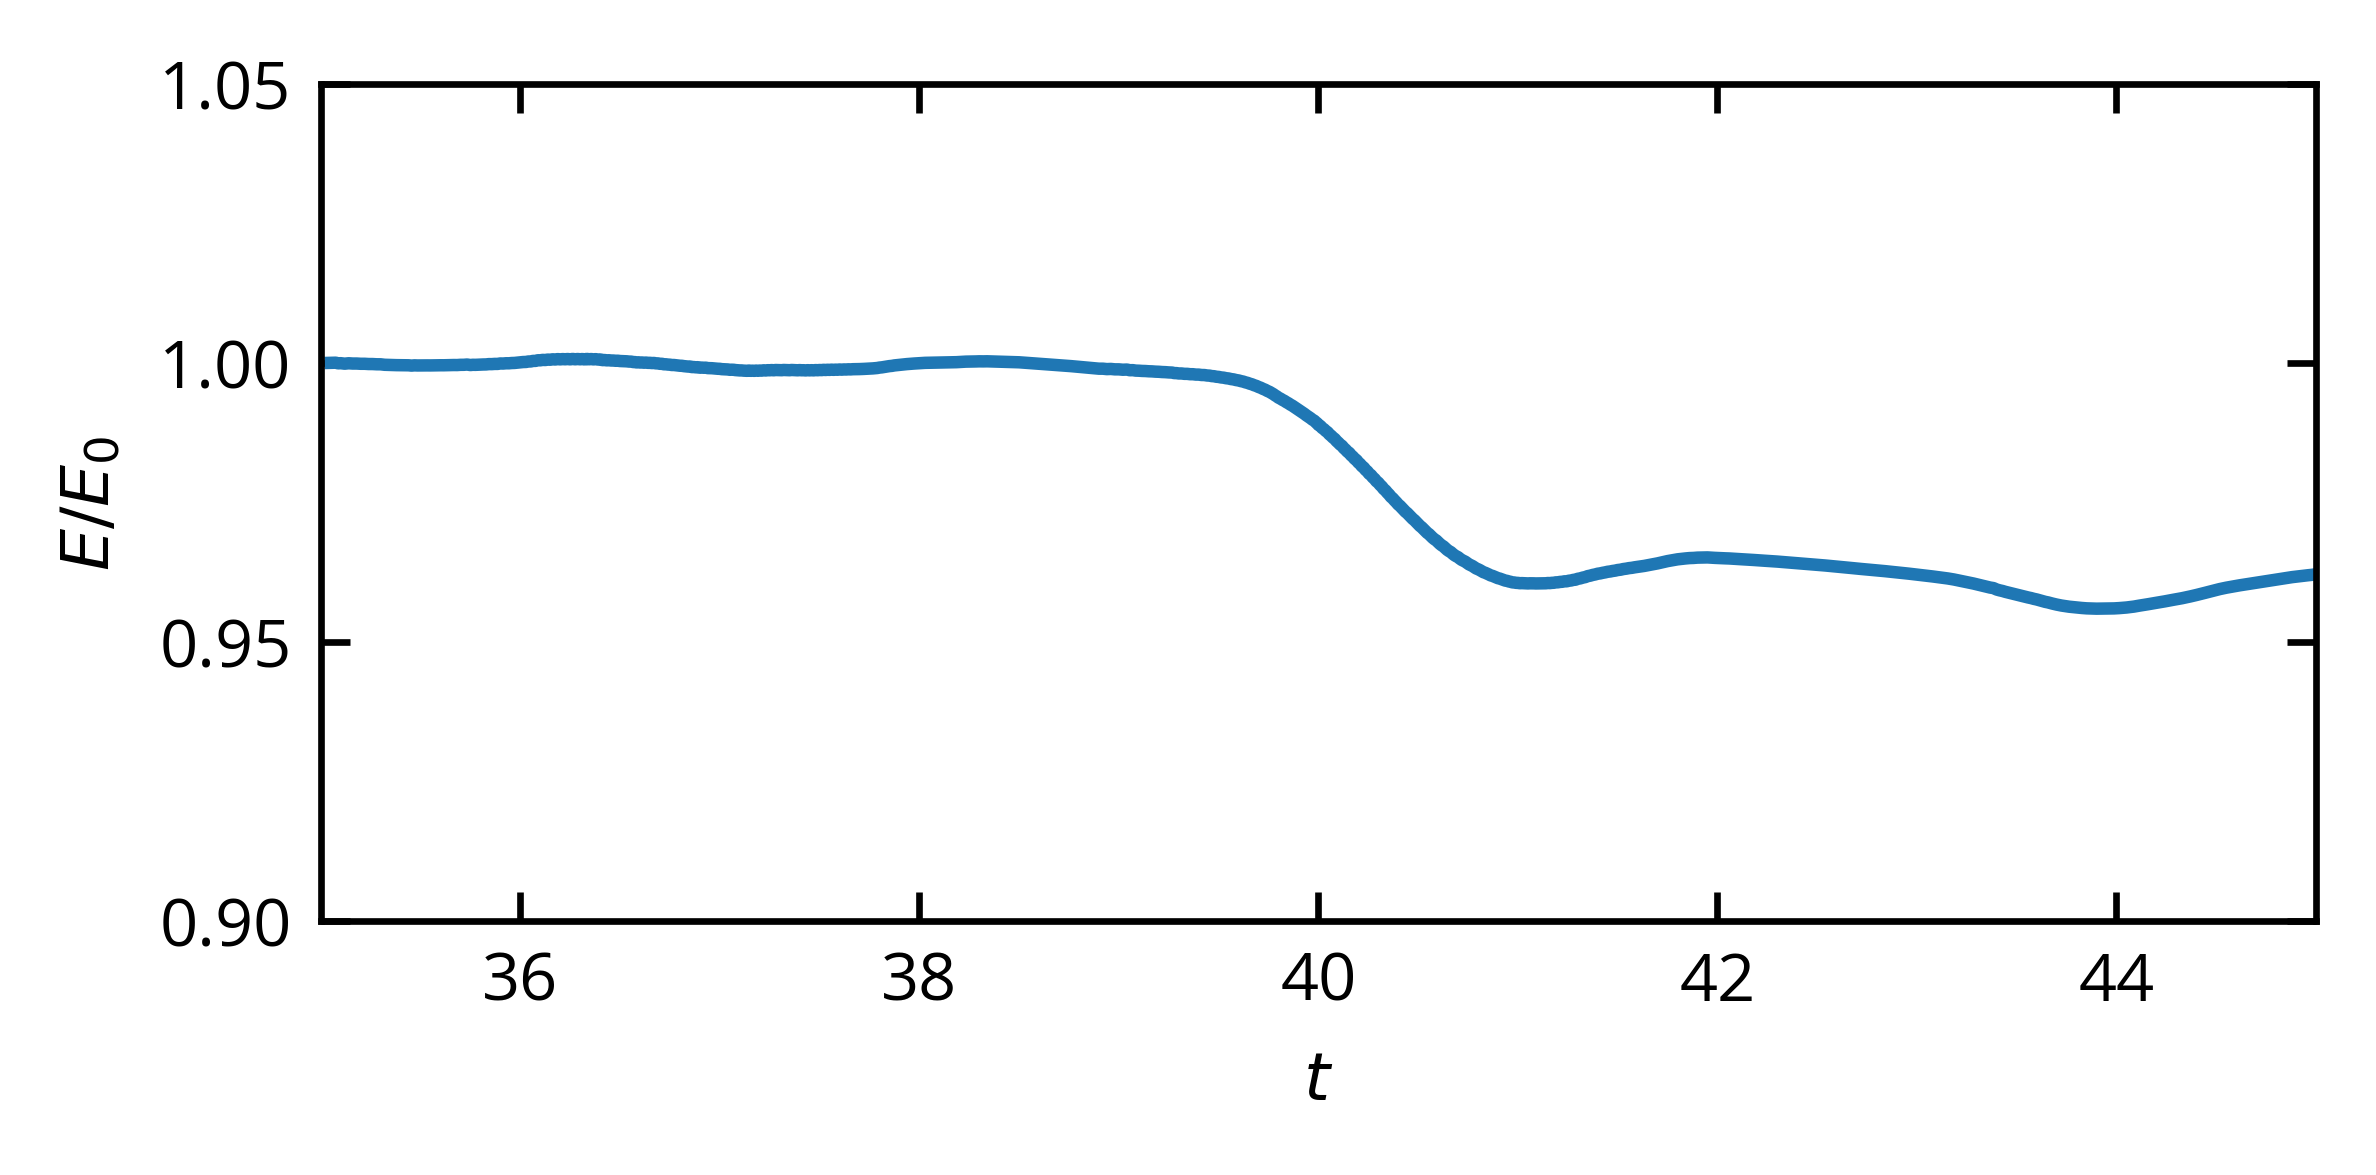

In [73]:
# Short crest focusing case. Time is not scaled anymore
fig = plt.figure(figsize=[4,2]); ax = fig.gca()
N = 512; nl = 30
path = '/home/jiarong/research/projects/multilayer/field_focusing_2D_P00005_RE40000_%g_%g_newpatch/' %(N,nl)
energy = read('energy_after_remap.dat')
t1 = 1000
t2 = 1800
ax.plot(energy.t[t1:t2], energy.total[t1:t2]/energy.total[t1], linestyle='-')
# ax.plot(energy.t[t1:t2], energy.ke[t1:t2]*2/(energy.total[t1]), label='2*ke', linestyle='-')
# ax.plot(energy.t[t1:t2], energy.gpe[t1:t2]*2/(energy.total[t1]), '--', label='2*gpe', linestyle='-')
# path = '/home/jiarong/research/projects/multilayer/field_focusing_2D_P0001_RE40000_%g_%g/' %(N,nl)
# energy = read('energy_after_remap.dat')
# ax.plot(energy.t, energy.total/energy.total[0], label='P=0.001 old', linestyle='-', color='C0', alpha = 0.5)
# path = '/home/jiarong/research/projects/multilayer/field_focusing_2D_P00005_RE40000_%g_%g_newpatch/' %(N,nl)
# energy = read('energy_after_remap.dat')
# ax.plot(energy.t, energy.total/energy.total[0], label='P=0.0005 new', linestyle='-', color='C1')

plt.ylim([0.9,1.05]); 
plt.xlim([35, 45])
plt.legend(loc = 'lower left')
plt.xlabel('$t$')
plt.ylabel(r'$E/E_0$')
# plt.title('%g*%g %g layers' %(N,N,nl))

In [29]:
kp = 2*np.pi/10; g = 9.8; cp = (g/kp)**0.5; T = 2*np.pi/(g*kp)**0.5
epsilon_l = (1)/1/10 # After divided by rho
b = epsilon_l*g/cp**5
print("b = %g" %b)
S = 0.26 # or 0.1 if std eta
b_ = 0.4*(S-0.08)**(5/2)
print("b_ = %g" %b_)
print("T = %g" %T)
print("cp = %g" %cp)

b = 0.00102002
b_ = 0.00549846
T = 2.53208
cp = 3.94933


In [17]:
quat = {0.521116,0.126971,0.264401,0.801503}
view (fov = 17.3106, quat = {0.475152,0.161235,0.235565,0.832313},tx = -0.0221727, ty = -0.0140227, width = 1200, height = 768);
view (fov = 20, quat = {-0.239316,0.369446,0.0990723,0.892425}, tx = 0, ty = 0, bg = {0.3,0.4,0.6}, width = 600, height = 600, samples = 1);
quat = {-0.475152, 0}

-0.5235987755982988